# Forex Daily Chart statistical research

This Notebook analyse forex data from EURUSD pair D1 timeframe for correlation market the data is from the duration of january 1st 2020 to december 31st 2020, the aim of this research is to find a pattern the placing trades in the Forex markert, in other to accurately predict where a market will move, from the previous candles.

So in this notebook am going to get different features from the previous candle and use those feature to test the features of next candle to see how each feature affects the movement of the next candle, with respect to pips. 

### Table of Content

1. [Analysis of The previous candle data againts the current candle data](#analysis)
2. [Test For High Wink](#hw) 
    1. [Test when tp is 50pips and sl is 50 pips](#hw_50) 
    2. [Test when tp is 75pips and sl is 75 pips](#hw_75)
    3. [Test when tp is 100pips and sl is 100 pips](#hw_100)
3. [Test For Low Wink](#lw) 
    1. [Test when tp is 50pips and sl is 50 pips](#lw_50) 
    2. [Test when tp is 75pips and sl is 75 pips](#lw_75)
    3. [Test when tp is 100pips and sl is 100 pips](#lw_100)
2. [Test For Absolute Candle Body](#abs) 
    1. [Test when tp is 50pips and sl is 50 pips](#abs_50) 
    2. [Test when tp is 75pips and sl is 75 pips](#abs_75)
    3. [Test when tp is 100pips and sl is 100 pips](#abs_100)
3. [Test For High Low](#hl) 
    1. [Test when tp is 50pips and sl is 50 pips](#hl_50) 
    2. [Test when tp is 75pips and sl is 75 pips](#hl_75)
    3. [Test when tp is 100pips and sl is 100 pips](#hl_100)


<a id="section_ID"></a>

In [1]:
# import the relevant packages
import plotly.graph_objects as go
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
# read data
data = pd.read_csv('DataSet/EURUSD_Daily_202001020000_202012310000.csv', '\t')
data

<DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
0    2020.01.02  1.12132  1.12143  1.11635  1.11722      30404      0   
1    2020.01.03  1.11722  1.11797  1.11250  1.11558      39449      0   
2    2020.01.06  1.11646  1.12054  1.11571  1.11968      32448      0   
3    2020.01.07  1.11960  1.11975  1.11335  1.11526      35909      0   
4    2020.01.08  1.11529  1.11681  1.11016  1.11053      50619      0   
..          ...      ...      ...      ...      ...        ...    ...   
255  2020.12.24  1.21857  1.22157  1.21774  1.21808      47758      0   
256  2020.12.28  1.21696  1.22506  1.21696  1.22160      65208      0   
257  2020.12.29  1.22160  1.22749  1.22070  1.22482      56037      0   
258  2020.12.30  1.22471  1.23099  1.22470  1.22961      66896      0   
259  2020.12.31  1.22963  1.23093  1.22127  1.22155      58559      0   

     <SPREAD>  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
255         0  
256         0  
257         0  
258         0  
259         0  

[260 rows x 8 columns]

In [3]:
#drop the <VOL>, column as it is not needed in this research
data.drop("<VOL>", inplace=True, axis=1)
data

<DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <SPREAD>
0    2020.01.02  1.12132  1.12143  1.11635  1.11722      30404         1
1    2020.01.03  1.11722  1.11797  1.11250  1.11558      39449         1
2    2020.01.06  1.11646  1.12054  1.11571  1.11968      32448         1
3    2020.01.07  1.11960  1.11975  1.11335  1.11526      35909         1
4    2020.01.08  1.11529  1.11681  1.11016  1.11053      50619         1
..          ...      ...      ...      ...      ...        ...       ...
255  2020.12.24  1.21857  1.22157  1.21774  1.21808      47758         0
256  2020.12.28  1.21696  1.22506  1.21696  1.22160      65208         0
257  2020.12.29  1.22160  1.22749  1.22070  1.22482      56037         0
258  2020.12.30  1.22471  1.23099  1.22470  1.22961      66896         0
259  2020.12.31  1.22963  1.23093  1.22127  1.22155      58559         0

[260 rows x 7 columns]

[section title](#section_ID)

In [4]:
df = data

fig = go.Figure(data=go.Candlestick(x=df['<DATE>'], 
                             open=df['<OPEN>'], 
                             high=df['<HIGH>'], 
                             low=df['<LOW>'], 
                             close=df['<CLOSE>']))
fig.show()

The overal market appears to be bullish so we will have more bullish than bearish signals

#### Ploting the last 20 candles

In [5]:
df = data[-20:]

fig = go.Figure(data=go.Candlestick(x=df['<DATE>'], 
                             open=df['<OPEN>'], 
                             high=df['<HIGH>'], 
                             low=df['<LOW>'], 
                             close=df['<CLOSE>']))
fig.show()

### Functions used in this Analysis To extract and test data

In [6]:
def get_body(data):
    
    '''
    Functions to get the difference between the close and open of a candle
    '''
    
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(close)):
        result.append((close[i] - open_[i]) * 10000)
        
    return result

In [7]:
def get_abs_body(data):
    
    '''
    Functions to get the absolute value of the difference 
    between the close and open of a candle
    '''
    
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(close)):
        result.append(abs(close[i] - open_[i]) * 10000)
        
    return result

In [8]:
def get_high_low(data):
    
    '''
    Functions to get the difference between the high and low of a candle
    '''
    
    high = data["<HIGH>"].to_numpy()
    low = data["<LOW>"].to_numpy()
    
    result = []
    
    for i in range(0, len(high)):
        result.append((high[i] - low[i]) * 10000)
        
    return result

In [9]:
def get_high_wink(data):
    
    '''
    Functions to get the difference between the highest and 
    the next high point of a candle
    '''
    
    high = data["<HIGH>"].to_numpy()
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(high)):
        result.append((high[i] - (close[i] if close[i] >= open_[i] else open_[i])) * 10000)
        
    return result

In [10]:
def get_low_wink(data):
    
    '''
    Functions to get the difference between the lowest and 
    the next low point of a candle
    '''
    
    low = data["<LOW>"].to_numpy()
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(low)):
        result.append(((close[i] if close[i] <= open_[i] else open_[i]) - low[i]) * 10000)
        
    return result

In [11]:
def get_up_movement(data):
    
    '''
    Functions to get the difference between the high and 
    open of a candle
    '''
    
    high = data["<HIGH>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(high)):
        result.append((high[i] - open_[i]) * 10000)
        
    return result

In [12]:
def get_down_movement(data):
    
    '''
    Functions to get the difference between the open and 
    low of a candle
    '''
    
    open_ = data["<OPEN>"].to_numpy()
    low = data["<LOW>"].to_numpy()
    
    result = []
    
    for i in range(0, len(low)):
        result.append((open_[i] - low[i]) * 10000)
        
    return result

In [13]:
def get_real_movement(data):
    
    '''
    Functions to get the difference between the close and 
    open of a candle
    '''
    close = data["<CLOSE>"].to_numpy()
    open_ = data["<OPEN>"].to_numpy()
    
    result = []
    
    for i in range(0, len(close)):
        result.append((close[i] - open_[i]) * 10000)
        
    return result

In [14]:
def test_data(data, previous_candle, pips, pips_tp, pips_sl):
    
    # for trades that went both ways
    undecided = data[data[previous_candle] > pips]
    undecided = undecided[undecided['Up Move*'] > pips_tp]
    undecided = undecided[undecided['Down Move*'] > pips_sl]
    
    # for trades that went hit tp only
    tp = data[data[previous_candle] > pips]
    tp = tp[tp['Up Move*'] > pips_tp]
    tp = tp[tp['Down Move*'] < pips_sl]
    
    # for trades that went hit sl only
    sl = data[data[previous_candle] > pips]
    sl = sl[sl['Up Move*'] < pips_tp]
    sl = sl[sl['Down Move*'] > pips_sl]
    
    # for trades didn't hit tp or sl but is bullish
    bull = data[data[previous_candle] > pips]
    bull = bull[bull['Up Move*'] < pips_tp]
    bull = bull[bull['Down Move*'] < pips_sl]
    bull = bull[bull['Real Move*'] > 0]
    bull_pips = bull['Real Move*'].sum()
    
    # for trades didn't hit tp or sl but is bearish
    bear = data[data[previous_candle] > pips]
    bear = bear[bear['Up Move*'] < pips_tp]
    bear = bear[bear['Down Move*'] < pips_sl]
    bear = bear[bear['Real Move*'] < 0]
    bear_pips = bear['Real Move*'].sum()    
    
    
    return np.array([len(undecided), len(tp), len(sl), len(bull), len(bear), abs(bull_pips), abs(bear_pips)])

In [15]:
def analyze(tp_pips, sl_pips, dataset, feature):
    
    # Get test result
    test_result = np.array([test_data(dataset, feature, i, tp_pips, sl_pips) for i in pips]).transpose()

    signals = test_result[0] + test_result[1] + test_result[2] + test_result[3] + test_result[4]
    
    test_dataset = {
        "Pips": pips,
        "Signals": signals,
        "Undecided": test_result[0],
        "Hit Tp": test_result[1],
        "Hit Sl": test_result[2],
        "Bullish": test_result[3],
        "Bearish": test_result[4],
        "Bullish Pips": test_result[5],
        "Bearish Pips": test_result[6]
    }

    test_dataframe  = pd.DataFrame(test_dataset)
    
    test_dataframe['Tp - Sl'] = test_dataframe['Hit Tp'] - test_dataframe['Hit Sl']
    test_dataframe['Bull - Bear'] = test_dataframe['Bullish'] - test_dataframe['Bearish']
    test_dataframe['Bull - Bear Pips'] = test_dataframe['Bullish Pips'] - test_dataframe['Bearish Pips']
    test_dataframe['Bull Pips'] = test_dataframe['Hit Tp'] * tp_pips + test_dataframe['Bullish Pips']
    test_dataframe['Bear Pips'] = test_dataframe['Hit Sl'] * sl_pips + test_dataframe['Bearish Pips']
    test_dataframe['Undecided Pips'] = (test_dataframe['Undecided'] * tp_pips + test_dataframe['Undecided'] * sl_pips) / 2
    test_dataframe['Bull Pips %'] = test_dataframe['Bull Pips'] * 100 /  (test_dataframe['Bull Pips'] + test_dataframe['Bear Pips'] + test_dataframe['Undecided Pips']) 
    test_dataframe['Bear Pips %'] = test_dataframe['Bear Pips'] * 100 /  (test_dataframe['Bull Pips'] + test_dataframe['Bear Pips'] + test_dataframe['Undecided Pips'])
    test_dataframe['Undecided Pips %'] = test_dataframe['Undecided Pips'] * 100 /  (test_dataframe['Bull Pips'] + test_dataframe['Bear Pips'] + test_dataframe['Undecided Pips'])
    test_dataframe['Buy Gains'] = test_dataframe['Bull Pips'] - test_dataframe['Bear Pips'] - test_dataframe['Undecided Pips']
    test_dataframe['Sell Gains'] = test_dataframe['Bear Pips'] - test_dataframe['Bull Pips'] - test_dataframe['Undecided Pips']


    return test_dataframe

In [16]:
# Get the required data
body = get_body(data)
abs_body = get_abs_body(data)
high = get_high_wink(data)
low = get_low_wink(data)
high_low = get_high_low(data)
up_move = get_up_movement(data)
down_move = get_down_movement(data)
real_move = get_real_movement(data)

In [17]:
# add some columns to the dataframe for easy identification
data['Up Move'] = up_move
data['Down Move'] = down_move
data

<DATE>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <SPREAD>  \
0    2020.01.02  1.12132  1.12143  1.11635  1.11722      30404         1   
1    2020.01.03  1.11722  1.11797  1.11250  1.11558      39449         1   
2    2020.01.06  1.11646  1.12054  1.11571  1.11968      32448         1   
3    2020.01.07  1.11960  1.11975  1.11335  1.11526      35909         1   
4    2020.01.08  1.11529  1.11681  1.11016  1.11053      50619         1   
..          ...      ...      ...      ...      ...        ...       ...   
255  2020.12.24  1.21857  1.22157  1.21774  1.21808      47758         0   
256  2020.12.28  1.21696  1.22506  1.21696  1.22160      65208         0   
257  2020.12.29  1.22160  1.22749  1.22070  1.22482      56037         0   
258  2020.12.30  1.22471  1.23099  1.22470  1.22961      66896         0   
259  2020.12.31  1.22963  1.23093  1.22127  1.22155      58559         0   

     Up Move  Down Move  
0        1.1       49.7  
1        7.5       47.2  
2       40.8        7.5  
3        1.5       62.5  
4       15.2       51.3  
..       ...        ...  
255     30.0        8.3  
256     81.0        0.0  
257     58.9        9.0  
258     62.8        0.1  
259     13.0       83.6  

[260 rows x 9 columns]

In [18]:
# Create a dataframe the data
dic = {
        'High Wink': high, 
        'Candle Body': body, 
        'Low Wink': low, 
        'High Low': high_low,
        'Abs Candle Body': abs_body,
        'Tick Vol': data["<TICKVOL>"],
        'Spread': data["<SPREAD>"],
        'Real Move': real_move,
        'Up Move': up_move,
        'Down Move': down_move
        
    } 
df = pd.DataFrame(dic)
df

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Tick Vol  \
0          1.1        -41.0       8.7      50.8             41.0     30404   
1          7.5        -16.4      30.8      54.7             16.4     39449   
2          8.6         32.2       7.5      48.3             32.2     32448   
3          1.5        -43.4      19.1      64.0             43.4     35909   
4         15.2        -47.6       3.7      66.5             47.6     50619   
..         ...          ...       ...       ...              ...       ...   
255       30.0         -4.9       3.4      38.3              4.9     47758   
256       34.6         46.4       0.0      81.0             46.4     65208   
257       26.7         32.2       9.0      67.9             32.2     56037   
258       13.8         49.0       0.1      62.9             49.0     66896   
259       13.0        -80.8       2.8      96.6             80.8     58559   

     Spread  Real Move  Up Move  Down Move  
0         1      -41.0      1.1       49.7  
1         1      -16.4      7.5       47.2  
2         1       32.2     40.8        7.5  
3         1      -43.4      1.5       62.5  
4         1      -47.6     15.2       51.3  
..      ...        ...      ...        ...  
255       0       -4.9     30.0        8.3  
256       0       46.4     81.0        0.0  
257       0       32.2     58.9        9.0  
258       0       49.0     62.8        0.1  
259       0      -80.8     13.0       83.6  

[260 rows x 10 columns]

###### Create dataframe of the next candle

In [19]:
next_candle = df.iloc[1:,]
next_candle

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Tick Vol  \
1          7.5        -16.4      30.8      54.7             16.4     39449   
2          8.6         32.2       7.5      48.3             32.2     32448   
3          1.5        -43.4      19.1      64.0             43.4     35909   
4         15.2        -47.6       3.7      66.5             47.6     50619   
5         15.0         -0.2      12.8      28.0              0.2     32024   
..         ...          ...       ...       ...              ...       ...   
255       30.0         -4.9       3.4      38.3              4.9     47758   
256       34.6         46.4       0.0      81.0             46.4     65208   
257       26.7         32.2       9.0      67.9             32.2     56037   
258       13.8         49.0       0.1      62.9             49.0     66896   
259       13.0        -80.8       2.8      96.6             80.8     58559   

     Spread  Real Move  Up Move  Down Move  
1         1      -16.4      7.5       47.2  
2         1       32.2     40.8        7.5  
3         1      -43.4      1.5       62.5  
4         1      -47.6     15.2       51.3  
5         1       -0.2     15.0       13.0  
..      ...        ...      ...        ...  
255       0       -4.9     30.0        8.3  
256       0       46.4     81.0        0.0  
257       0       32.2     58.9        9.0  
258       0       49.0     62.8        0.1  
259       0      -80.8     13.0       83.6  

[259 rows x 10 columns]

In [20]:
next_candle.columns = ["High Wink*", "Candle Body*", "Low Wink*", "High Low*", "Abs Candle Body*", "Tick Vol*", "Spread*", "Real Move*", "Up Move*", "Down Move*"]

In [21]:
next_candle.reset_index(inplace=True)
next_candle.drop(["index"], axis = 1, inplace=True)

C:\Users\Joshua\anaconda3\envs\tf_env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
next_candle

High Wink*  Candle Body*  Low Wink*  High Low*  Abs Candle Body*  \
0           7.5         -16.4       30.8       54.7              16.4   
1           8.6          32.2        7.5       48.3              32.2   
2           1.5         -43.4       19.1       64.0              43.4   
3          15.2         -47.6        3.7       66.5              47.6   
4          15.0          -0.2       12.8       28.0               0.2   
..          ...           ...        ...        ...               ...   
254        30.0          -4.9        3.4       38.3               4.9   
255        34.6          46.4        0.0       81.0              46.4   
256        26.7          32.2        9.0       67.9              32.2   
257        13.8          49.0        0.1       62.9              49.0   
258        13.0         -80.8        2.8       96.6              80.8   

     Tick Vol*  Spread*  Real Move*  Up Move*  Down Move*  
0        39449        1       -16.4       7.5        47.2  
1        32448        1        32.2      40.8         7.5  
2        35909        1       -43.4       1.5        62.5  
3        50619        1       -47.6      15.2        51.3  
4        32024        1        -0.2      15.0        13.0  
..         ...      ...         ...       ...         ...  
254      47758        0        -4.9      30.0         8.3  
255      65208        0        46.4      81.0         0.0  
256      56037        0        32.2      58.9         9.0  
257      66896        0        49.0      62.8         0.1  
258      58559        0       -80.8      13.0        83.6  

[259 rows x 10 columns]

In [23]:
# concat df and next_day to create a new dataframe 
dataset = pd.concat([df, next_candle], axis = 1)
dataset.dropna(inplace=True)
dataset

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Tick Vol  \
0          1.1        -41.0       8.7      50.8             41.0     30404   
1          7.5        -16.4      30.8      54.7             16.4     39449   
2          8.6         32.2       7.5      48.3             32.2     32448   
3          1.5        -43.4      19.1      64.0             43.4     35909   
4         15.2        -47.6       3.7      66.5             47.6     50619   
..         ...          ...       ...       ...              ...       ...   
254       35.2         24.2       7.8      67.2             24.2     79543   
255       30.0         -4.9       3.4      38.3              4.9     47758   
256       34.6         46.4       0.0      81.0             46.4     65208   
257       26.7         32.2       9.0      67.9             32.2     56037   
258       13.8         49.0       0.1      62.9             49.0     66896   

     Spread  Real Move  Up Move  Down Move  High Wink*  Candle Body*  \
0         1      -41.0      1.1       49.7         7.5         -16.4   
1         1      -16.4      7.5       47.2         8.6          32.2   
2         1       32.2     40.8        7.5         1.5         -43.4   
3         1      -43.4      1.5       62.5        15.2         -47.6   
4         1      -47.6     15.2       51.3        15.0          -0.2   
..      ...        ...      ...        ...         ...           ...   
254       0       24.2     59.4        7.8        30.0          -4.9   
255       0       -4.9     30.0        8.3        34.6          46.4   
256       0       46.4     81.0        0.0        26.7          32.2   
257       0       32.2     58.9        9.0        13.8          49.0   
258       0       49.0     62.8        0.1        13.0         -80.8   

     Low Wink*  High Low*  Abs Candle Body*  Tick Vol*  Spread*  Real Move*  \
0         30.8       54.7              16.4    39449.0      1.0       -16.4   
1          7.5       48.3              32.2    32448.0      1.0        32.2   
2         19.1       64.0              43.4    35909.0      1.0       -43.4   
3          3.7       66.5              47.6    50619.0      1.0       -47.6   
4         12.8       28.0               0.2    32024.0      1.0        -0.2   
..         ...        ...               ...        ...      ...         ...   
254        3.4       38.3               4.9    47758.0      0.0        -4.9   
255        0.0       81.0              46.4    65208.0      0.0        46.4   
256        9.0       67.9              32.2    56037.0      0.0        32.2   
257        0.1       62.9              49.0    66896.0      0.0        49.0   
258        2.8       96.6              80.8    58559.0      0.0       -80.8   

     Up Move*  Down Move*  
0         7.5        47.2  
1        40.8         7.5  
2         1.5        62.5  
3        15.2        51.3  
4        15.0        13.0  
..        ...         ...  
254      30.0         8.3  
255      81.0         0.0  
256      58.9         9.0  
257      62.8         0.1  
258      13.0        83.6  

[259 rows x 20 columns]

In [24]:
# Remove the rest data from the dataset of the candle, leaving just Up Real Move*, Move* and Down Move*
reduced_dataset = dataset.drop(["High Wink*", "Candle Body*", "Low Wink*", "High Low*", "Abs Candle Body*", "Tick Vol*", "Spread*"], axis=1)
reduced_dataset

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Tick Vol  \
0          1.1        -41.0       8.7      50.8             41.0     30404   
1          7.5        -16.4      30.8      54.7             16.4     39449   
2          8.6         32.2       7.5      48.3             32.2     32448   
3          1.5        -43.4      19.1      64.0             43.4     35909   
4         15.2        -47.6       3.7      66.5             47.6     50619   
..         ...          ...       ...       ...              ...       ...   
254       35.2         24.2       7.8      67.2             24.2     79543   
255       30.0         -4.9       3.4      38.3              4.9     47758   
256       34.6         46.4       0.0      81.0             46.4     65208   
257       26.7         32.2       9.0      67.9             32.2     56037   
258       13.8         49.0       0.1      62.9             49.0     66896   

     Spread  Real Move  Up Move  Down Move  Real Move*  Up Move*  Down Move*  
0         1      -41.0      1.1       49.7       -16.4       7.5        47.2  
1         1      -16.4      7.5       47.2        32.2      40.8         7.5  
2         1       32.2     40.8        7.5       -43.4       1.5        62.5  
3         1      -43.4      1.5       62.5       -47.6      15.2        51.3  
4         1      -47.6     15.2       51.3        -0.2      15.0        13.0  
..      ...        ...      ...        ...         ...       ...         ...  
254       0       24.2     59.4        7.8        -4.9      30.0         8.3  
255       0       -4.9     30.0        8.3        46.4      81.0         0.0  
256       0       46.4     81.0        0.0        32.2      58.9         9.0  
257       0       32.2     58.9        9.0        49.0      62.8         0.1  
258       0       49.0     62.8        0.1       -80.8      13.0        83.6  

[259 rows x 13 columns]

In [25]:
reduced_dataset.describe()

High Wink  Candle Body    Low Wink    High Low  Abs Candle Body  \
count  259.000000   259.000000  259.000000  259.000000       259.000000   
mean    23.466023     4.481853   20.267181   84.709266        40.976062   
std     19.520973    52.562048   20.079774   42.358469        33.126851   
min      0.000000  -252.800000    0.000000   21.800000         0.000000   
25%      9.250000   -31.200000    6.900000   56.300000        16.300000   
50%     19.000000     2.200000   14.500000   75.800000        33.400000   
75%     31.050000    39.550000   26.700000  102.000000        56.350000   
max    137.400000   149.400000  113.100000  327.600000       252.800000   

            Tick Vol      Spread   Real Move     Up Move   Down Move  \
count     259.000000  259.000000  259.000000  259.000000  259.000000   
mean    64699.420849    0.432432    4.481853   46.194981   38.514286   
std     36777.774017    0.680764   52.562048   36.233287   38.251742   
min     18552.000000    0.000000 -252.800000    0.000000    0.000000   
25%     42503.000000    0.000000  -31.200000   18.100000   11.950000   
50%     54507.000000    0.000000    2.200000   38.200000   27.600000   
75%     75034.500000    1.000000   39.550000   63.750000   52.200000   
max    244937.000000    8.000000  149.400000  178.900000  257.600000   

       Real Move*    Up Move*  Down Move*  
count  259.000000  259.000000  259.000000  
mean     4.328185   46.240927   38.645174  
std     52.753363   36.183393   38.348043  
min   -252.800000    0.000000    0.000000  
25%    -31.200000   18.100000   11.950000  
50%      2.200000   38.200000   27.600000  
75%     39.550000   63.750000   52.500000  
max    149.400000  178.900000  257.600000

In [26]:
reduced_dataset[['Real Move*', 'Up Move*', 'Down Move*']].quantile(np.arange(0.9, 1, 0.01))

Real Move*  Up Move*  Down Move*
0.90      69.500    96.220      83.620
0.91      72.160    97.902      86.604
0.92      76.376   101.716      91.144
0.93      79.386   103.534      94.268
0.94      81.984   113.264     102.128
0.95      88.970   118.740     106.710
0.96      95.764   128.560     113.836
0.97     102.508   134.290     121.794
0.98     107.340   142.872     139.128
0.99     115.990   156.758     204.626

Over 6% of Up Move* and Down Move* is over a 100 pips

<AxesSubplot:>

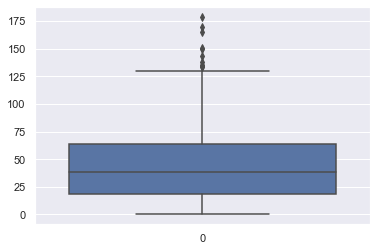

In [27]:
sns.boxplot(data=reduced_dataset['Up Move*'])

From the boxplot above the Up Move* median is 37.5 pips, the lower quartile is about 20 pips and the upper quartile is about 67.5 pips

<AxesSubplot:>

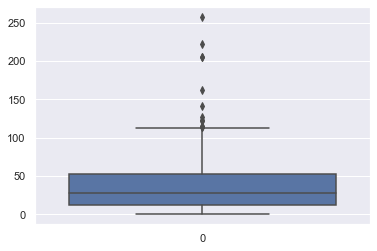

In [28]:
sns.boxplot(data=reduced_dataset['Down Move*'])

From the boxplot above the Up Move* median is 18 pips, the lower quartile is about 25 pips and the upper quartile is about 52 pips

In [29]:
reduced_dataset.quantile([0.25, 0.5, 0.75, 0.9])

High Wink  Candle Body  Low Wink  High Low  Abs Candle Body  Tick Vol  \
0.25       9.25       -31.20      6.90     56.30            16.30   42503.0   
0.50      19.00         2.20     14.50     75.80            33.40   54507.0   
0.75      31.05        39.55     26.70    102.00            56.35   75034.5   
0.90      46.92        69.50     43.14    136.88            79.56  101455.2   

      Spread  Real Move  Up Move  Down Move  Real Move*  Up Move*  Down Move*  
0.25     0.0     -31.20    18.10      11.95      -31.20     18.10       11.95  
0.50     0.0       2.20    38.20      27.60        2.20     38.20       27.60  
0.75     1.0      39.55    63.75      52.20       39.55     63.75       52.50  
0.90     1.0      69.50    96.22      82.58       69.50     96.22       83.62

### Plot an heatmap of the correlation

<AxesSubplot:>

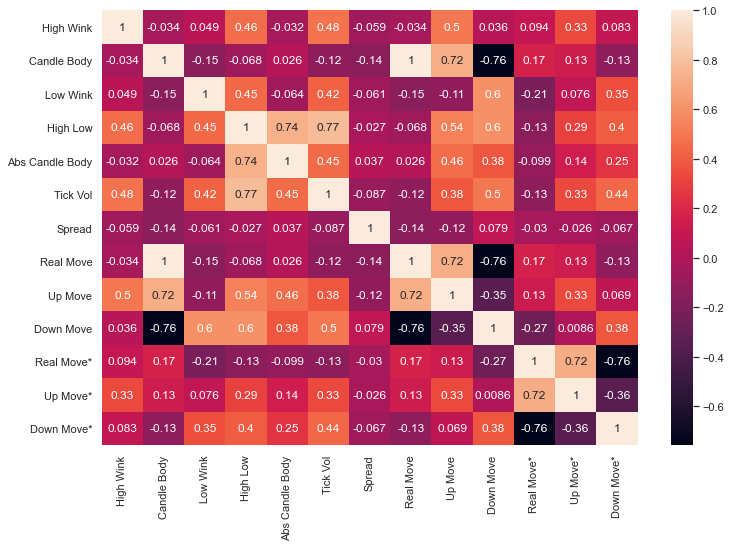

In [30]:
plt.figure(figsize=(12,8))
rd_corr = reduced_dataset.corr()
sns.heatmap(rd_corr, annot=True)

# Analysis of The previous candle data againts the current candle data <a id="analysis"></a>

In [31]:
# defining test range
pips = np.arange(0, 151)

## Test For High Wink  <a id="hw"></a>

### Test when tp is 50pips and sl is 50 pips <a id="hw_50"></a>

In [32]:
test_dataframe_hw_50_50 = analyze(50, 50, reduced_dataset, 'High Wink')
test_dataframe_hw_50_50

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    256.0       10.0    87.0    64.0     44.0     51.0         825.8   
1       1    253.0       10.0    87.0    62.0     44.0     50.0         825.8   
2       2    246.0        9.0    87.0    61.0     42.0     47.0         811.5   
3       3    241.0        9.0    86.0    60.0     41.0     45.0         798.2   
4       4    235.0        9.0    84.0    58.0     41.0     43.0         798.2   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
147   147      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
148   148      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
149   149      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
150   150      0.0        0.0     0.0     0.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          1009.5     23.0         -7.0            -183.7     5175.8   
1           987.8     25.0         -6.0            -162.0     5175.8   
2           950.5     26.0         -5.0            -139.0     5161.5   
3           878.9     26.0         -4.0             -80.7     5098.2   
4           832.5     26.0         -2.0             -34.3     4998.2   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0        0.0   
147           0.0      0.0          0.0               0.0        0.0   
148           0.0      0.0          0.0               0.0        0.0   
149           0.0      0.0          0.0               0.0        0.0   
150           0.0      0.0          0.0               0.0        0.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4209.5           500.0    52.358553    42.583432          5.058015   
1       4087.8           500.0    53.011184    41.867754          5.121062   
2       4000.5           450.0    53.698502    41.619850          4.681648   
3       3878.9           450.0    54.080258    41.146270          4.773472   
4       3732.5           450.0    54.442472    40.655941          4.901587   
..         ...             ...          ...          ...               ...   
146        0.0             0.0          NaN          NaN               NaN   
147        0.0             0.0          NaN          NaN               NaN   
148        0.0             0.0          NaN          NaN               NaN   
149        0.0             0.0          NaN          NaN               NaN   
150        0.0             0.0          NaN          NaN               NaN   

     Buy Gains  Sell Gains  
0        466.3     -1466.3  
1        588.0     -1588.0  
2        711.0     -1611.0  
3        769.3     -1669.3  
4        815.7     -1715.7  
..         ...         ...  
146        0.0         0.0  
147        0.0         0.0  
148        0.0         0.0  
149        0.0         0.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [33]:
test_dataframe_hw_50_50.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   40.768212    2.867550   16.940397    9.814570    5.158940   
std     43.734045   67.599156    2.632301   25.651831   16.818801   10.771625   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     37.500000    1.000000    1.000000    0.000000    0.000000    0.000000   
50%     75.000000    5.000000    2.000000    3.000000    0.000000    0.000000   
75%    112.500000   39.500000    4.000000   18.000000   10.500000    3.500000   
max    150.000000  256.000000   10.000000   87.000000   64.000000   44.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean     5.986755     96.617881    117.021854    7.125828    -0.827815   
std     12.365536    206.651624    246.305384    9.275994     1.965576   
min      0.000000      0.000000      0.000000    0.000000    -8.000000   
25%      0.000000      0.000000      0.000000    0.000000     0.000000   
50%      0.000000      0.000000      0.000000    3.000000     0.000000   
75%      3.500000     59.450000     87.350000    8.000000     0.000000   
max     51.000000    825.800000   1009.500000   33.000000     2.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean         -20.403974   943.637748   607.750331      143.377483   
std           47.747141  1481.869605  1082.811163      131.615032   
min         -211.500000     0.000000     0.000000        0.000000   
25%          -13.300000     0.000000     0.000000       50.000000   
50%            0.000000   150.000000     0.000000      100.000000   
75%            0.000000   959.450000   612.350000      200.000000   
max           37.800000  5175.800000  4209.500000      500.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   138.000000   138.000000        138.000000   151.000000   151.000000  
mean     46.884933    16.020396         37.094671   192.509934  -479.264901  
std      27.053004    16.820039         36.126162   307.465573   551.589409  
min       0.000000     0.000000          4.625775  -115.900000 -1896.500000  
25%      47.465625     0.000000          9.217114     0.000000  -579.500000  
50%      56.207086    11.111111         25.000000   100.000000  -200.000000  
75%      63.251775    36.440798         48.214286   254.550000   -50.000000  
max      75.000000    43.084563        100.000000  1096.500000     0.000000

<AxesSubplot:>

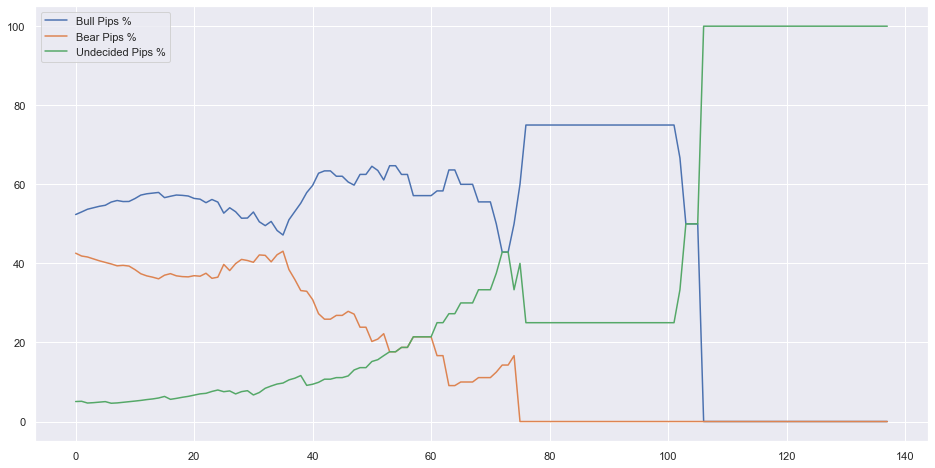

In [34]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hw_50_50[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the chart above we can see that the Bull Pips % increase with pips increase, and the Bear Pips % decrease with pips increase, the percentage of Undecided Pips increase with pip increase. The point with the best Bull pips % is around 60 pips where the Bull Pips % is about 60%, Pips range 40 to 70 gave very good result.

<AxesSubplot:ylabel='Signals'>

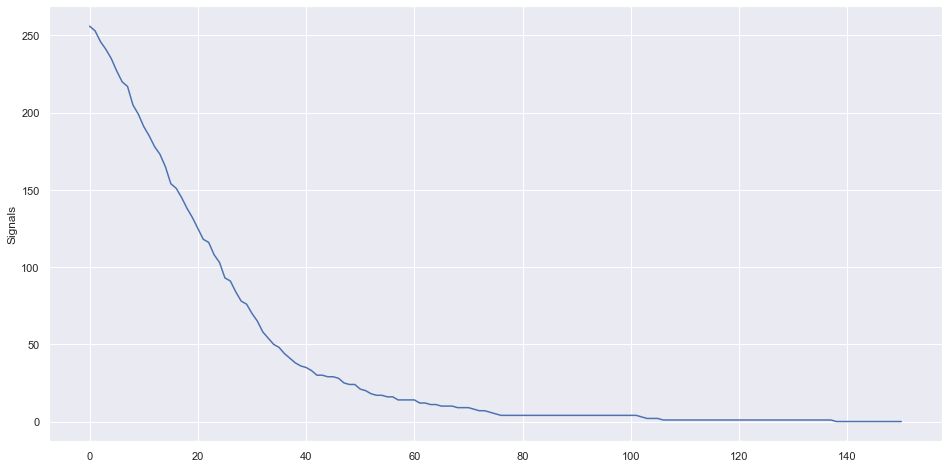

In [35]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_hw_50_50['Signals'], dashes=False)

Singnals decrease exponetially with increase in Pips

<AxesSubplot:>

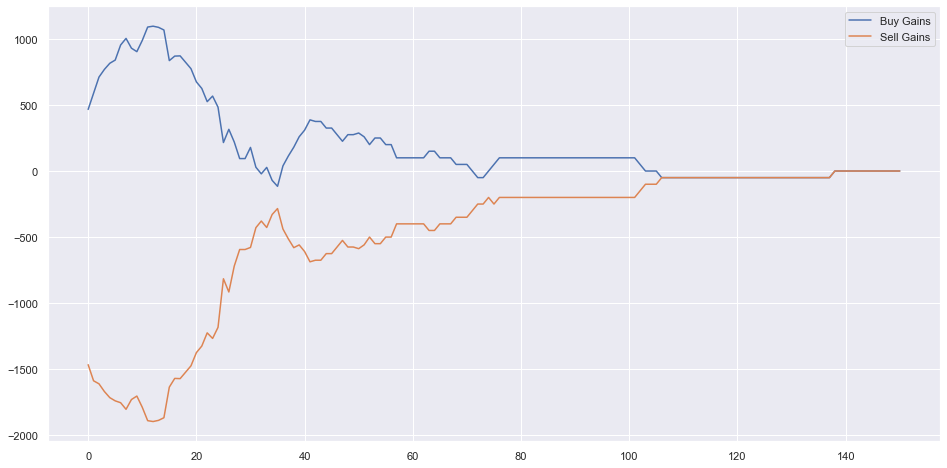

In [36]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_hw_50_50[['Buy Gains', 'Sell Gains']], dashes=False)

From the Plot above the Maximum Buy Gains of 1000 pips occurred at about 10 pips, at 10 pips the minimum Sell Gains of about -1800 pips occurred, at about 110pips both Buy Gains and Sell Gains are the same. From this plot my maximum profit when you buy and loss when you sell would be gotten from 0 to 20 pips

<AxesSubplot:ylabel='Density'>

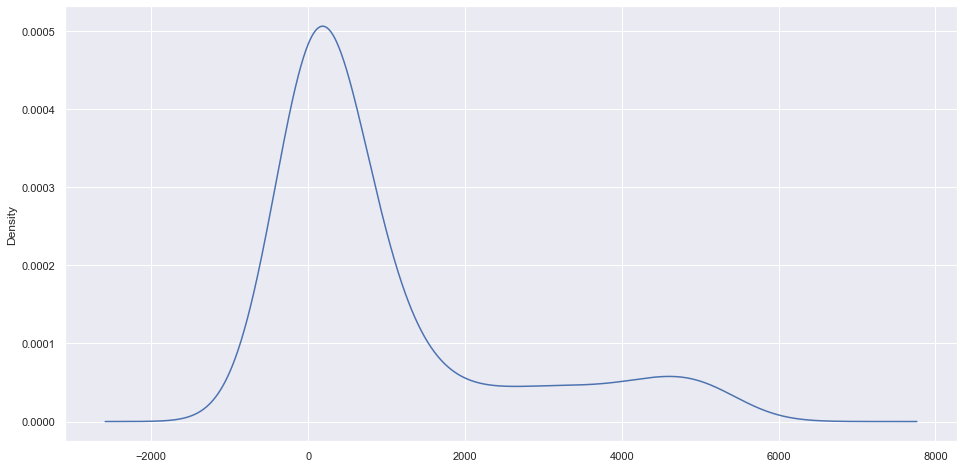

In [37]:
plt.figure(figsize=(16,8))
test_dataframe_hw_50_50['Bull Pips'].plot.kde()

This distribution is bimodal

<AxesSubplot:ylabel='Density'>

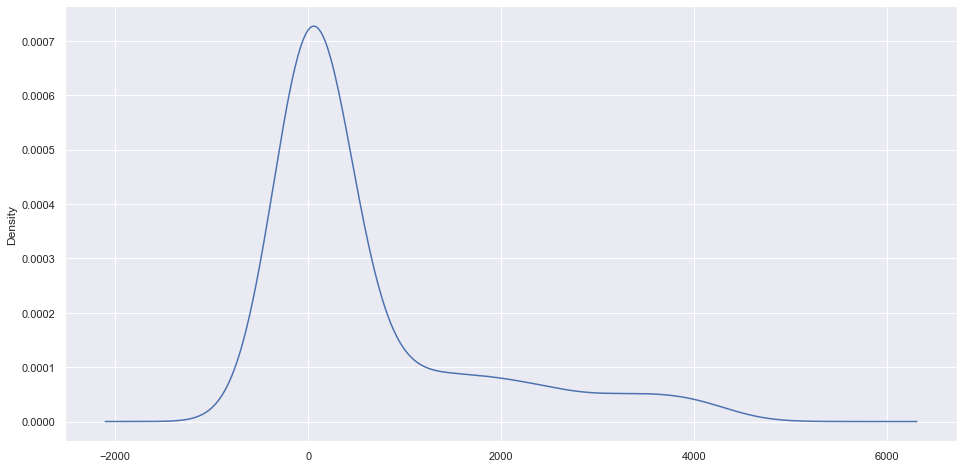

In [38]:
plt.figure(figsize=(16,8))
test_dataframe_hw_50_50['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

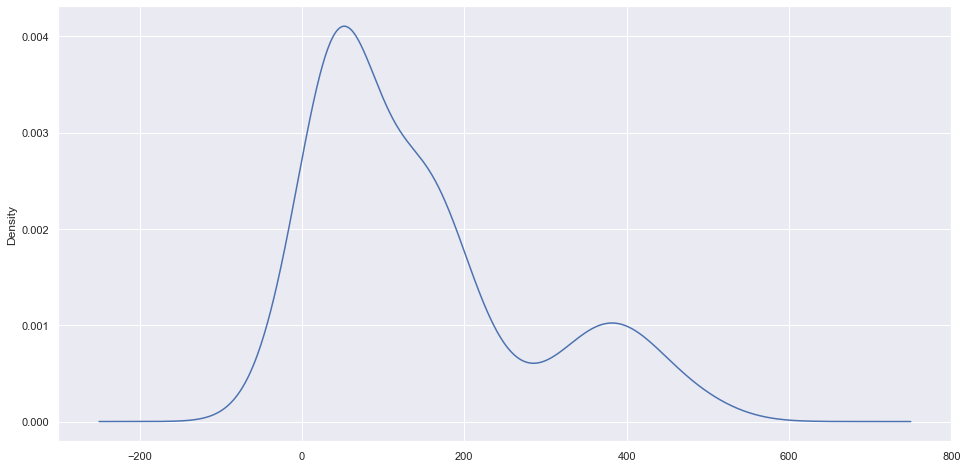

In [39]:
plt.figure(figsize=(16,8))
test_dataframe_hw_50_50['Undecided Pips'].plot.kde()

The distribution is bimodal

<AxesSubplot:ylabel='Density'>

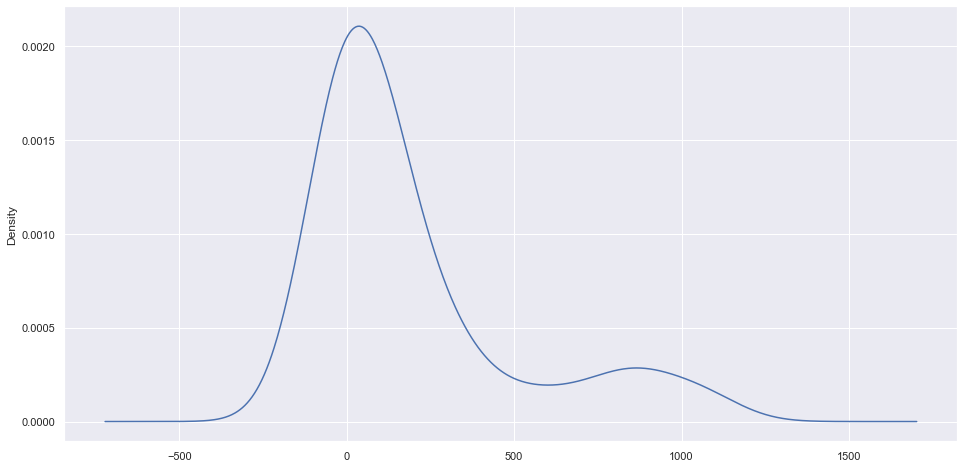

In [40]:
plt.figure(figsize=(16,8))
test_dataframe_hw_50_50['Buy Gains'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

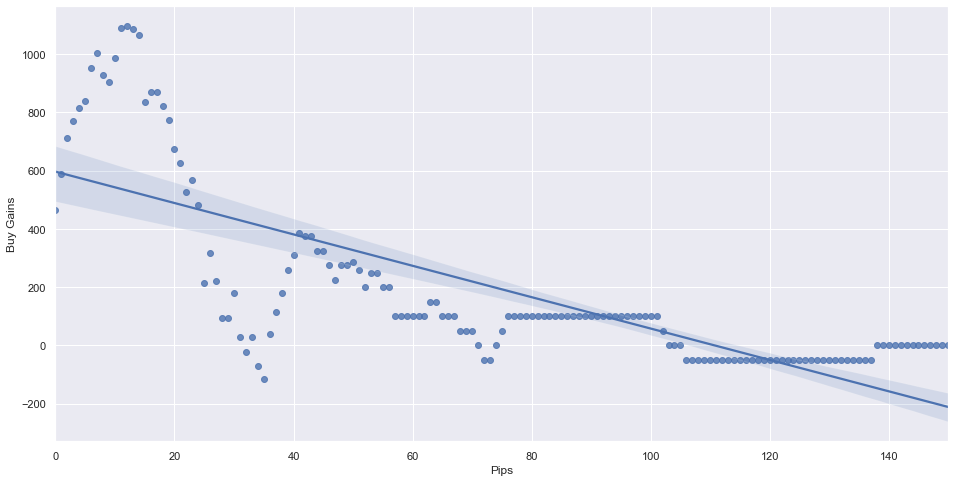

In [41]:
plt.figure(figsize=(16,8))
sns.regplot(y='Buy Gains', x='Pips', data=test_dataframe_hw_50_50)

The Regression plot has a negative correlation and the confidence level start to decrease from below 60 pips

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

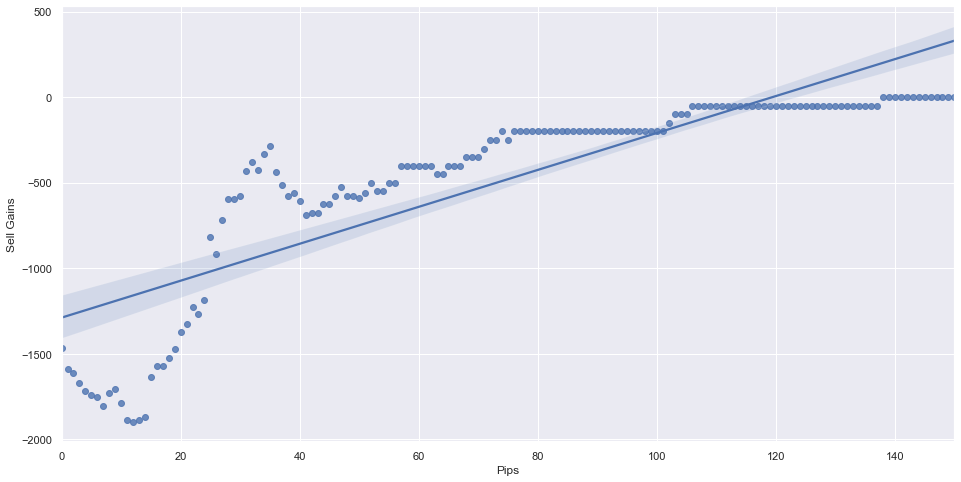

In [42]:
plt.figure(figsize=(16,8))
sns.regplot(y='Sell Gains', x = 'Pips', data=test_dataframe_hw_50_50)

The Regression plot has a strong positive correlation, and confidence level decrease from below 40 Pips

### Test for tp of 75 pips and sl 75 pips <a id="hw_75"></a>

In [43]:
test_dataframe_hw_75_75 = analyze(75, 75, reduced_dataset, 'High Wink')
test_dataframe_hw_75_75

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    256.0        1.0    45.0    34.0     84.0     92.0        2405.0   
1       1    253.0        1.0    45.0    33.0     84.0     90.0        2405.0   
2       2    246.0        1.0    45.0    32.0     82.0     86.0        2390.7   
3       3    241.0        1.0    44.0    32.0     81.0     83.0        2377.4   
4       4    235.0        1.0    43.0    31.0     80.0     80.0        2342.1   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
147   147      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
148   148      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
149   149      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
150   150      0.0        0.0     0.0     0.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          2303.3     11.0         -8.0             101.7     5780.0   
1          2250.2     12.0         -6.0             154.8     5780.0   
2          2165.3     13.0         -4.0             225.4     5765.7   
3          2071.7     12.0         -2.0             305.7     5677.4   
4          1977.4     12.0          0.0             364.7     5567.1   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0        0.0   
147           0.0      0.0          0.0               0.0        0.0   
148           0.0      0.0          0.0               0.0        0.0   
149           0.0      0.0          0.0               0.0        0.0   
150           0.0      0.0          0.0               0.0        0.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4853.3            75.0    53.976822    45.322787          0.700391   
1       4725.2            75.0    54.630347    44.660781          0.708871   
2       4565.3            75.0    55.407457    43.871805          0.720738   
3       4471.7            75.0    55.529582    43.736857          0.733561   
4       4302.4            75.0    55.981698    43.264116          0.754186   
..         ...             ...          ...          ...               ...   
146        0.0             0.0          NaN          NaN               NaN   
147        0.0             0.0          NaN          NaN               NaN   
148        0.0             0.0          NaN          NaN               NaN   
149        0.0             0.0          NaN          NaN               NaN   
150        0.0             0.0          NaN          NaN               NaN   

     Buy Gains  Sell Gains  
0        851.7     -1001.7  
1        979.8     -1129.8  
2       1125.4     -1275.4  
3       1130.7     -1280.7  
4       1189.7     -1339.7  
..         ...         ...  
146        0.0         0.0  
147        0.0         0.0  
148        0.0         0.0  
149        0.0         0.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [44]:
test_dataframe_hw_75_75.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   40.768212    0.198675   10.463576    6.072848   11.986755   
std     43.734045   67.599156    0.400331   13.125941    8.837873   22.296483   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     37.500000    1.000000    0.000000    1.000000    0.000000    0.000000   
50%     75.000000    5.000000    0.000000    3.000000    1.000000    1.000000   
75%    112.500000   39.500000    0.000000   14.000000   10.000000    8.500000   
max    150.000000  256.000000    1.000000   45.000000   34.000000   84.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    12.046358    374.520530    300.884106    4.390728    -0.059603   
std     23.575506    674.024624    595.236666    4.700317     2.352961   
min      0.000000      0.000000      0.000000    0.000000    -8.000000   
25%      0.000000      0.000000      0.000000    1.000000     0.000000   
50%      0.000000     31.400000      0.000000    3.000000     0.000000   
75%      7.000000    256.850000    190.900000    5.000000     1.000000   
max     92.000000   2405.000000   2303.300000   18.000000     5.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean          73.636424  1159.288742   756.347682       14.900662   
std          106.531277  1647.751216  1245.247330       30.024824   
min          -67.800000     0.000000     0.000000        0.000000   
25%            0.000000    75.000000     0.000000        0.000000   
50%           31.400000   256.400000    75.000000        0.000000   
75%          130.050000  1306.850000   940.900000        0.000000   
max          426.500000  5780.000000  4853.300000       75.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   138.000000   138.000000        138.000000   151.000000   151.000000  
mean     78.982416    20.768440          0.249144   388.040397  -417.841722  
std      19.606265    19.335846          0.508209   416.462242   468.197325  
min      51.611259     0.000000          0.000000     0.000000 -1747.200000  
25%      59.525566     0.000000          0.000000    75.000000  -501.200000  
50%      70.277511    29.722489          0.000000   256.400000  -256.400000  
75%     100.000000    39.450889          0.000000   493.100000   -75.000000  
max     100.000000    48.388741          2.062253  1597.200000     0.000000

<AxesSubplot:>

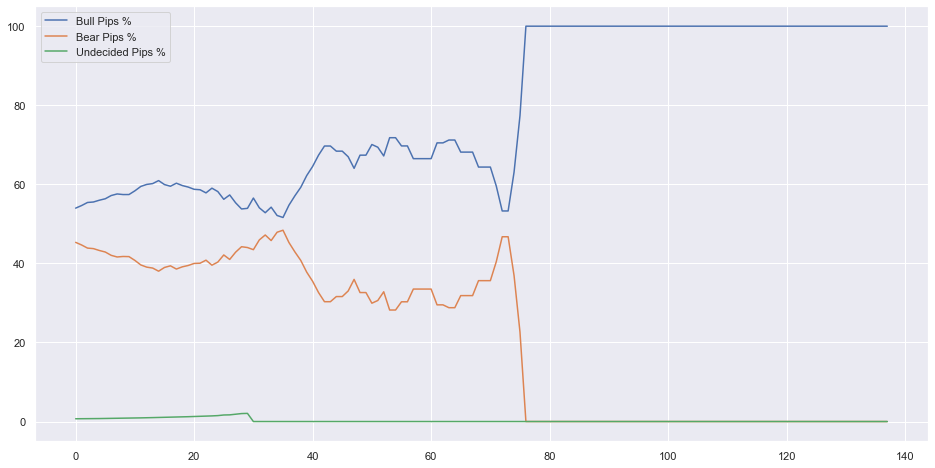

In [45]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hw_75_75[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips % started above Bear Pips % and Undecided Pips %
it also increases as pips increases, the Bear Pips % decreases as pips increases, the Undecided Pips % is very small and it also decrease with Pips increase, at about 50 pips Bull Pips % was around 70 %, 40 to 70 pips has a Bull Pip % of above 60%

<AxesSubplot:>

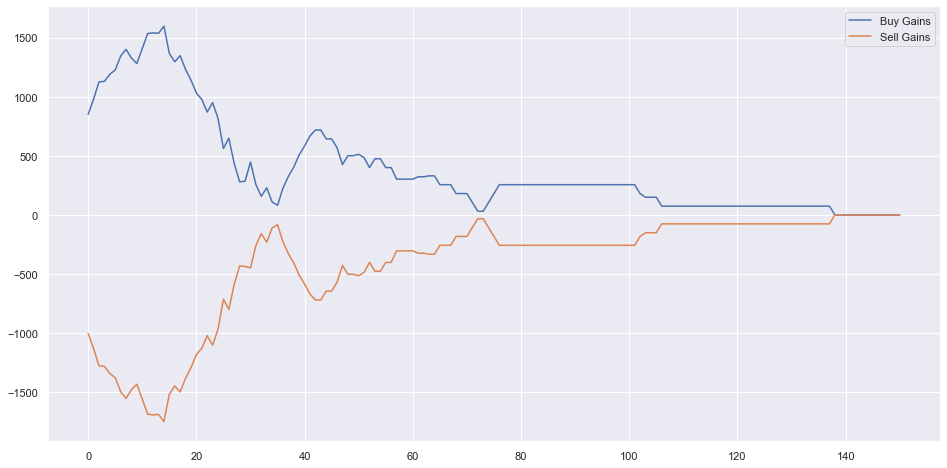

In [46]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_hw_75_75[['Buy Gains', 'Sell Gains']], dashes=False)

From the Plot above the Maximum Buy Gains of 1700 pips occurred at about 17 pips, at 17 pips the minimum Sell Gains of about -1800 pips occurred, at about 136 pips both Buy Gains and Sell Gains are the same. From this plot my maximum profit when you buy and loss when you sell would be gotten from 0 to 20 pips

<AxesSubplot:ylabel='Signals'>

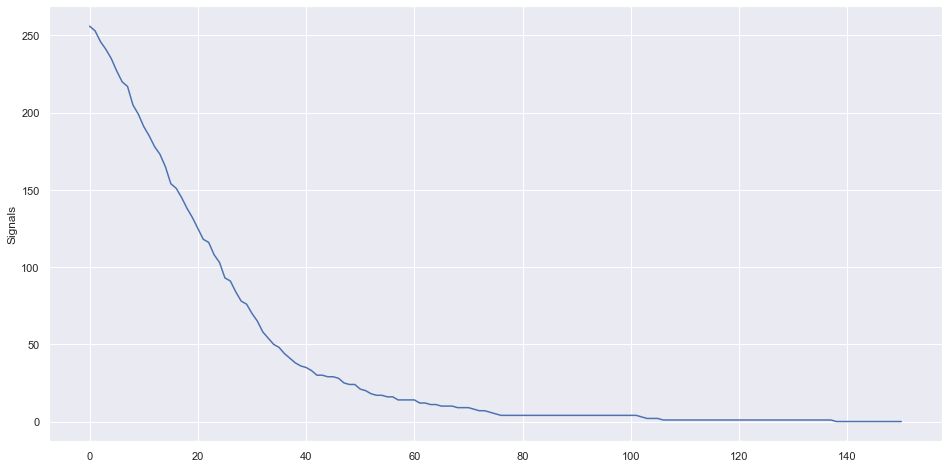

In [47]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_hw_75_75['Signals'], dashes=False)

<AxesSubplot:ylabel='Density'>

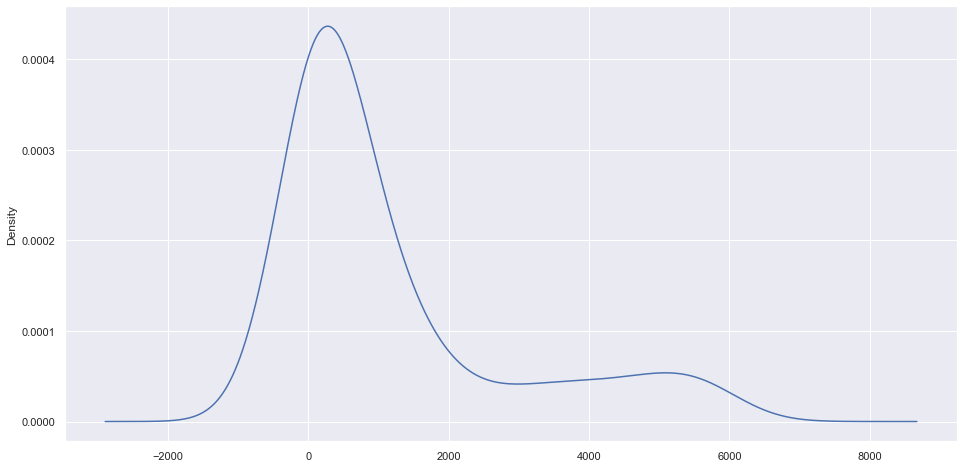

In [48]:
plt.figure(figsize=(16,8))
test_dataframe_hw_75_75['Bull Pips'].plot.kde()

The distribution is bimodal

<AxesSubplot:ylabel='Density'>

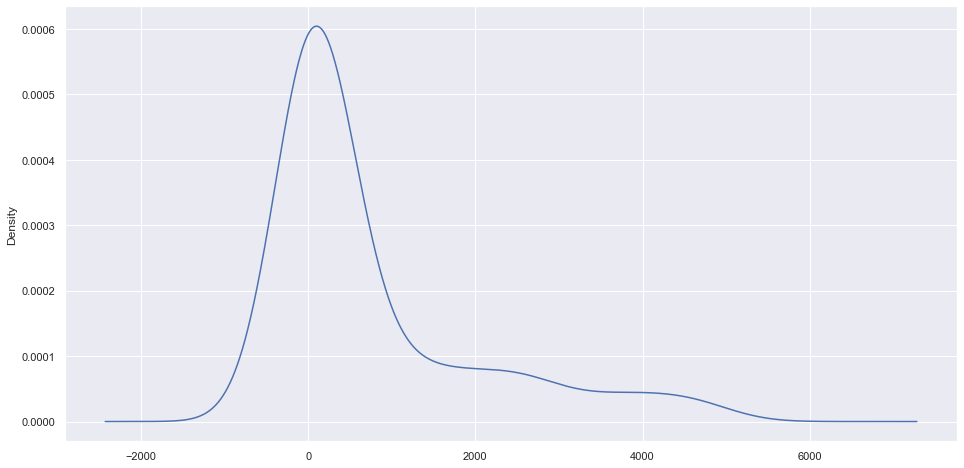

In [49]:
plt.figure(figsize=(16,8))
test_dataframe_hw_75_75['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

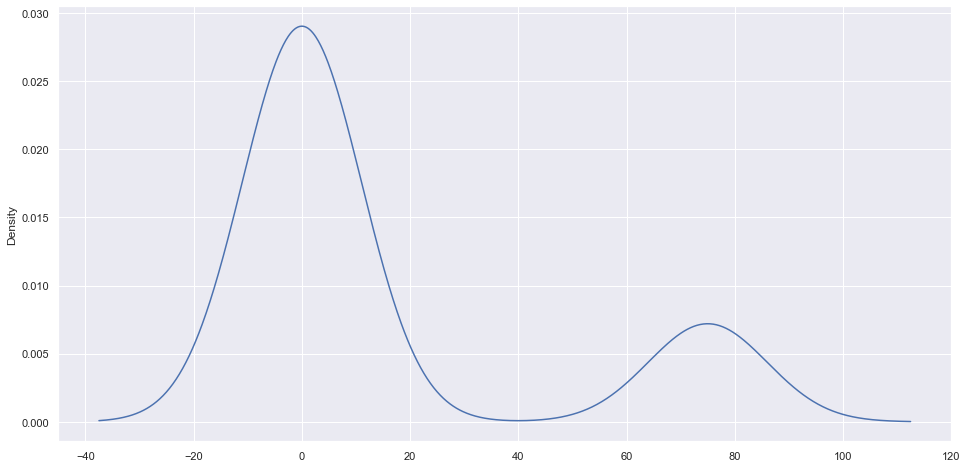

In [50]:
plt.figure(figsize=(16,8))
test_dataframe_hw_75_75['Undecided Pips'].plot.kde()

The distribution is bimodal

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

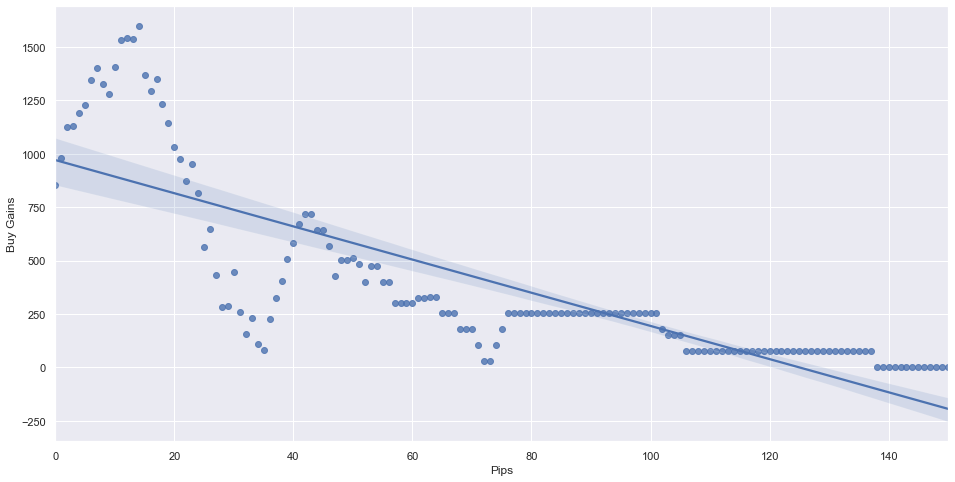

In [51]:
plt.figure(figsize=(16,8))
sns.regplot(y='Buy Gains', x = 'Pips', data=test_dataframe_hw_75_75)

The Regression plot has a negative correlation and confidence decrease from 50 Pips below

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

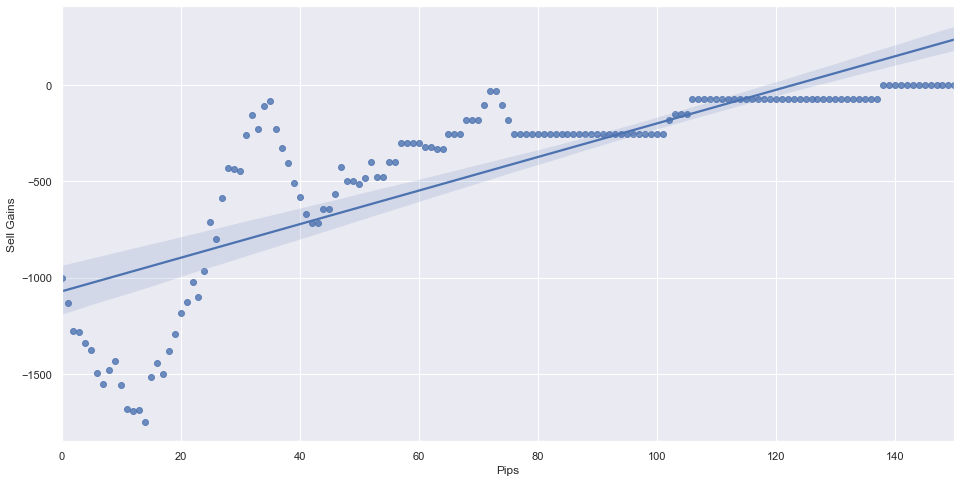

In [52]:
plt.figure(figsize=(16,8))
sns.regplot(y='Sell Gains', x = 'Pips', data=test_dataframe_hw_75_75)

The Regression plot has a positive correlation with decreasing confidence from below 50 pips

### Test For Tp of 100 pips Sl of 100 pips <a id="hw_100"></a>

In [53]:
test_dataframe_hw_100_100 = analyze(100, 100, reduced_dataset, 'High Wink')
test_dataframe_hw_100_100

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    256.0        0.0    22.0    17.0    109.0    108.0        3891.2   
1       1    253.0        0.0    22.0    17.0    109.0    105.0        3891.2   
2       2    246.0        0.0    22.0    17.0    107.0    100.0        3876.9   
3       3    241.0        0.0    21.0    17.0    106.0     97.0        3863.6   
4       4    235.0        0.0    20.0    16.0    105.0     94.0        3828.3   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
147   147      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
148   148      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
149   149      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
150   150      0.0        0.0     0.0     0.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          3283.4      5.0          1.0             607.8     6091.2   
1          3159.2      5.0          4.0             732.0     6091.2   
2          2999.1      5.0          7.0             877.8     6076.9   
3          2905.5      4.0          9.0             958.1     5963.6   
4          2811.2      4.0         11.0            1017.1     5828.3   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0        0.0   
147           0.0      0.0          0.0               0.0        0.0   
148           0.0      0.0          0.0               0.0        0.0   
149           0.0      0.0          0.0               0.0        0.0   
150           0.0      0.0          0.0               0.0        0.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4983.4             0.0    55.001535    44.998465               0.0   
1       4859.2             0.0    55.625365    44.374635               0.0   
2       4699.1             0.0    56.392910    43.607090               0.0   
3       4605.5             0.0    56.424861    43.575139               0.0   
4       4411.2             0.0    56.919771    43.080229               0.0   
..         ...             ...          ...          ...               ...   
146        0.0             0.0          NaN          NaN               NaN   
147        0.0             0.0          NaN          NaN               NaN   
148        0.0             0.0          NaN          NaN               NaN   
149        0.0             0.0          NaN          NaN               NaN   
150        0.0             0.0          NaN          NaN               NaN   

     Buy Gains  Sell Gains  
0       1107.8     -1107.8  
1       1232.0     -1232.0  
2       1377.8     -1377.8  
3       1358.1     -1358.1  
4       1417.1     -1417.1  
..         ...         ...  
146        0.0         0.0  
147        0.0         0.0  
148        0.0         0.0  
149        0.0         0.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [54]:
test_dataframe_hw_100_100.describe()

Pips     Signals  Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000      151.0  151.000000  151.000000  151.000000   
mean    75.000000   40.768212        0.0    5.662252    3.701987   17.119205   
std     43.734045   67.599156        0.0    5.878648    5.011713   29.919208   
min      0.000000    0.000000        0.0    0.000000    0.000000    0.000000   
25%     37.500000    1.000000        0.0    1.000000    0.000000    0.000000   
50%     75.000000    5.000000        0.0    3.000000    1.000000    1.000000   
75%    112.500000   39.500000        0.0    7.000000    7.000000   15.500000   
max    150.000000  256.000000        0.0   22.000000   17.000000  109.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    14.284768    681.953642    428.147682    1.960265     2.834437   
std     27.244664   1132.992010    808.577782    1.473684     3.621106   
min      0.000000      0.000000      0.000000   -1.000000     0.000000   
25%      0.000000      0.000000      0.000000    1.000000     0.000000   
50%      0.000000     31.400000      0.000000    2.000000     1.000000   
75%     10.000000    704.550000    358.700000    3.000000     5.500000   
max    108.000000   3891.200000   3283.400000    6.000000    14.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000           151.0   
mean         253.805960  1248.178808   798.346358             0.0   
std          352.546035  1711.977199  1292.045891             0.0   
min          -25.100000     0.000000     0.000000             0.0   
25%            0.000000   100.000000     0.000000             0.0   
50%           31.400000   331.400000   100.000000             0.0   
75%          382.500000  1404.550000  1058.700000             0.0   
max         1161.800000  6091.200000  4983.400000             0.0   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   138.000000   138.000000             138.0   151.000000   151.000000  
mean     79.156593    20.843407               0.0   449.832450  -449.832450  
std      19.330350    19.330350               0.0   454.626946   454.626946  
min      52.638854     0.000000               0.0     0.000000 -1758.900000  
25%      60.370885     0.000000               0.0   100.000000  -521.550000  
50%      69.700773    30.299227               0.0   331.400000  -331.400000  
75%     100.000000    39.629115               0.0   521.550000  -100.000000  
max     100.000000    47.361146               0.0  1758.900000     0.000000

<AxesSubplot:>

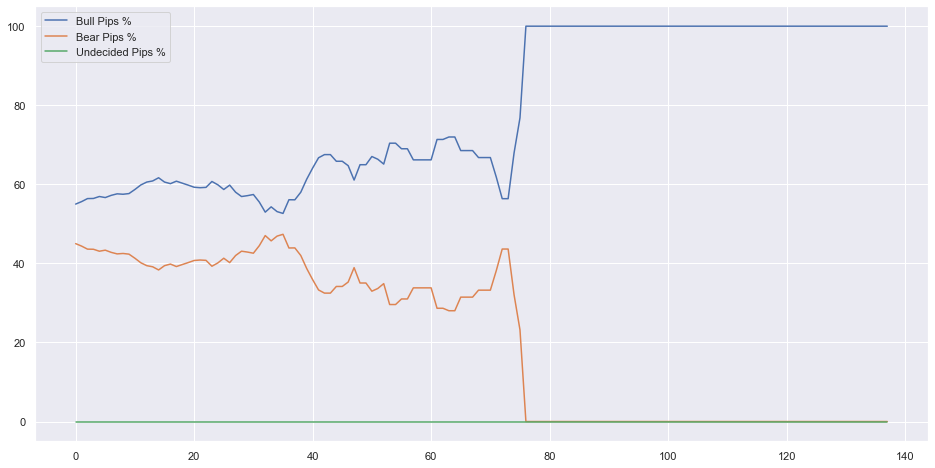

In [55]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hw_100_100[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips % started above Bear Pips % and Undecided Pips % it also increases as pips increases, the Bear Pips % decreases as pips increases, the Undecided Pips % is 0, 40 to 70 pips has a bull Pips % of over 60%

<AxesSubplot:ylabel='Signals'>

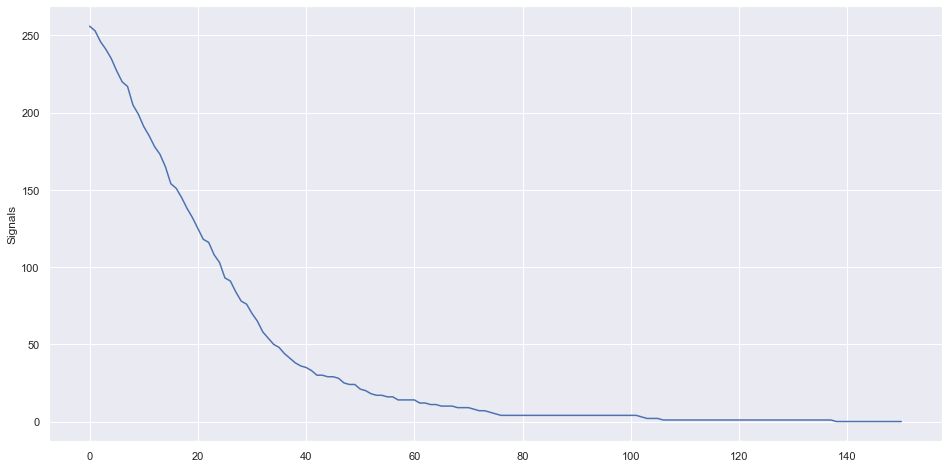

In [56]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_hw_100_100['Signals'], dashes=False)

<AxesSubplot:>

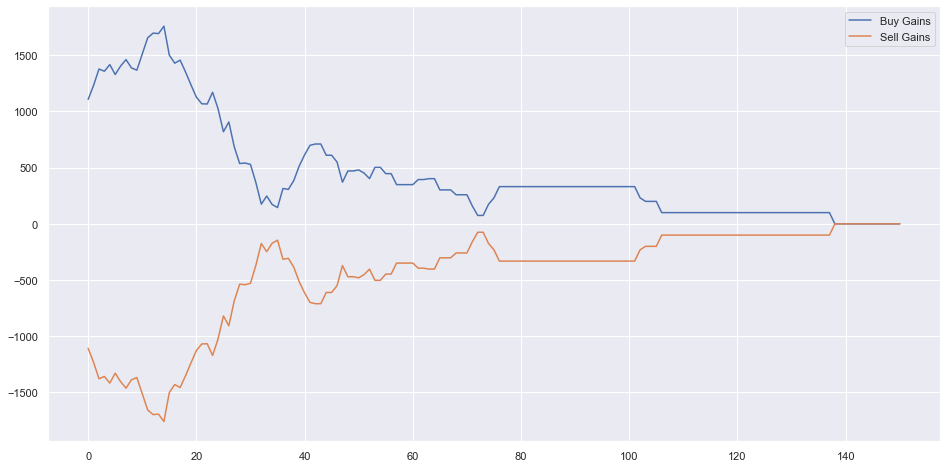

In [57]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_hw_100_100[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

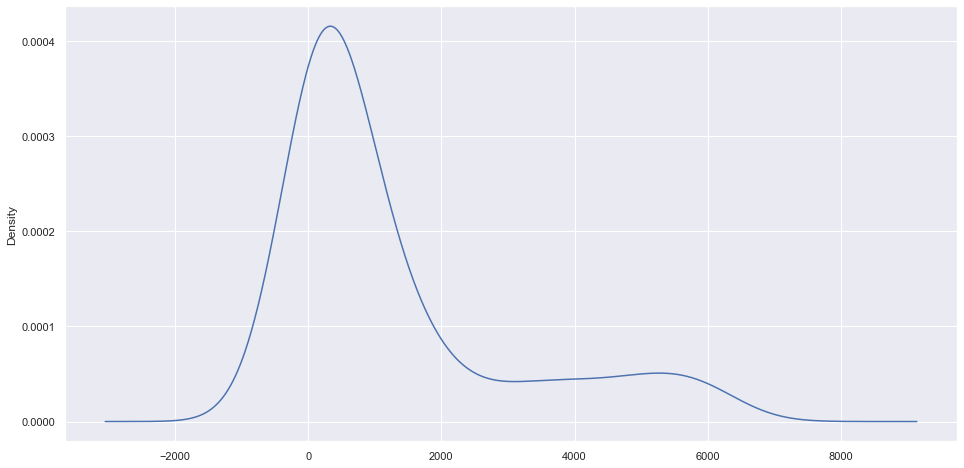

In [58]:
plt.figure(figsize=(16,8))
test_dataframe_hw_100_100['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

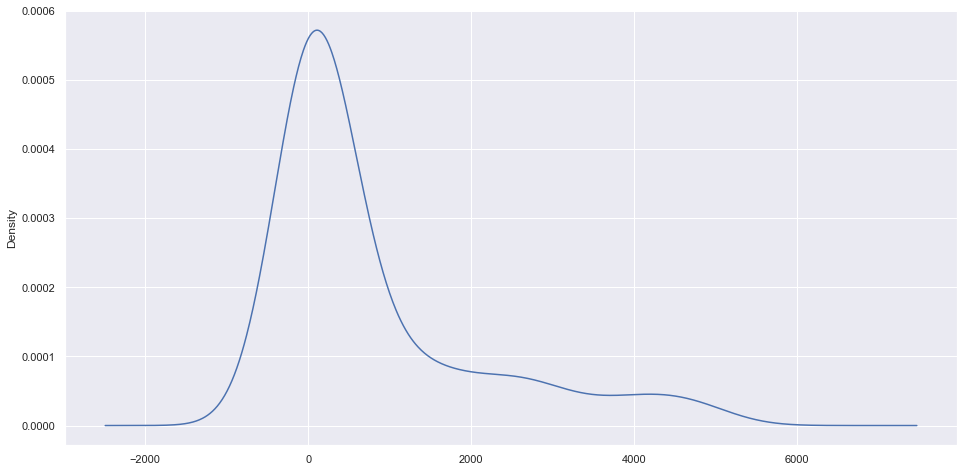

In [59]:
plt.figure(figsize=(16,8))
test_dataframe_hw_100_100['Bear Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

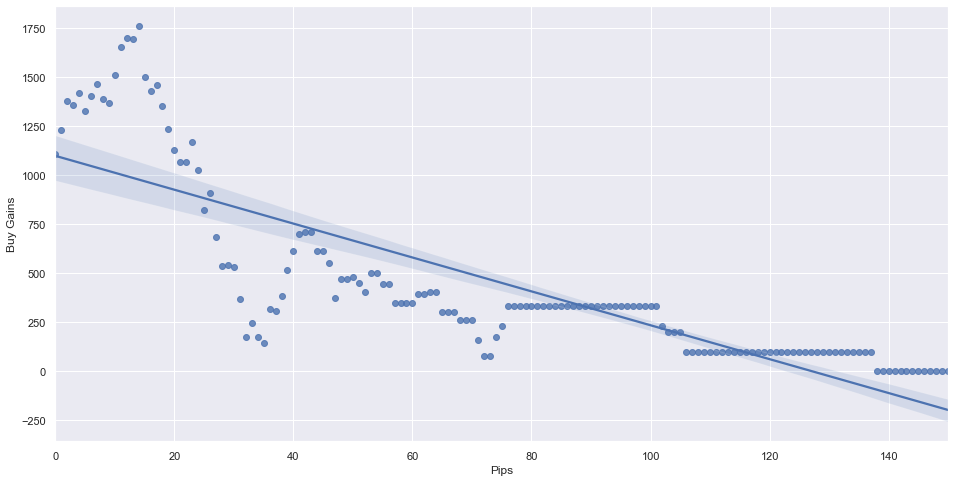

In [60]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_hw_100_100)

The Regression plot has a negative correlation with decreasing confidence from below 40 pips

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

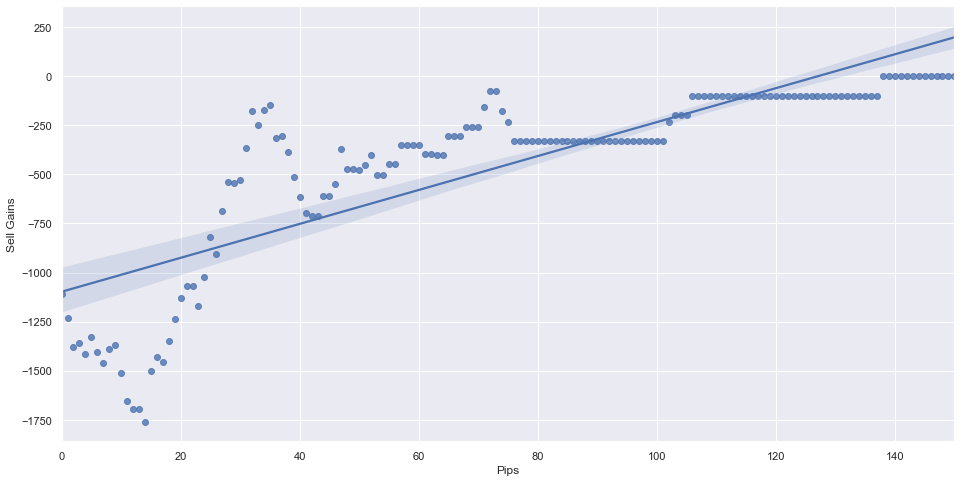

In [61]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_hw_100_100)

The Regression plot has a positive correlation with decreasing confidence from below 40 pips

## Test For Low Wink <a id="lw"></a>

### Test for Tp of 50 pips and Sl of 50pips <a id="lw_50"></a>

In [62]:
test_dataframe_lw_50_50 = analyze(50, 50, reduced_dataset, 'Low Wink')
test_dataframe_lw_50_50

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    254.0       10.0    86.0    63.0     44.0     51.0         825.8   
1       1    246.0       10.0    84.0    62.0     40.0     50.0         722.7   
2       2    238.0       10.0    80.0    60.0     39.0     49.0         693.4   
3       3    231.0        9.0    78.0    60.0     38.0     46.0         689.4   
4       4    219.0        9.0    75.0    57.0     35.0     43.0         636.4   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
147   147      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
148   148      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
149   149      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
150   150      0.0        0.0     0.0     0.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          1009.5     23.0         -7.0            -183.7     5125.8   
1           969.0     22.0        -10.0            -246.3     4922.7   
2           937.1     20.0        -10.0            -243.7     4693.4   
3           856.6     18.0         -8.0            -167.2     4589.4   
4           844.7     18.0         -8.0            -208.3     4386.4   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0        0.0   
147           0.0      0.0          0.0               0.0        0.0   
148           0.0      0.0          0.0               0.0        0.0   
149           0.0      0.0          0.0               0.0        0.0   
150           0.0      0.0          0.0               0.0        0.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4159.5           500.0    52.382656    42.507639          5.109705   
1       4069.0           500.0    51.863207    42.869033          5.267760   
2       3937.1           500.0    51.403538    43.120311          5.476151   
3       3856.6           450.0    51.589478    43.352068          5.058453   
4       3694.7           450.0    51.416582    43.308600          5.274818   
..         ...             ...          ...          ...               ...   
146        0.0             0.0          NaN          NaN               NaN   
147        0.0             0.0          NaN          NaN               NaN   
148        0.0             0.0          NaN          NaN               NaN   
149        0.0             0.0          NaN          NaN               NaN   
150        0.0             0.0          NaN          NaN               NaN   

     Buy Gains  Sell Gains  
0        466.3     -1466.3  
1        353.7     -1353.7  
2        256.3     -1256.3  
3        282.8     -1182.8  
4        241.7     -1141.7  
..         ...         ...  
146        0.0         0.0  
147        0.0         0.0  
148        0.0         0.0  
149        0.0         0.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [63]:
test_dataframe_lw_50_50.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   35.456954    2.807947   11.589404   11.251656    4.953642   
std     43.734045   59.758819    2.534338   21.098585   16.626973    9.907127   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     37.500000    1.000000    0.000000    1.000000    0.000000    0.000000   
50%     75.000000    8.000000    2.000000    1.000000    4.000000    0.000000   
75%    112.500000   35.500000    4.000000   13.000000   12.500000    3.000000   
max    150.000000  254.000000   10.000000   86.000000   63.000000   44.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean     4.854305     97.625828     87.306623    0.337748     0.099338   
std     10.494695    182.092951    200.211164    6.016519     2.357272   
min      0.000000      0.000000      0.000000  -12.000000   -10.000000   
25%      0.000000      0.000000      0.000000   -3.000000     0.000000   
50%      1.000000      0.000000      6.300000    0.000000     0.000000   
75%      3.000000     63.400000     55.300000    0.000000     0.000000   
max     51.000000    825.800000   1009.500000   23.000000     6.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean          10.319205   677.096026   649.889404      140.397351   
std           59.362399  1235.938413  1016.254870      126.716907   
min         -246.300000     0.000000     0.000000        0.000000   
25%            0.000000    50.000000     0.000000        0.000000   
50%            0.000000    50.000000   206.300000      100.000000   
75%           13.000000   713.400000   680.300000      200.000000   
max          200.900000  5125.800000  4159.500000      500.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains   Sell Gains  
count   114.000000   114.000000        114.000000  151.000000   151.000000  
mean     33.588439    42.485902         23.925659 -113.190728  -167.603974  
std      16.017313    13.000173         16.047587  226.995011   369.230268  
min      14.033118     0.000000          0.000000 -697.100000 -1466.300000  
25%      20.019067    40.664768          7.841442 -256.300000  -104.600000  
50%      29.366957    43.919203         25.265285 -100.000000    -1.000000  
75%      43.989219    50.000000         33.333333    0.000000     0.000000  
max     100.000000    57.900646         66.666667  515.400000   297.100000

<AxesSubplot:>

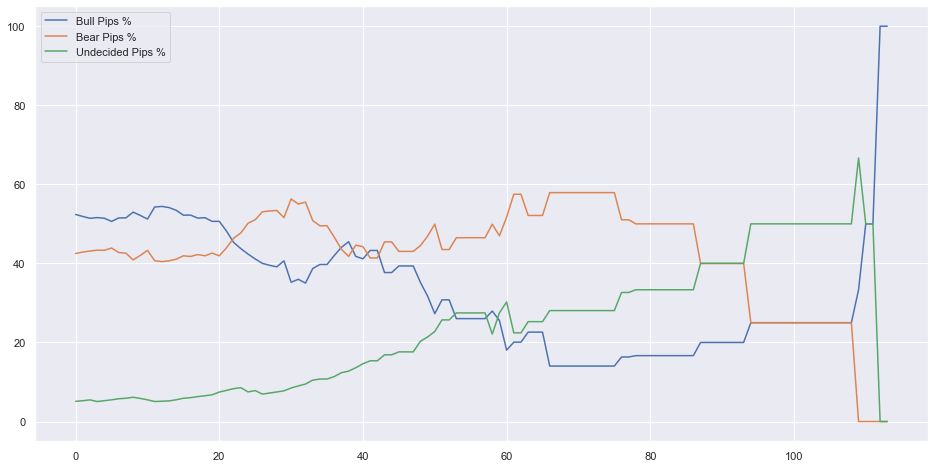

In [64]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_lw_50_50[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the chart above we can see that the Bull Pips % decrease with pips increase, and the Bear Pips % was kinda steady with pips increase, the percentage of Undecided Pips increase with pip increase. The point with the best Bear pips % is around 60 pips where the Bear Pips % is about 60%, Pips range 60 to 80 gave very good result.

<AxesSubplot:ylabel='Signals'>

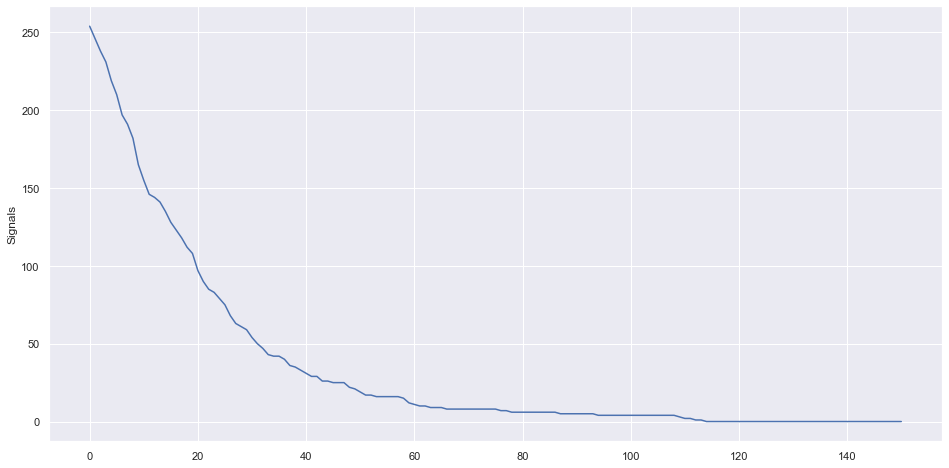

In [65]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_lw_50_50['Signals'])

<AxesSubplot:>

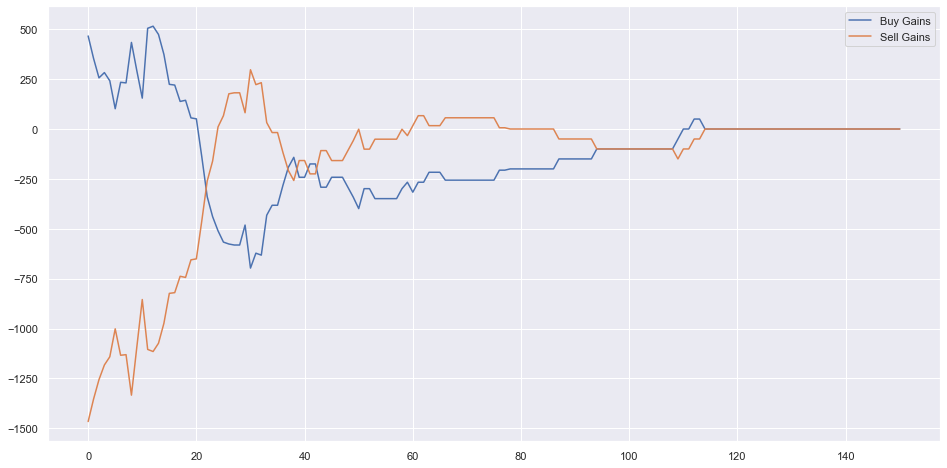

In [66]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_lw_50_50[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

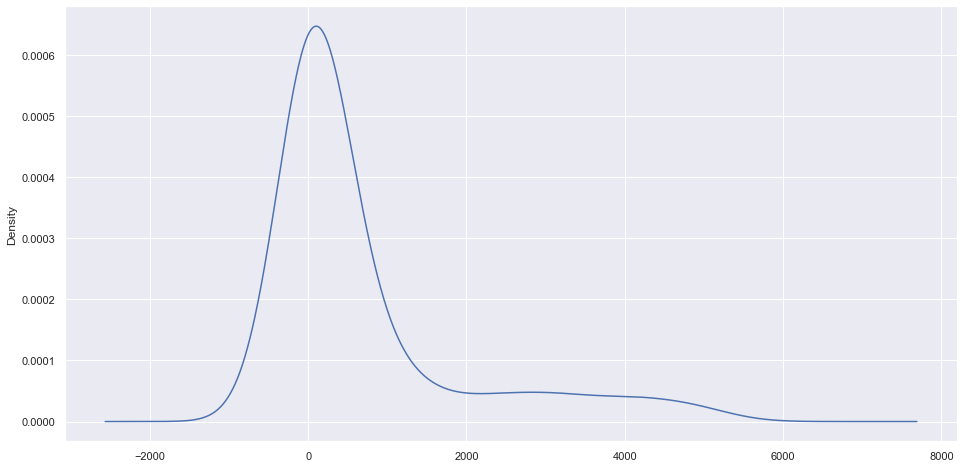

In [67]:
plt.figure(figsize=(16,8))
test_dataframe_lw_50_50['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

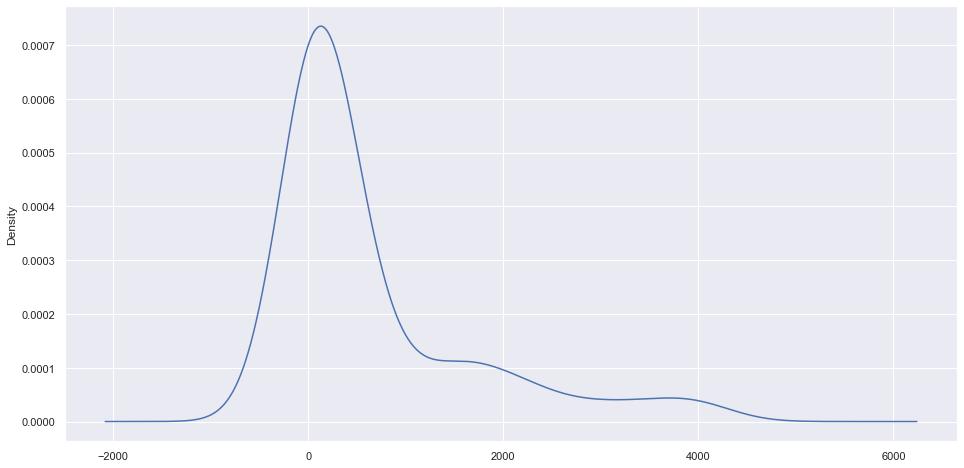

In [68]:
plt.figure(figsize=(16,8))
test_dataframe_lw_50_50['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

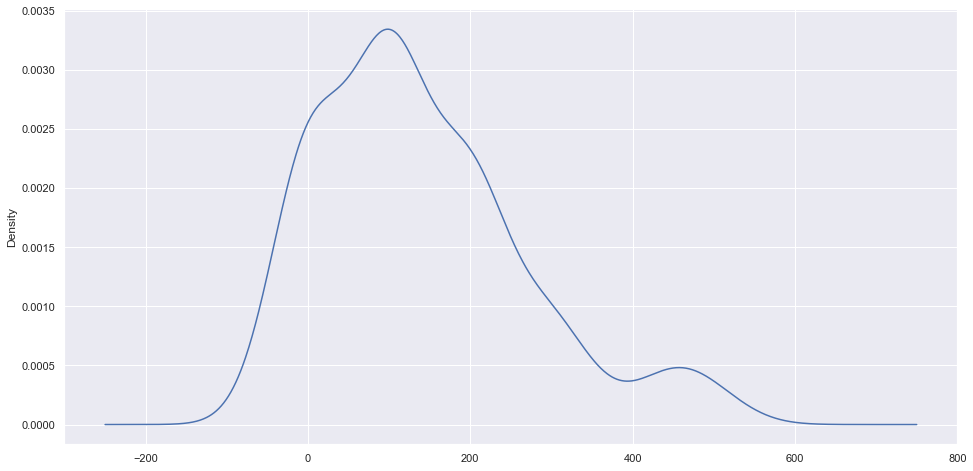

In [69]:
plt.figure(figsize=(16,8))
test_dataframe_lw_50_50['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

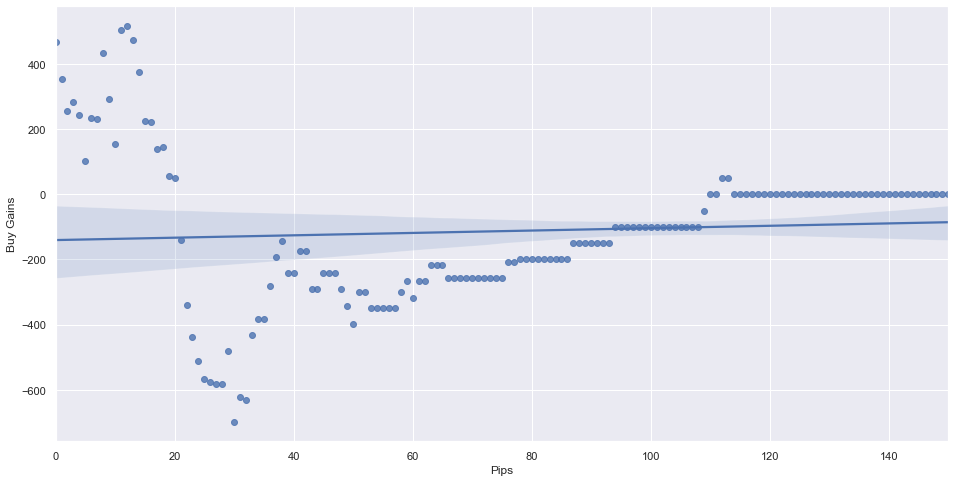

In [70]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_lw_50_50)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

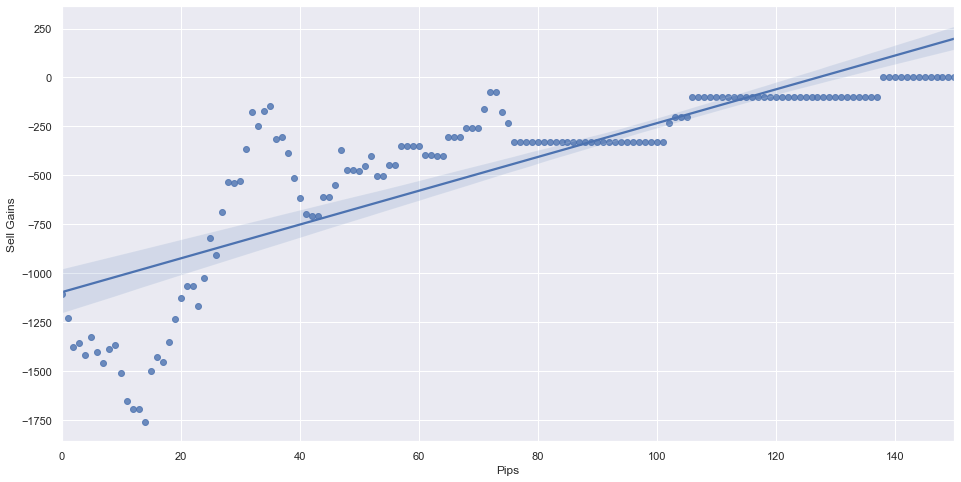

In [71]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_hw_100_100)

### Test For Tp of 75 pips and Sl of 75 pips <a id="lw_75"></a>

In [72]:
test_dataframe_lw_75_75 = analyze(75, 75, reduced_dataset, 'Low Wink')
test_dataframe_lw_75_75

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    254.0        1.0    45.0    34.0     83.0     91.0        2372.8   
1       1    246.0        1.0    44.0    33.0     78.0     90.0        2213.5   
2       2    238.0        1.0    42.0    33.0     75.0     87.0        2174.8   
3       3    231.0        1.0    41.0    33.0     72.0     84.0        2052.1   
4       4    219.0        1.0    40.0    32.0     67.0     79.0        1920.5   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
147   147      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
148   148      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
149   149      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
150   150      0.0        0.0     0.0     0.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          2295.7     11.0         -8.0              77.1     5747.8   
1          2255.2     11.0        -12.0             -41.7     5513.5   
2          2153.8      9.0        -12.0              21.0     5324.8   
3          2073.3      8.0        -12.0             -21.2     5127.1   
4          2024.8      8.0        -12.0            -104.3     4920.5   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0        0.0   
147           0.0      0.0          0.0               0.0        0.0   
148           0.0      0.0          0.0               0.0        0.0   
149           0.0      0.0          0.0               0.0        0.0   
150           0.0      0.0          0.0               0.0        0.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4845.7            75.0    53.876365    45.420631          0.703004   
1       4730.2            75.0    53.432118    45.841046          0.726836   
2       4628.8            75.0    53.096145    46.155994          0.747861   
3       4548.3            75.0    52.583484    46.647317          0.769199   
4       4424.8            75.0    52.232944    46.970903          0.796153   
..         ...             ...          ...          ...               ...   
146        0.0             0.0          NaN          NaN               NaN   
147        0.0             0.0          NaN          NaN               NaN   
148        0.0             0.0          NaN          NaN               NaN   
149        0.0             0.0          NaN          NaN               NaN   
150        0.0             0.0          NaN          NaN               NaN   

     Buy Gains  Sell Gains  
0        827.1      -977.1  
1        708.3      -858.3  
2        621.0      -771.0  
3        503.8      -653.8  
4        420.7      -570.7  
..         ...         ...  
146        0.0         0.0  
147        0.0         0.0  
148        0.0         0.0  
149        0.0         0.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [73]:
test_dataframe_lw_75_75.describe()

Pips     Signals   Undecided     Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.00000  151.000000  151.000000   
mean    75.000000   35.456954    0.066225    7.02649    8.947020    8.993377   
std     43.734045   59.758819    0.249503   11.51865    9.686959   18.948877   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%     37.500000    1.000000    0.000000    1.00000    0.000000    0.000000   
50%     75.000000    8.000000    0.000000    1.00000    6.000000    0.000000   
75%    112.500000   35.500000    0.000000    9.00000   13.000000    5.000000   
max    150.000000  254.000000    1.000000   45.00000   34.000000   83.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    10.423841    267.933113    252.084106   -1.920530    -1.430464   
std     20.372019    555.410193    522.724420    4.070255     3.056163   
min      0.000000      0.000000      0.000000  -11.000000   -13.000000   
25%      0.000000      0.000000      0.000000   -5.000000    -3.000000   
50%      1.000000      0.000000      6.300000   -2.000000     0.000000   
75%      8.500000    145.600000    150.750000    0.000000     0.000000   
max     91.000000   2372.800000   2295.700000   11.000000     5.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean          15.849007   794.919868   923.110596        4.966887   
std           76.731992  1414.060422  1216.919964       18.712711   
min         -167.400000     0.000000     0.000000        0.000000   
25%           -6.300000    75.000000     0.000000        0.000000   
50%            0.000000    75.000000   456.300000        0.000000   
75%            0.000000   820.600000  1125.750000        0.000000   
max          383.500000  5747.800000  4845.700000       75.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains  Sell Gains  
count   114.000000   114.000000        114.000000  151.000000  151.000000  
mean     33.710702    66.217441          0.071856 -133.157616  123.223841  
std      16.236297    16.322147          0.234033  330.817332  351.279549  
min      14.116318     0.000000          0.000000 -842.400000 -977.100000  
25%      20.000000    56.964199          0.000000 -353.700000    0.000000  
50%      29.642201    70.357799          0.000000 -150.000000  150.000000  
75%      43.035801    80.000000          0.000000    0.000000  353.700000  
max     100.000000    85.883682          0.969669  827.100000  842.400000

<AxesSubplot:>

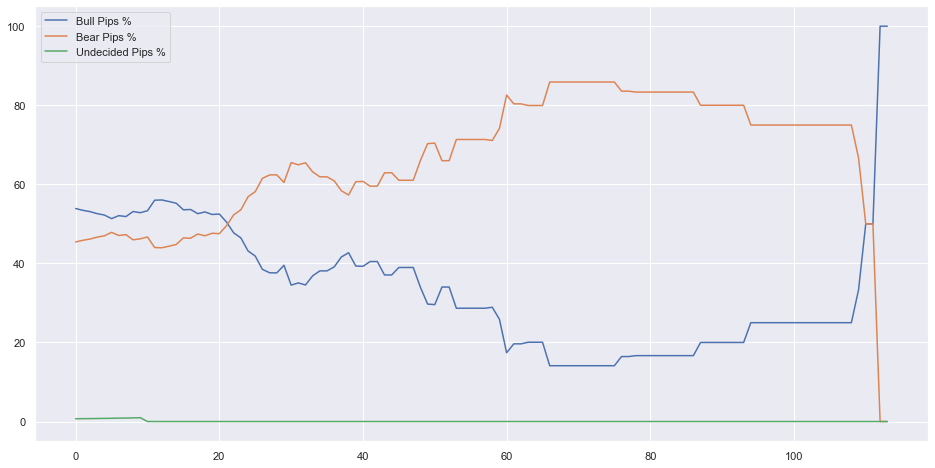

In [74]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_lw_75_75[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the chart above we can see that the Bull Pips % decrease with pips increase, and the Bear Pips % increase with pips increase, the percentage of Undecided Pips was steady. The point with the best Bear pips % is around 60 pips where the Bear Pips % is about 60%, Pips range 60 to 80 gave very good result.

<AxesSubplot:ylabel='Signals'>

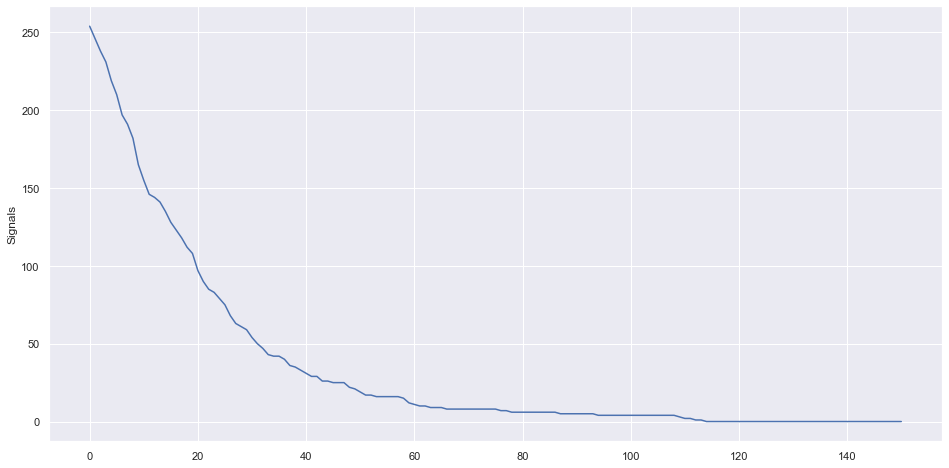

In [75]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_lw_75_75['Signals'])

<AxesSubplot:>

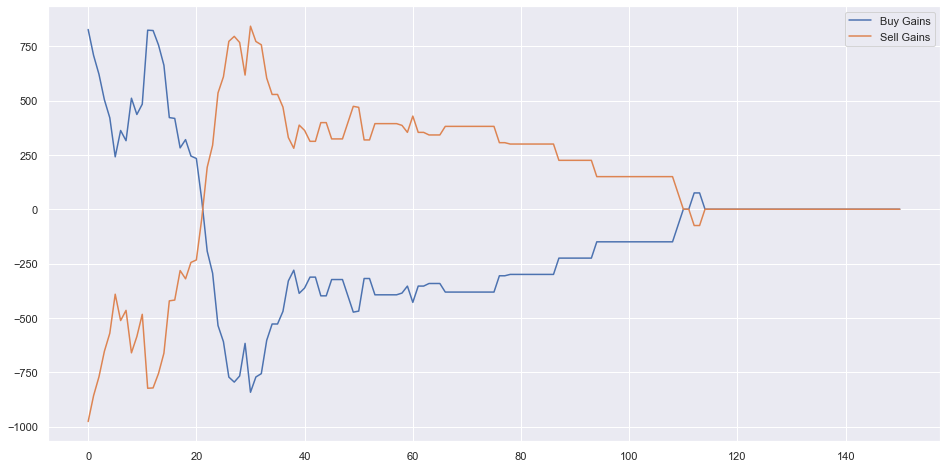

In [76]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_lw_75_75[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

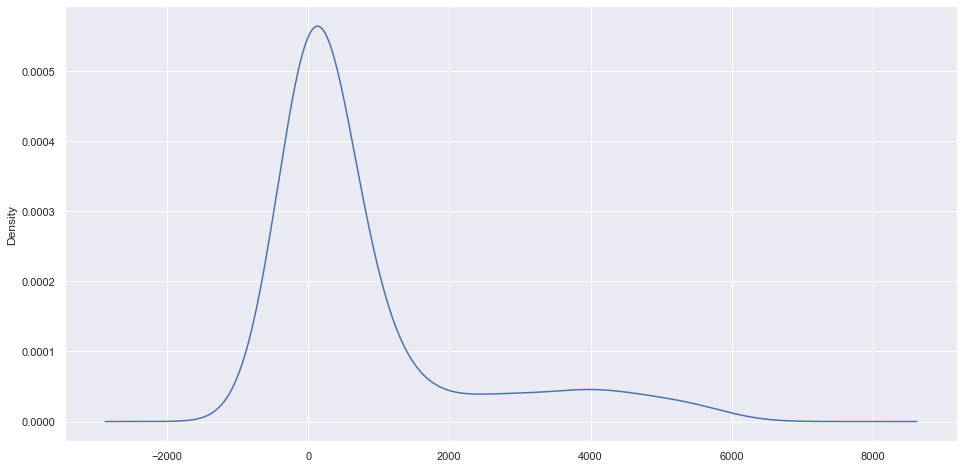

In [77]:
plt.figure(figsize=(16,8))
test_dataframe_lw_75_75['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

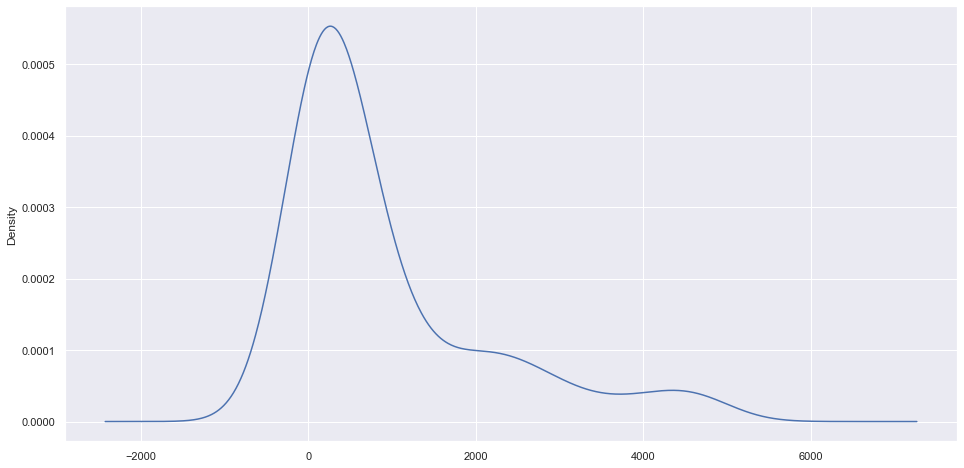

In [78]:
plt.figure(figsize=(16,8))
test_dataframe_lw_75_75['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

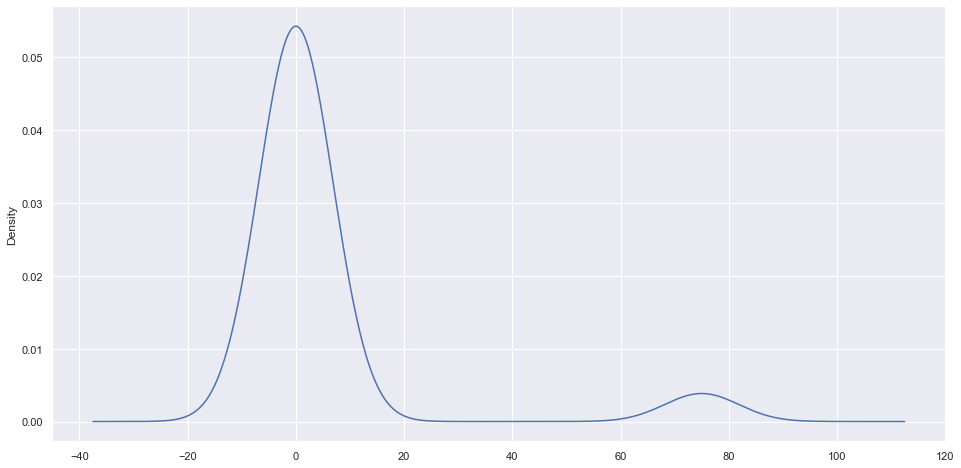

In [79]:
plt.figure(figsize=(16,8))
test_dataframe_lw_75_75['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

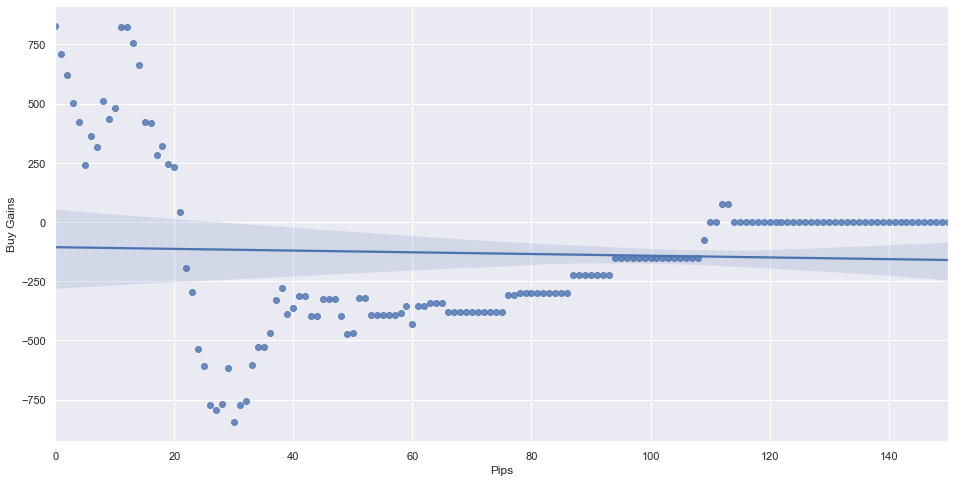

In [80]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_lw_75_75)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

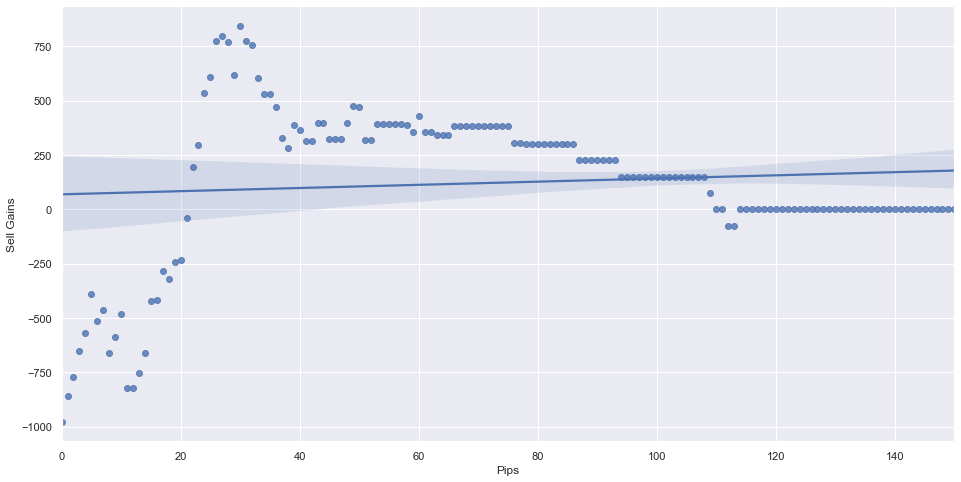

In [81]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_lw_75_75)

### Test For Tp 100 pips and Sl 100 pips <a id="lw_100"></a>

In [82]:
test_dataframe_lw_100_100 = analyze(100, 100, reduced_dataset, 'Low Wink')
test_dataframe_lw_100_100

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    254.0        0.0    21.0    17.0    109.0    107.0        3928.4   
1       1    246.0        0.0    20.0    17.0    104.0    105.0        3769.1   
2       2    238.0        0.0    18.0    17.0    101.0    102.0        3730.4   
3       3    231.0        0.0    18.0    17.0     97.0     99.0        3528.2   
4       4    219.0        0.0    18.0    16.0     91.0     94.0        3350.2   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
147   147      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
148   148      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
149   149      0.0        0.0     0.0     0.0      0.0      0.0           0.0   
150   150      0.0        0.0     0.0     0.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          3275.8      4.0          2.0             652.6     6028.4   
1          3154.5      3.0         -1.0             614.6     5769.1   
2          3053.1      1.0         -1.0             677.3     5530.4   
3          2972.6      1.0         -2.0             555.6     5328.2   
4          2924.1      2.0         -3.0             426.1     5150.2   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0        0.0   
147           0.0      0.0          0.0               0.0        0.0   
148           0.0      0.0          0.0               0.0        0.0   
149           0.0      0.0          0.0               0.0        0.0   
150           0.0      0.0          0.0               0.0        0.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4975.8             0.0    54.782719    45.217281               0.0   
1       4854.5             0.0    54.304567    45.695433               0.0   
2       4753.1             0.0    53.779355    46.220645               0.0   
3       4672.6             0.0    53.277738    46.722262               0.0   
4       4524.1             0.0    53.235893    46.764107               0.0   
..         ...             ...          ...          ...               ...   
146        0.0             0.0          NaN          NaN               NaN   
147        0.0             0.0          NaN          NaN               NaN   
148        0.0             0.0          NaN          NaN               NaN   
149        0.0             0.0          NaN          NaN               NaN   
150        0.0             0.0          NaN          NaN               NaN   

     Buy Gains  Sell Gains  
0       1052.6     -1052.6  
1        914.6      -914.6  
2        777.3      -777.3  
3        655.6      -655.6  
4        626.1      -626.1  
..         ...         ...  
146        0.0         0.0  
147        0.0         0.0  
148        0.0         0.0  
149        0.0         0.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [83]:
test_dataframe_lw_100_100.describe()

Pips     Signals  Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000      151.0  151.000000  151.000000  151.000000   
mean    75.000000   35.456954        0.0    3.701987    5.516556   12.655629   
std     43.734045   59.758819        0.0    5.461129    4.848167   25.614591   
min      0.000000    0.000000        0.0    0.000000    0.000000    0.000000   
25%     37.500000    1.000000        0.0    1.000000    0.000000    0.000000   
50%     75.000000    8.000000        0.0    1.000000    5.000000    0.000000   
75%    112.500000   35.500000        0.0    5.000000    9.000000    9.000000   
max    150.000000  254.000000        0.0   21.000000   17.000000  109.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    13.582781    491.645695    457.209272   -1.814570    -0.927152   
std     24.736574    953.265202    788.230710    2.499077     3.374610   
min      0.000000      0.000000      0.000000   -6.000000   -12.000000   
25%      0.000000      0.000000      0.000000   -4.000000    -2.000000   
50%      2.000000      0.000000     88.100000   -2.000000     0.000000   
75%     12.500000    429.200000    439.050000    0.000000     0.000000   
max    107.000000   3928.400000   3275.800000    4.000000    11.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000           151.0   
mean          34.436424   861.844371  1008.864901             0.0   
std          193.221160  1492.608605  1235.856273             0.0   
min         -326.100000     0.000000     0.000000             0.0   
25%          -81.800000   100.000000     0.000000             0.0   
50%            0.000000   100.000000   588.100000             0.0   
75%            0.000000   929.200000  1339.050000             0.0   
max          677.300000  6028.400000  4975.800000             0.0   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains  Sell Gains  
count   114.000000   114.000000             114.0   151.00000   151.00000  
mean     33.779870    66.220130               0.0  -147.02053   147.02053  
std      16.521515    16.521515               0.0   413.16936   413.16936  
min      14.532771     0.000000               0.0  -926.10000 -1052.60000  
25%      20.000000    54.864157               0.0  -466.00000     0.00000  
50%      28.505068    71.494932               0.0  -200.00000   200.00000  
75%      45.135843    80.000000               0.0     0.00000   466.00000  
max     100.000000    85.467229               0.0  1052.60000   926.10000

<AxesSubplot:>

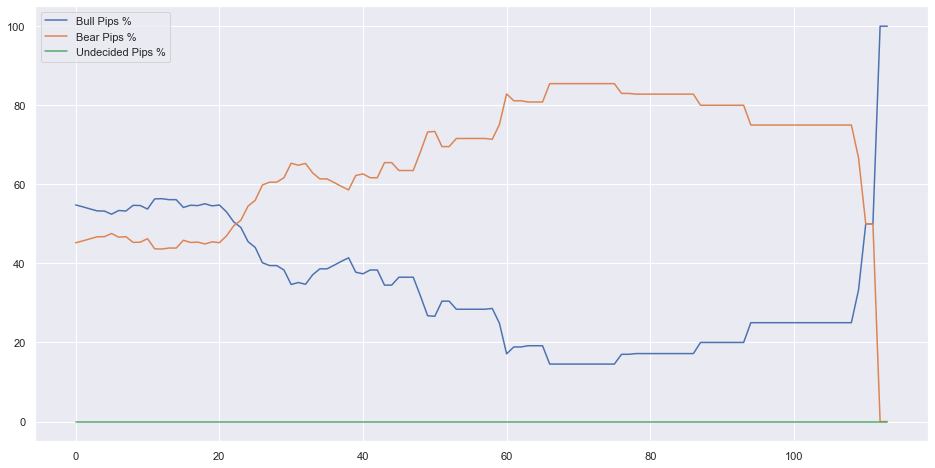

In [84]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_lw_100_100[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the chart above we can see that the Bull Pips % decrease with pips increase, and the Bear Pips % increases with pips increase, the percentage of Undecided Pips increase with pip increase. The point with the best Bear pips % is around 60 pips where the Bear Pips % is about 60%, Pips range 60 to 80 gave very good result.

<AxesSubplot:ylabel='Signals'>

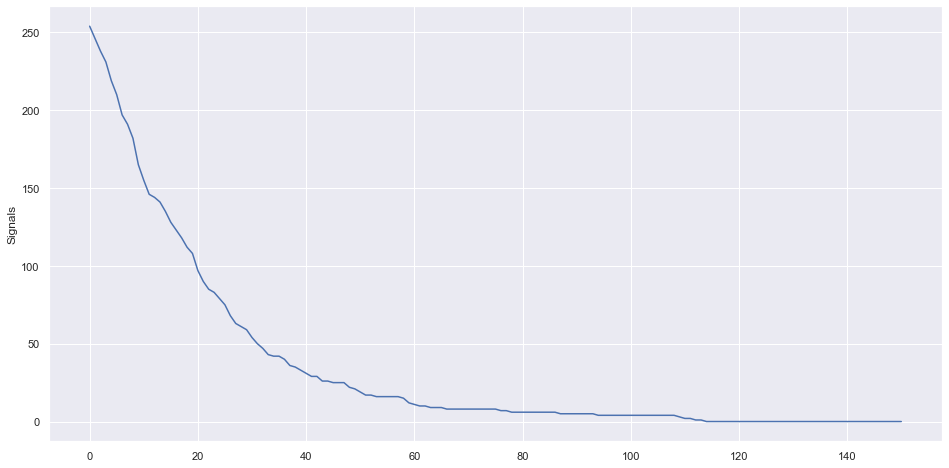

In [85]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_lw_100_100['Signals'], dashes=False)

<AxesSubplot:>

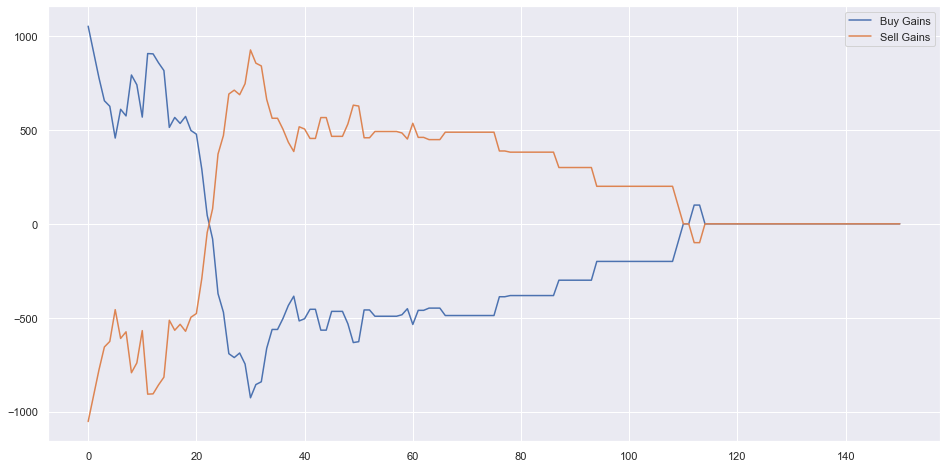

In [86]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_lw_100_100[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

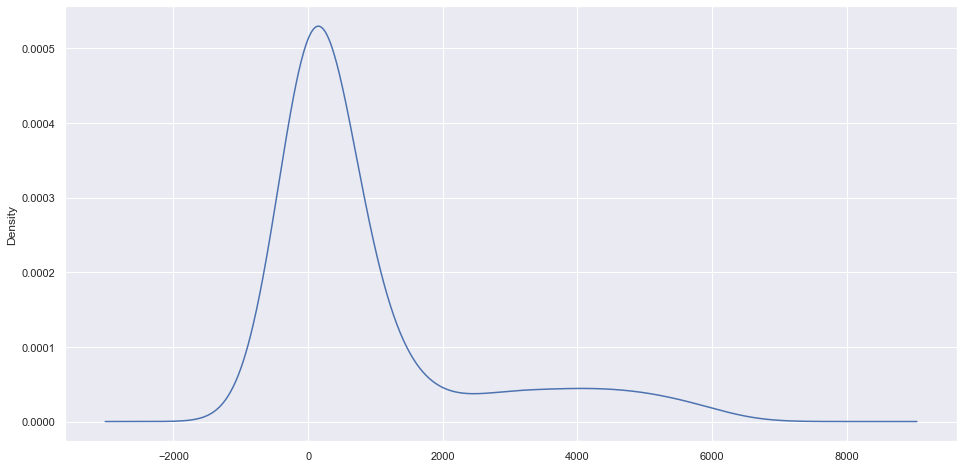

In [87]:
plt.figure(figsize=(16,8))
test_dataframe_lw_100_100['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

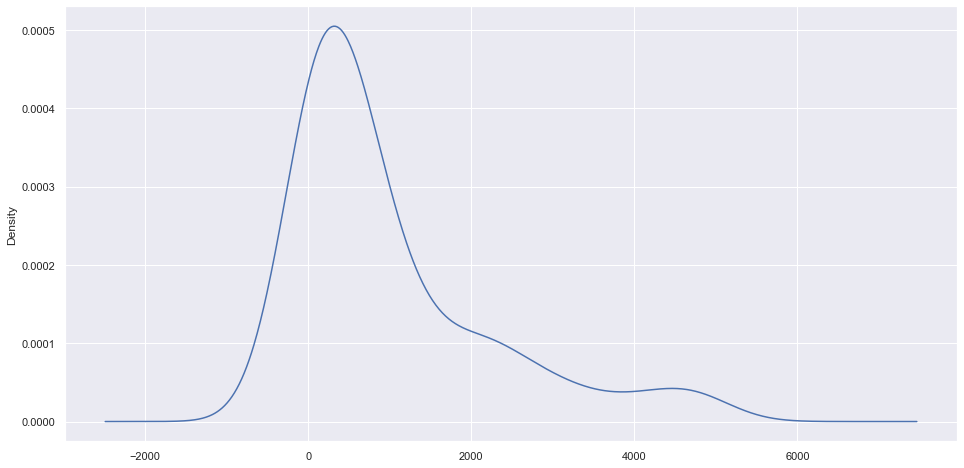

In [88]:
plt.figure(figsize=(16,8))
test_dataframe_lw_100_100['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

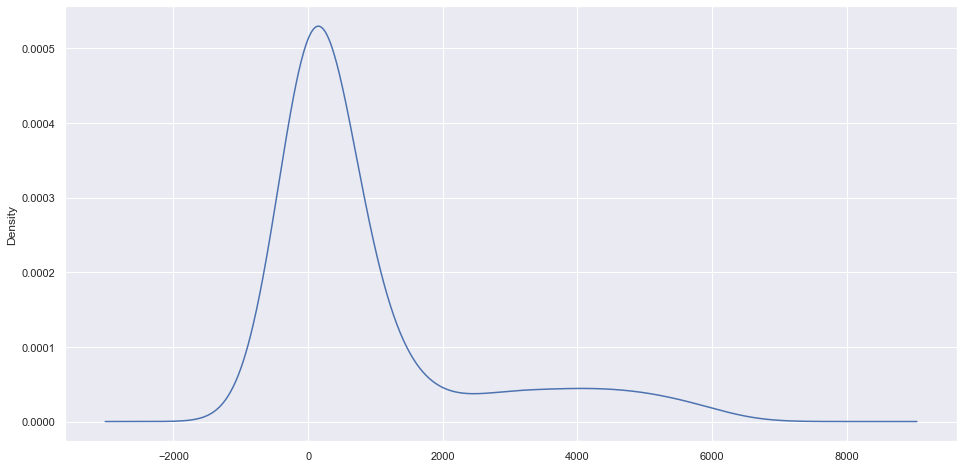

In [89]:
plt.figure(figsize=(16,8))
test_dataframe_lw_100_100['Bull Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

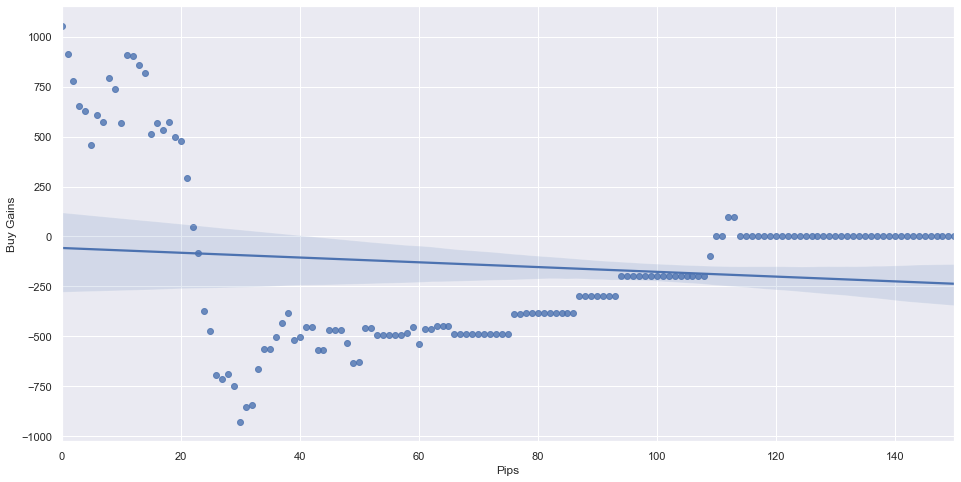

In [90]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_lw_100_100)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

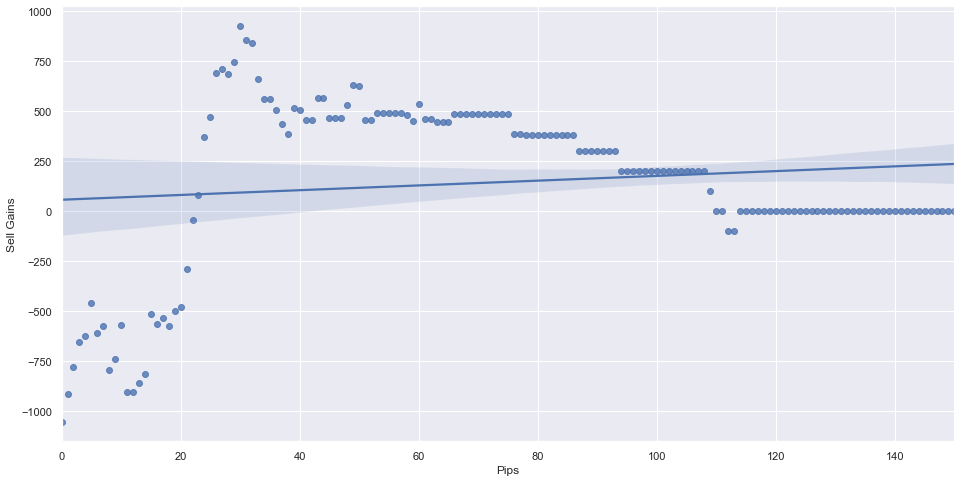

In [91]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_lw_100_100)

## Test For Abs Candle Body <a id="abs"></a>

### Test For Tp of 50 pips Sl of 50 pips <a id="abs_50"></a>

In [92]:
test_dataframe_abs_50_50 = analyze(50, 50, reduced_dataset, 'Abs Candle Body')
test_dataframe_abs_50_50

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    255.0        9.0    88.0    63.0     44.0     51.0         825.8   
1       1    250.0        9.0    85.0    62.0     43.0     51.0         809.7   
2       2    248.0        9.0    85.0    61.0     43.0     50.0         809.7   
3       3    246.0        9.0    84.0    61.0     43.0     49.0         809.7   
4       4    243.0        9.0    83.0    61.0     43.0     47.0         809.7   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
147   147      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
148   148      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
149   149      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
150   150      2.0        0.0     1.0     1.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          1009.5     25.0         -7.0            -183.7     5225.8   
1          1009.5     23.0         -8.0            -199.8     5059.7   
2          1004.8     24.0         -7.0            -195.1     5059.7   
3           993.3     23.0         -6.0            -183.6     5009.7   
4           939.5     22.0         -4.0            -129.8     4959.7   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0       50.0   
147           0.0      0.0          0.0               0.0       50.0   
148           0.0      0.0          0.0               0.0       50.0   
149           0.0      0.0          0.0               0.0       50.0   
150           0.0      0.0          0.0               0.0       50.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4159.5           450.0    53.133102    42.291542          4.575356   
1       4109.5           450.0    52.600008    42.721848          4.678144   
2       4054.8           450.0    52.900831    42.394270          4.704898   
3       4043.3           450.0    52.717037    42.547617          4.735347   
4       3989.5           450.0    52.767257    42.445102          4.787642   
..         ...             ...          ...          ...               ...   
146       50.0            50.0    33.333333    33.333333         33.333333   
147       50.0            50.0    33.333333    33.333333         33.333333   
148       50.0            50.0    33.333333    33.333333         33.333333   
149       50.0            50.0    33.333333    33.333333         33.333333   
150       50.0             0.0    50.000000    50.000000          0.000000   

     Buy Gains  Sell Gains  
0        616.3     -1516.3  
1        500.2     -1400.2  
2        554.9     -1454.9  
3        516.4     -1416.4  
4        520.2     -1420.2  
..         ...         ...  
146      -50.0       -50.0  
147      -50.0       -50.0  
148      -50.0       -50.0  
149      -50.0       -50.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [93]:
test_dataframe_abs_50_50.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   69.516556    4.066225   24.006623   20.218543   10.569536   
std     43.734045   76.240134    2.822927   25.645142   19.599284   13.235563   
min      0.000000    2.000000    0.000000    1.000000    1.000000    0.000000   
25%     37.500000    7.500000    1.000000    3.500000    2.000000    1.000000   
50%     75.000000   32.000000    4.000000   14.000000   11.000000    3.000000   
75%    112.500000  117.000000    6.000000   39.500000   35.000000   18.500000   
max    150.000000  255.000000    9.000000   88.000000   63.000000   44.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    10.655629    218.655629    218.837086    3.788079    -0.086093   
std     15.766651    245.101218    312.093998    7.427525     2.961847   
min      0.000000      0.000000      0.000000   -7.000000    -8.000000   
25%      0.000000     44.500000      0.000000    0.000000    -1.000000   
50%      0.000000     90.100000      0.000000    1.000000     1.000000   
75%     18.000000    367.250000    444.950000    4.500000     1.500000   
max     51.000000    825.800000   1009.500000   25.000000     5.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean          -0.181457  1418.986755  1229.764238      203.311258   
std           75.411203  1525.429729  1282.260419      141.146363   
min         -199.800000    50.000000    50.000000        0.000000   
25%          -63.750000   219.500000   100.000000       50.000000   
50%           44.500000   790.100000   550.000000      200.000000   
75%           44.500000  2342.250000  2194.950000      300.000000   
max           97.400000  5225.800000  4159.500000      450.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains   Sell Gains  
count   151.000000   151.000000        151.000000  151.000000   151.000000  
mean     50.777937    37.253289         11.968774  -14.088742  -392.533775  
std       7.094525    10.201467          6.616134  265.842811   412.641046  
min      33.333333    16.977929          0.000000 -654.100000 -1516.300000  
25%      46.115617    30.837654          6.303761 -109.900000  -474.300000  
50%      51.286094    41.486639         10.415943   44.500000  -194.500000  
75%      55.116423    44.244301         15.902670   94.500000  -144.500000  
max      66.044143    51.999373         33.333333  657.600000   102.000000

<AxesSubplot:>

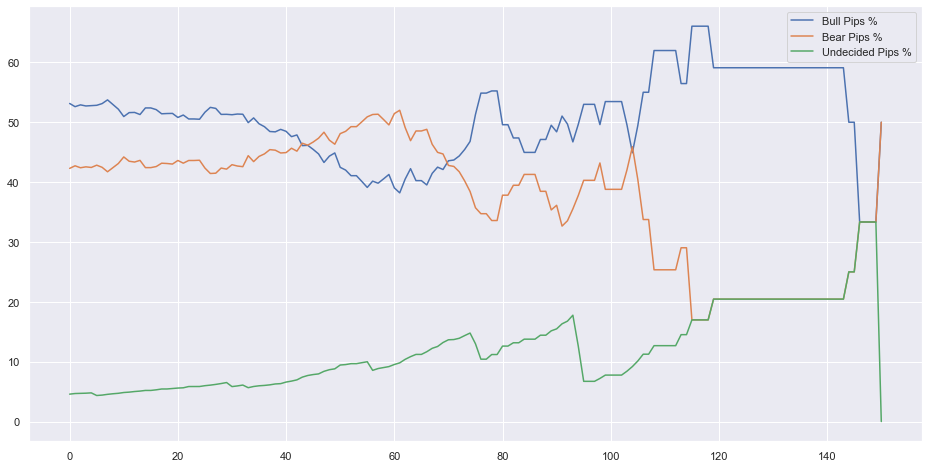

In [94]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_abs_50_50[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 43% and Undecided Pips %. At about 45 pips Bear Pips % went above Bull Pips %, Bull Pips % also went down. At 60 Pips, Bull Pips % and Bear Pips % where at their lowest and heighest Points respectively from there the started to reverse in movement

<AxesSubplot:ylabel='Signals'>

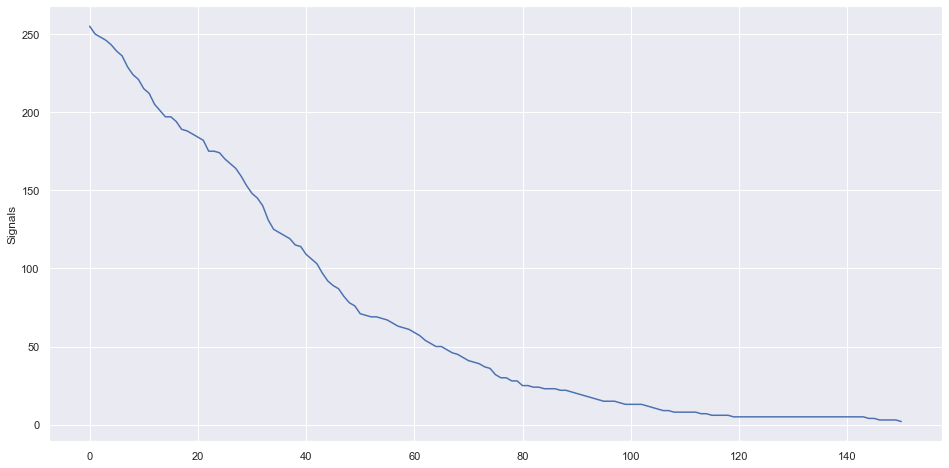

In [95]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_abs_50_50['Signals'], dashes=False)

<AxesSubplot:>

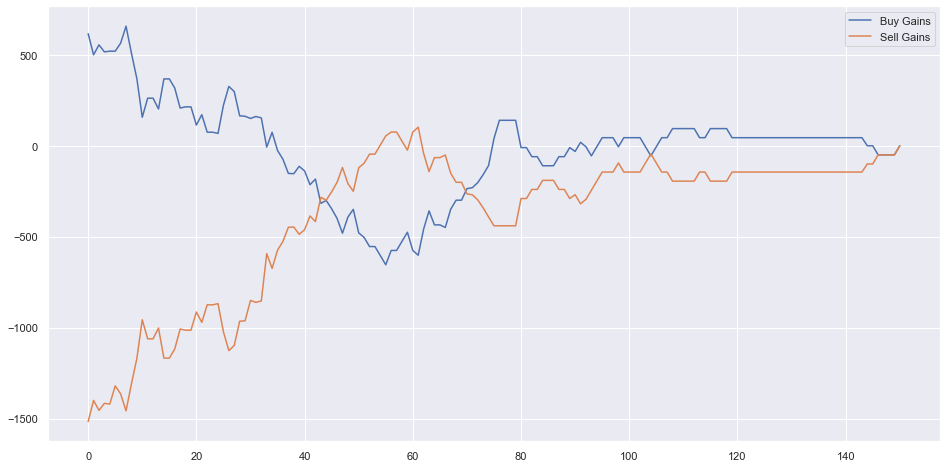

In [96]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_abs_50_50[['Buy Gains', 'Sell Gains']], dashes=False)

From the Plot above the Maximum Buy Gains of 700 pips occurred at about 5 pips, at 0 pips the minimum Sell Gains of about -1500 pips occurred, at about 145 pips both Buy Gains and Sell Gains are the same. From this plot my maximum profit when you buy and loss when you sell would be gotten from 0 to 10 pips

<AxesSubplot:ylabel='Density'>

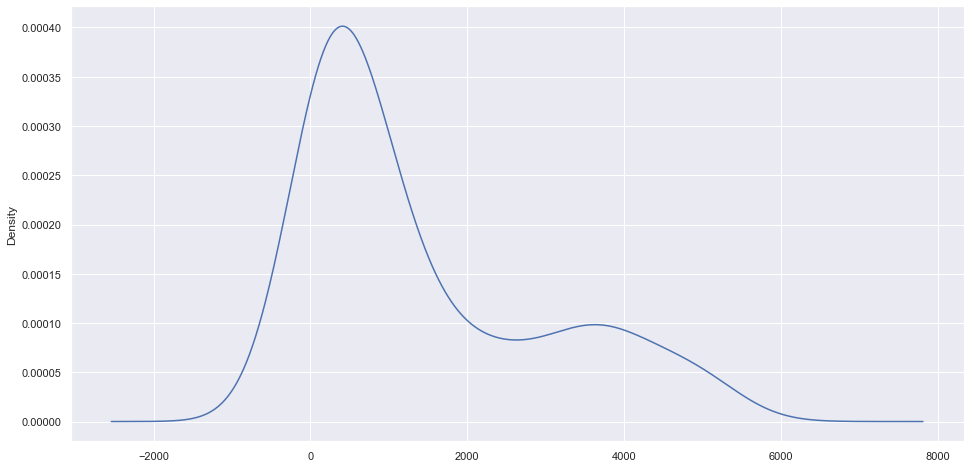

In [97]:
plt.figure(figsize=(16,8))
test_dataframe_abs_50_50['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

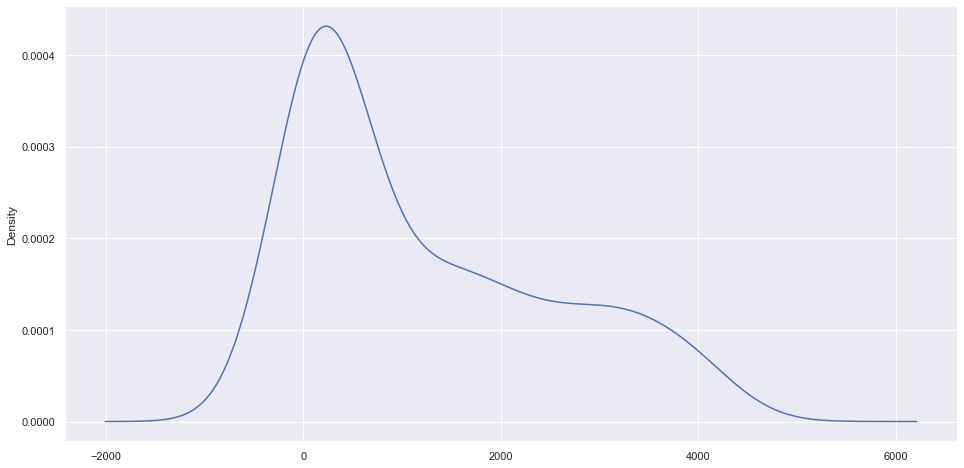

In [98]:
plt.figure(figsize=(16,8))
test_dataframe_abs_50_50['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

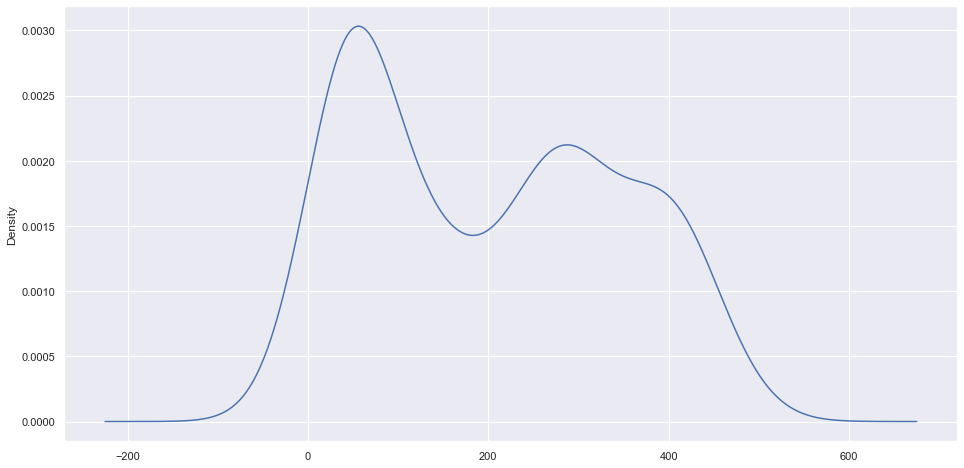

In [99]:
plt.figure(figsize=(16,8))
test_dataframe_abs_50_50['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

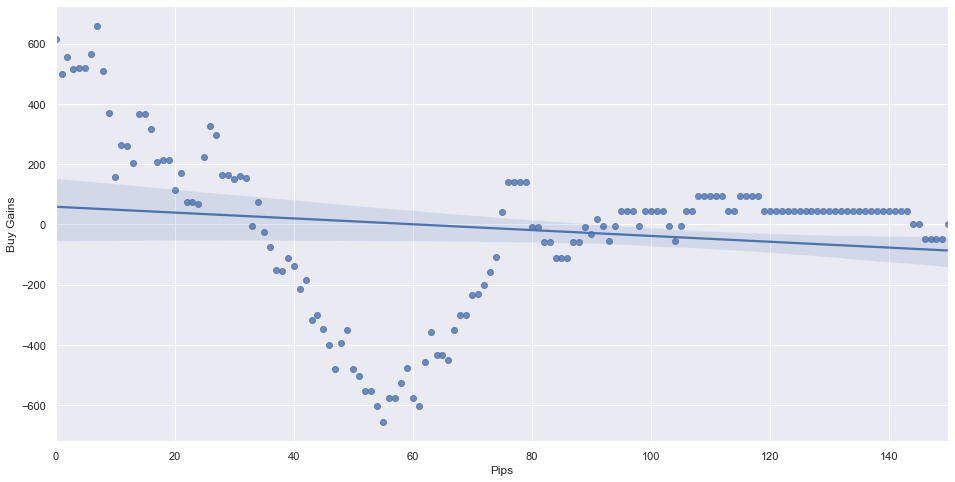

In [100]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_abs_50_50)

The Regression Plot has a very weak negative correlation with a weak confidence

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

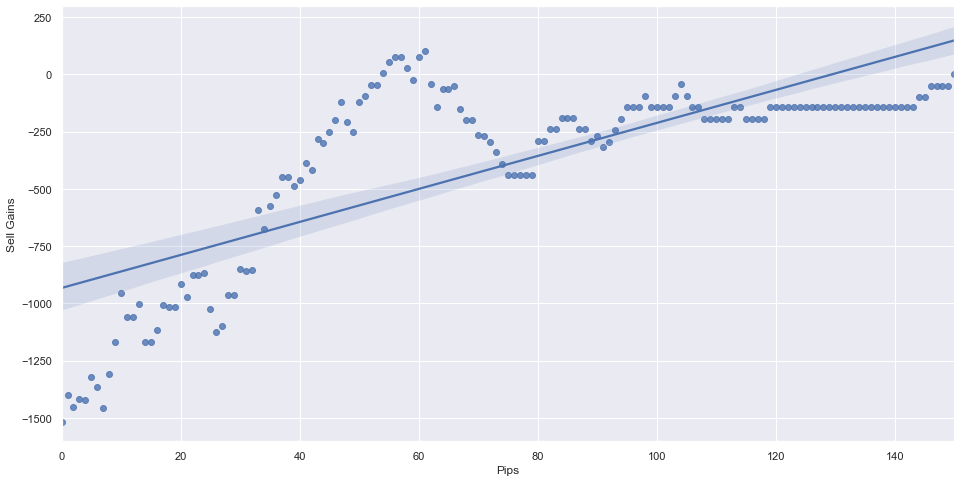

In [101]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_abs_50_50)

The Regression Plot has a positive correlation with confidence level decreasing from below 40 Pips

## Test for Tp of 75pips and Sl of 75pips <a id="abs_75"></a>

In [102]:
test_dataframe_abs_75_75 = analyze(75, 75, reduced_dataset, 'Abs Candle Body')
test_dataframe_abs_75_75

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    255.0        1.0    46.0    34.0     83.0     91.0        2359.4   
1       1    250.0        1.0    44.0    34.0     81.0     90.0        2316.9   
2       2    248.0        1.0    44.0    34.0     81.0     88.0        2316.9   
3       3    246.0        1.0    43.0    34.0     81.0     87.0        2316.9   
4       4    243.0        1.0    43.0    34.0     80.0     85.0        2270.1   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
147   147      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
148   148      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
149   149      3.0        1.0     1.0     1.0      0.0      0.0           0.0   
150   150      2.0        0.0     1.0     1.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          2265.4     12.0         -8.0              94.0     5809.4   
1          2253.5     10.0         -9.0              63.4     5616.9   
2          2212.1     10.0         -7.0             104.8     5616.9   
3          2200.6      9.0         -6.0             116.3     5541.9   
4          2146.8      9.0         -5.0             123.3     5495.1   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          0.0               0.0       75.0   
147           0.0      0.0          0.0               0.0       75.0   
148           0.0      0.0          0.0               0.0       75.0   
149           0.0      0.0          0.0               0.0       75.0   
150           0.0      0.0          0.0               0.0       75.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4815.4            75.0    54.294473    45.004580          0.700948   
1       4803.5            75.0    53.517732    45.767670          0.714599   
2       4762.1            75.0    53.729673    45.552898          0.717429   
3       4750.6            75.0    53.454545    45.822040          0.723415   
4       4696.8            75.0    53.522485    45.747012          0.730503   
..         ...             ...          ...          ...               ...   
146       75.0            75.0    33.333333    33.333333         33.333333   
147       75.0            75.0    33.333333    33.333333         33.333333   
148       75.0            75.0    33.333333    33.333333         33.333333   
149       75.0            75.0    33.333333    33.333333         33.333333   
150       75.0             0.0    50.000000    50.000000          0.000000   

     Buy Gains  Sell Gains  
0        919.0     -1069.0  
1        738.4      -888.4  
2        779.8      -929.8  
3        716.3      -866.3  
4        723.3      -873.3  
..         ...         ...  
146      -75.0       -75.0  
147      -75.0       -75.0  
148      -75.0       -75.0  
149      -75.0       -75.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [103]:
plt.figure(figsize=(16,8))
test_dataframe_abs_75_75.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   69.516556    0.993377   12.245033   12.602649   22.139073   
std     43.734045   76.240134    0.081379   13.377078   11.073740   24.926837   
min      0.000000    2.000000    0.000000    1.000000    1.000000    0.000000   
25%     37.500000    7.500000    1.000000    2.000000    2.000000    2.500000   
50%     75.000000   32.000000    1.000000    6.000000    7.000000   12.000000   
75%    112.500000  117.000000    1.000000   16.500000   22.000000   41.500000   
max    150.000000  255.000000    1.000000   46.000000   34.000000   83.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    21.536424    623.292053    582.695364   -0.357616     0.602649   
std     27.471385    688.730232    695.000210    5.086380     3.857598   
min      0.000000      0.000000      0.000000  -10.000000   -11.000000   
25%      0.000000     77.600000      0.000000   -4.000000    -1.000000   
50%      6.000000    393.000000    198.600000    0.000000     1.000000   
75%     36.000000   1155.450000   1034.050000    1.000000     3.000000   
max     91.000000   2359.400000   2265.400000   12.000000     8.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean          40.596689  1541.669536  1527.894040       74.503311   
std           72.559052  1686.653712  1510.964981        6.103413   
min         -131.300000    75.000000    75.000000        0.000000   
25%            0.000000   227.600000   150.000000       75.000000   
50%           44.500000   843.000000   723.600000       75.000000   
75%           81.200000  2392.950000  2684.050000       75.000000   
max          201.700000  5809.400000  4815.400000       75.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains   Sell Gains  
count   151.000000   151.000000        151.000000  151.000000   151.000000  
mean     48.214888    43.075781          8.709331  -60.727815   -88.278808  
std       6.791508    12.727952          9.039221  379.898725   379.934984  
min      33.333333    20.053476          0.000000 -878.400000 -1069.000000  
25%      43.079316    33.333333          1.422300 -234.700000  -194.500000  
50%      49.895431    46.352297          4.015419   -1.000000  -146.700000  
75%      53.180991    51.966378         16.440158   44.500000    84.700000  
max      59.893048    62.643199         33.333333  919.000000   728.400000

<Figure size 1152x576 with 0 Axes>

<AxesSubplot:>

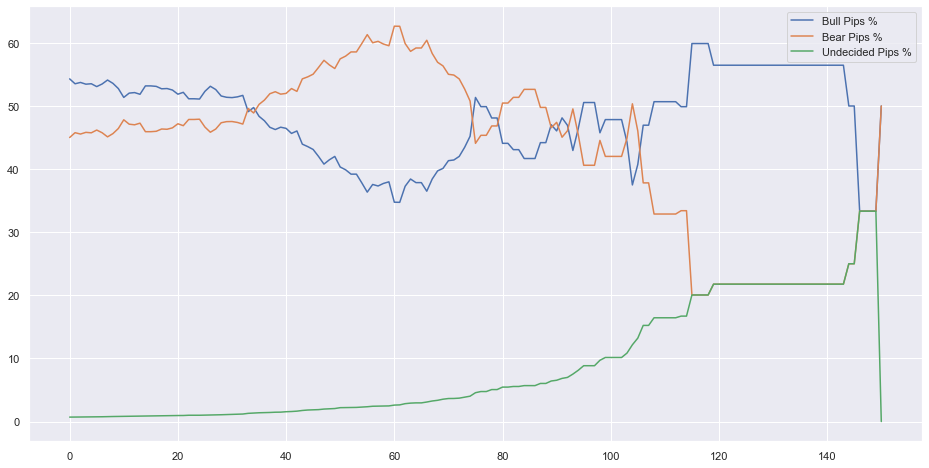

In [104]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_abs_75_75[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 45% and Undecided Pips % at 2%. At about 35 pips Bear Pips % went above Bull Pips %, Bull Pips % also went down. At 60 Pips, Bull Pips % and Bear Pips % where at their lowest and heighest Points respectively from there they started to reverse in movement

<AxesSubplot:ylabel='Signals'>

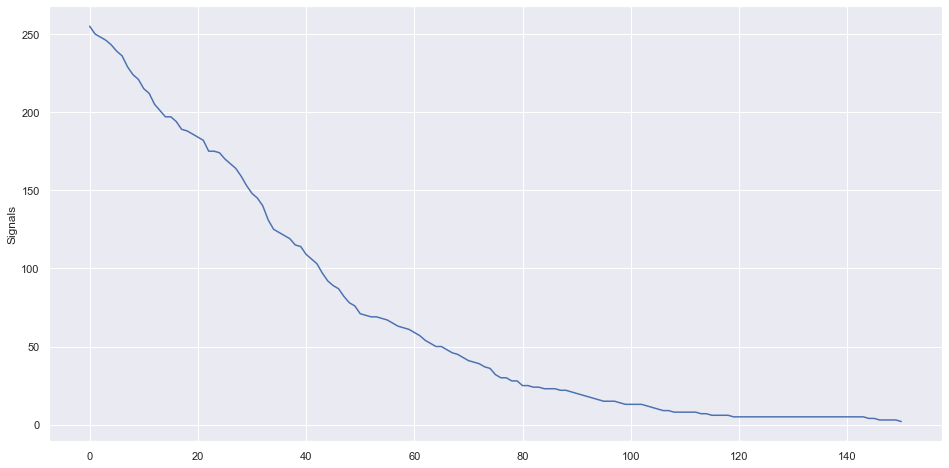

In [105]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_abs_75_75['Signals'], dashes=False)

<AxesSubplot:>

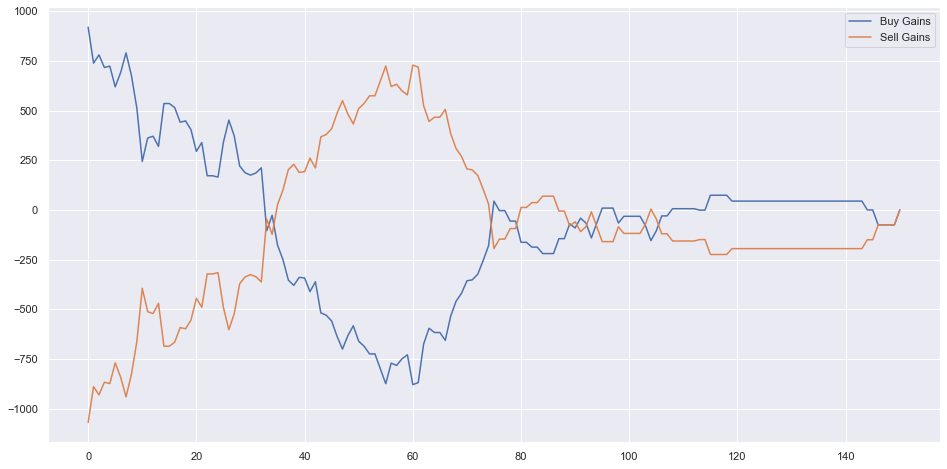

In [106]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_abs_75_75[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

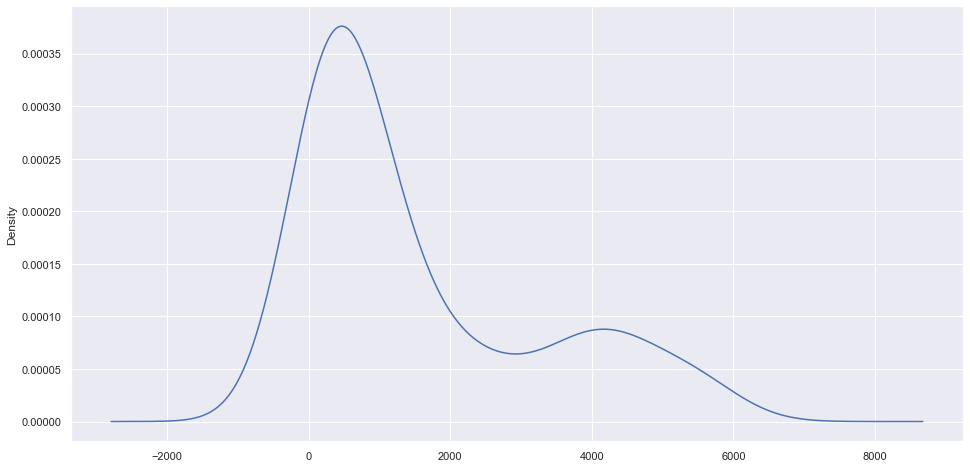

In [107]:
plt.figure(figsize=(16,8))
test_dataframe_abs_75_75['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

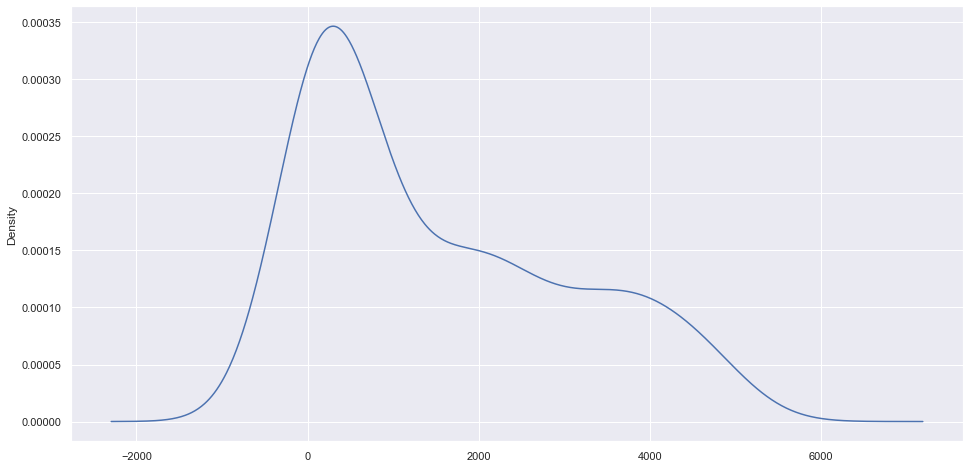

In [108]:
plt.figure(figsize=(16,8))
test_dataframe_abs_75_75['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

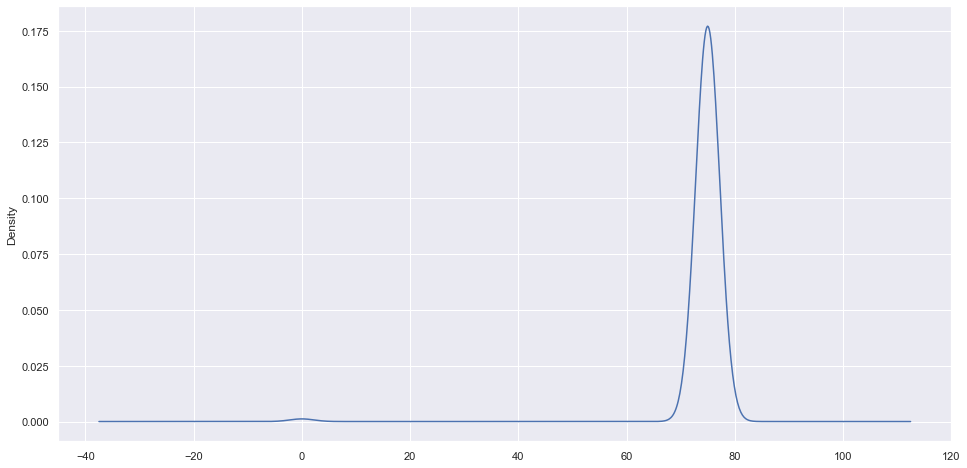

In [109]:
plt.figure(figsize=(16,8))
test_dataframe_abs_75_75['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

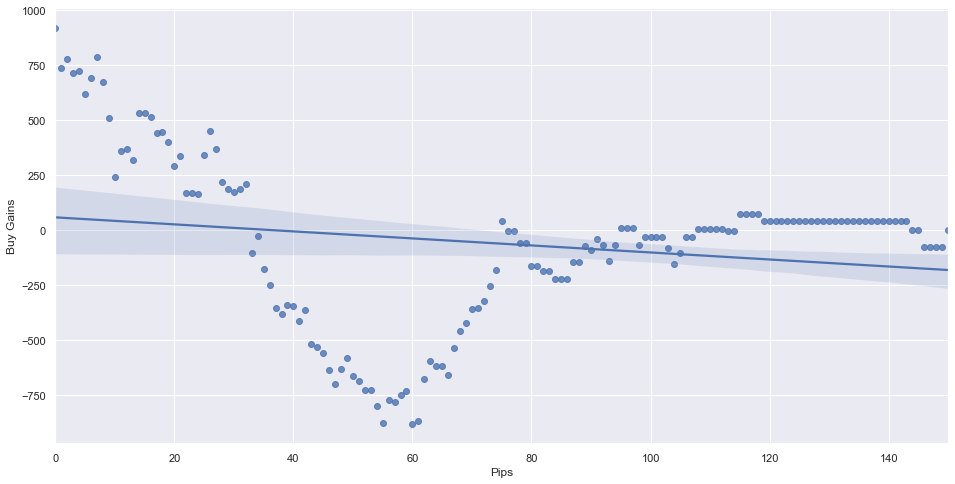

In [110]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_abs_75_75)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

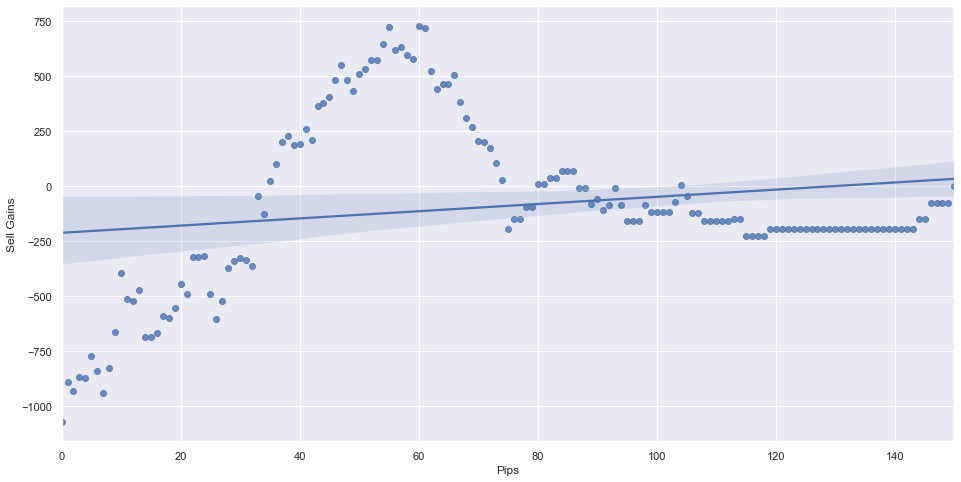

In [111]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_abs_75_75)

### Test for Tp 100 pips and Sl 100 pips <a id="abs_100"></a>

In [112]:
test_dataframe_abs_100_100 = analyze(100, 100, reduced_dataset, 'Abs Candle Body')
test_dataframe_abs_100_100

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    255.0        0.0    22.0    17.0    109.0    107.0        3915.0   
1       1    250.0        0.0    20.0    17.0    107.0    106.0        3872.5   
2       2    248.0        0.0    20.0    17.0    107.0    104.0        3872.5   
3       3    246.0        0.0    20.0    17.0    106.0    103.0        3829.2   
4       4    243.0        0.0    20.0    17.0    105.0    101.0        3782.4   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      3.0        0.0     2.0     1.0      0.0      0.0           0.0   
147   147      3.0        0.0     2.0     1.0      0.0      0.0           0.0   
148   148      3.0        0.0     2.0     1.0      0.0      0.0           0.0   
149   149      3.0        0.0     2.0     1.0      0.0      0.0           0.0   
150   150      2.0        0.0     1.0     1.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          3245.5      5.0          2.0             669.5     6115.0   
1          3233.6      3.0          1.0             638.9     5872.5   
2          3192.2      3.0          3.0             680.3     5872.5   
3          3180.7      3.0          3.0             648.5     5829.2   
4          3126.9      3.0          4.0             655.5     5782.4   
..            ...      ...          ...               ...        ...   
146           0.0      1.0          0.0               0.0      200.0   
147           0.0      1.0          0.0               0.0      200.0   
148           0.0      1.0          0.0               0.0      200.0   
149           0.0      1.0          0.0               0.0      200.0   
150           0.0      0.0          0.0               0.0      100.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4945.5             0.0    55.286832    44.713168               0.0   
1       4933.6             0.0    54.344306    45.655694               0.0   
2       4892.2             0.0    54.553308    45.446692               0.0   
3       4880.7             0.0    54.428146    45.571854               0.0   
4       4826.9             0.0    54.503125    45.496875               0.0   
..         ...             ...          ...          ...               ...   
146      100.0             0.0    66.666667    33.333333               0.0   
147      100.0             0.0    66.666667    33.333333               0.0   
148      100.0             0.0    66.666667    33.333333               0.0   
149      100.0             0.0    66.666667    33.333333               0.0   
150      100.0             0.0    50.000000    50.000000               0.0   

     Buy Gains  Sell Gains  
0       1169.5     -1169.5  
1        938.9      -938.9  
2        980.3      -980.3  
3        948.5      -948.5  
4        955.5      -955.5  
..         ...         ...  
146      100.0      -100.0  
147      100.0      -100.0  
148      100.0      -100.0  
149      100.0      -100.0  
150        0.0         0.0  

[151 rows x 20 columns]

In [113]:
test_dataframe_abs_100_100.describe()

Pips     Signals  Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000      151.0  151.000000  151.000000  151.000000   
mean    75.000000   69.516556        0.0    7.218543    6.973510   27.490066   
std     43.734045   76.240134        0.0    6.054083    5.228061   32.738533   
min      0.000000    2.000000        0.0    1.000000    1.000000    0.000000   
25%     37.500000    7.500000        0.0    2.000000    2.000000    2.500000   
50%     75.000000   32.000000        0.0    4.000000    5.000000   14.000000   
75%    112.500000  117.000000        0.0   10.500000   11.000000   47.500000   
max    150.000000  255.000000        0.0   22.000000   17.000000  109.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    27.834437    934.456954    933.715232    0.245033    -0.344371   
std     32.793583   1166.764783   1038.228871    2.513873     2.861343   
min      0.000000      0.000000      0.000000   -6.000000    -9.000000   
25%      1.000000     77.600000     29.800000   -1.000000    -1.000000   
50%      9.000000    480.800000    329.400000    1.000000     0.000000   
75%     48.000000   1463.450000   1734.250000    1.000000     1.000000   
max    107.000000   3915.000000   3245.500000    5.000000     5.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000           151.0   
mean           0.741722  1656.311258  1631.066225             0.0   
std          235.035460  1765.688673  1536.448786             0.0   
min         -472.700000   100.000000   100.000000             0.0   
25%          -76.400000   277.600000   229.800000             0.0   
50%           14.700000   880.800000   829.400000             0.0   
75%           54.400000  2513.450000  2834.250000             0.0   
max          680.300000  6115.000000  4945.500000             0.0   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   151.000000   151.000000             151.0   151.000000   151.000000  
mean     52.326215    47.673785               0.0    25.245033   -25.245033  
std       9.029944     9.029944               0.0   452.886881   452.886881  
min      34.807966    32.144626               0.0  -927.000000 -1169.500000  
25%      45.315615    43.519623               0.0  -188.500000  -137.200000  
50%      52.762129    47.237871               0.0    51.400000   -51.400000  
75%      56.480377    54.684385               0.0   137.200000   188.500000  
max      67.855374    65.192034               0.0  1169.500000   927.000000

<AxesSubplot:>

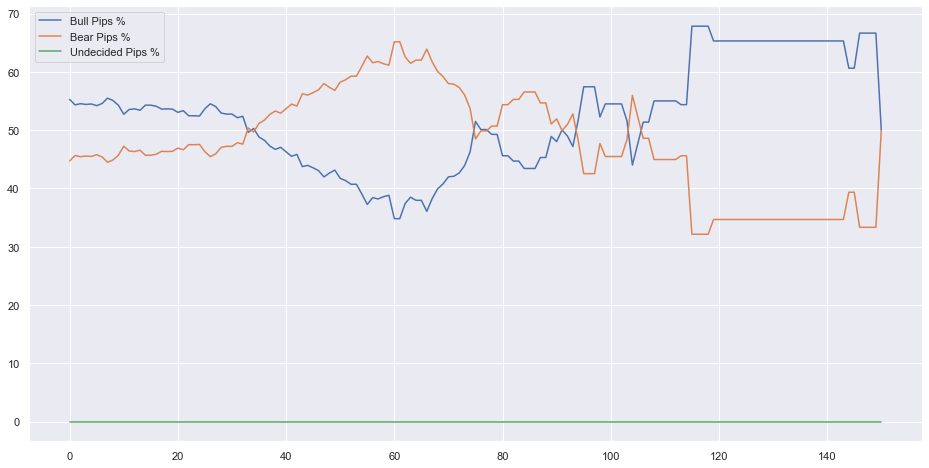

In [114]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_abs_100_100[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 43% and Undecided Pips %. At about 45 pips Bear Pips % went above Bull Pips %, Bull Pips % also went down. At 60 Pips, Bull Pips % and Bear Pips % where at their lowest and heighest Points respectively from there to 110 Pips they move in no direction, them they started to reverse in movement

<AxesSubplot:ylabel='Signals'>

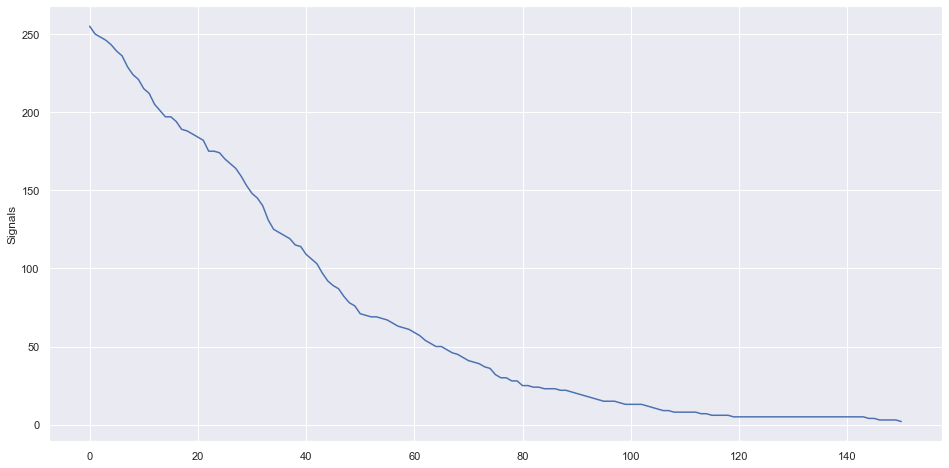

In [115]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_abs_100_100['Signals'], dashes=False)

<AxesSubplot:>

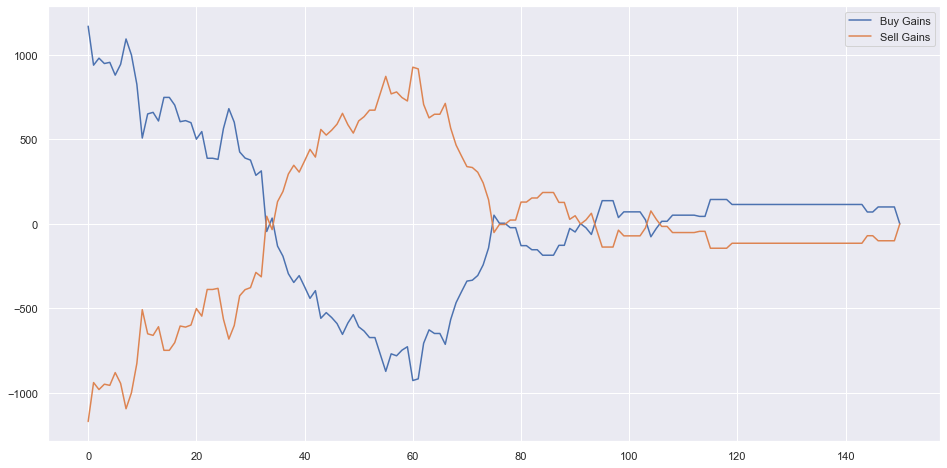

In [116]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_abs_100_100[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

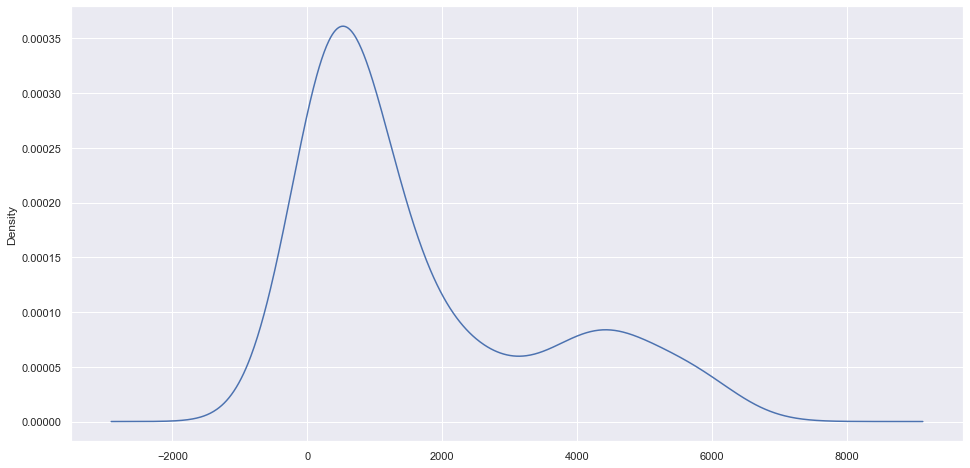

In [117]:
plt.figure(figsize=(16,8))
test_dataframe_abs_100_100['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

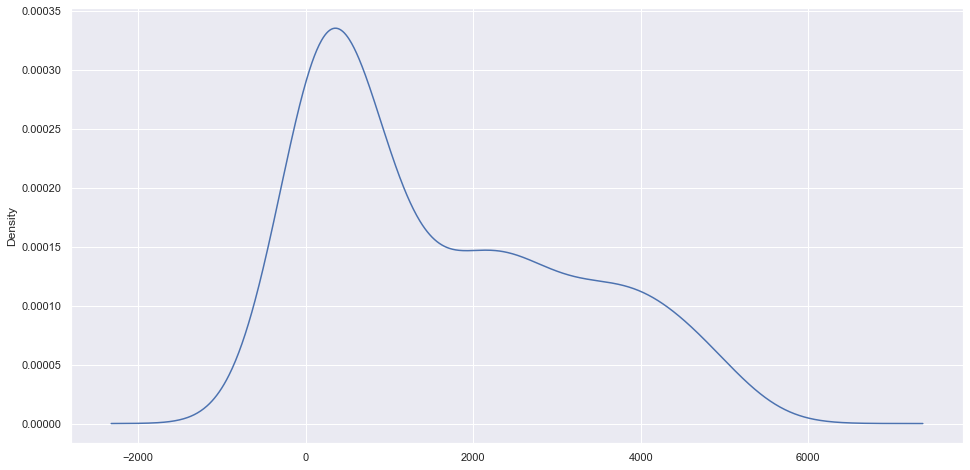

In [118]:
plt.figure(figsize=(16,8))
test_dataframe_abs_100_100['Bear Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

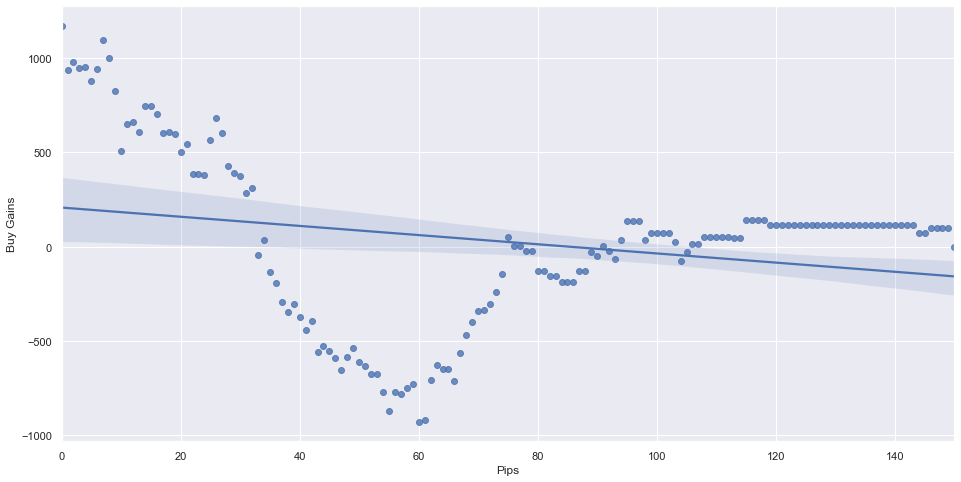

In [119]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_abs_100_100)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

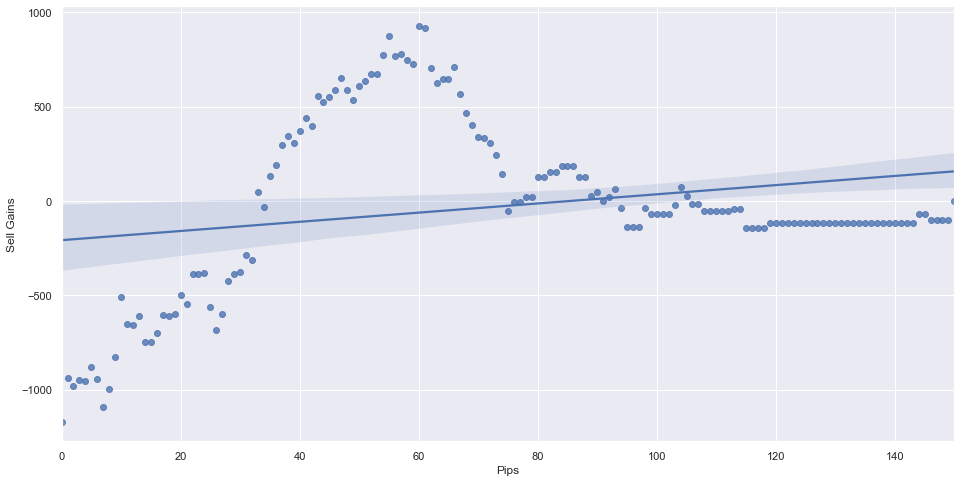

In [120]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_abs_100_100)

## Test For High Low <a id="hl"></a>

### Test for Tp 50 pips and Sl 50 pips <a id="hl_50"></a>

In [121]:
test_dataframe_hl_50_50 = analyze(50, 50, reduced_dataset, 'High Low')
test_dataframe_hl_50_50

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    257.0       10.0    88.0    64.0     44.0     51.0         825.8   
1       1    257.0       10.0    88.0    64.0     44.0     51.0         825.8   
2       2    257.0       10.0    88.0    64.0     44.0     51.0         825.8   
3       3    257.0       10.0    88.0    64.0     44.0     51.0         825.8   
4       4    257.0       10.0    88.0    64.0     44.0     51.0         825.8   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146     20.0        4.0     7.0     8.0      1.0      0.0          44.5   
147   147     20.0        4.0     7.0     8.0      1.0      0.0          44.5   
148   148     18.0        4.0     7.0     6.0      1.0      0.0          44.5   
149   149     17.0        4.0     6.0     6.0      1.0      0.0          44.5   
150   150     16.0        4.0     5.0     6.0      1.0      0.0          44.5   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          1009.5     24.0         -7.0            -183.7     5225.8   
1          1009.5     24.0         -7.0            -183.7     5225.8   
2          1009.5     24.0         -7.0            -183.7     5225.8   
3          1009.5     24.0         -7.0            -183.7     5225.8   
4          1009.5     24.0         -7.0            -183.7     5225.8   
..            ...      ...          ...               ...        ...   
146           0.0     -1.0          1.0              44.5      394.5   
147           0.0     -1.0          1.0              44.5      394.5   
148           0.0      1.0          1.0              44.5      394.5   
149           0.0      0.0          1.0              44.5      344.5   
150           0.0     -1.0          1.0              44.5      294.5   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4209.5           500.0    52.598311    42.369128          5.032561   
1       4209.5           500.0    52.598311    42.369128          5.032561   
2       4209.5           500.0    52.598311    42.369128          5.032561   
3       4209.5           500.0    52.598311    42.369128          5.032561   
4       4209.5           500.0    52.598311    42.369128          5.032561   
..         ...             ...          ...          ...               ...   
146      400.0           200.0    39.668175    40.221217         20.110608   
147      400.0           200.0    39.668175    40.221217         20.110608   
148      300.0           200.0    44.102851    33.538290         22.358860   
149      300.0           200.0    40.793369    35.523979         23.682652   
150      300.0           200.0    37.067338    37.759597         25.173065   

     Buy Gains  Sell Gains  
0        516.3     -1516.3  
1        516.3     -1516.3  
2        516.3     -1516.3  
3        516.3     -1516.3  
4        516.3     -1516.3  
..         ...         ...  
146     -205.5      -194.5  
147     -205.5      -194.5  
148     -105.5      -294.5  
149     -155.5      -244.5  
150     -205.5      -194.5  

[151 rows x 20 columns]

In [122]:
test_dataframe_hl_50_50.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000  139.907285    7.682119   50.754967   39.894040   20.410596   
std     43.734045   90.472637    2.301799   30.998057   20.235662   17.333310   
min      0.000000   16.000000    4.000000    5.000000    6.000000    1.000000   
25%     37.500000   50.000000    6.000000   19.000000   21.000000    3.000000   
50%     75.000000  131.000000    8.000000   51.000000   42.000000   15.000000   
75%    112.500000  240.000000   10.000000   85.000000   61.000000   40.500000   
max    150.000000  257.000000   10.000000   88.000000   64.000000   44.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    21.165563    407.309934    416.494702   10.860927    -0.754967   
std     20.438666    321.596387    397.264458   10.981827     3.558964   
min      0.000000     44.500000      0.000000   -4.000000    -7.000000   
25%      1.000000     70.100000      6.300000   -1.000000    -3.500000   
50%     15.000000    345.600000    312.300000   10.000000     1.000000   
75%     43.500000    779.600000    849.550000   24.000000     2.000000   
max     51.000000    825.800000   1009.500000   26.000000     4.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean          -9.184768  2945.058278  2411.196689      384.105960   
std           93.459276  1868.411423  1396.667130      115.089945   
min         -183.700000   294.500000   300.000000      200.000000   
25%          -75.750000  1020.100000  1056.300000      300.000000   
50%           39.700000  2895.600000  2412.300000      400.000000   
75%           45.100000  5029.600000  3899.550000      500.000000   
max          150.700000  5225.800000  4209.500000      500.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains   Sell Gains  
count   151.000000   151.000000        151.000000  151.000000   151.000000  
mean     48.649164    42.356235          8.994601  149.755629  -917.967550  
std       4.928406     1.938969          4.488430  385.525484   592.254315  
min      37.067338    33.538290          5.032561 -404.900000 -1683.500000  
25%      44.373400    41.376245          5.302742 -205.500000 -1516.300000  
50%      51.274304    42.335888          7.007831  137.500000  -937.500000  
75%      52.831219    43.531803         11.618563  516.300000  -293.250000  
max      55.010919    48.459675         25.173065  711.300000   -44.500000

<AxesSubplot:>

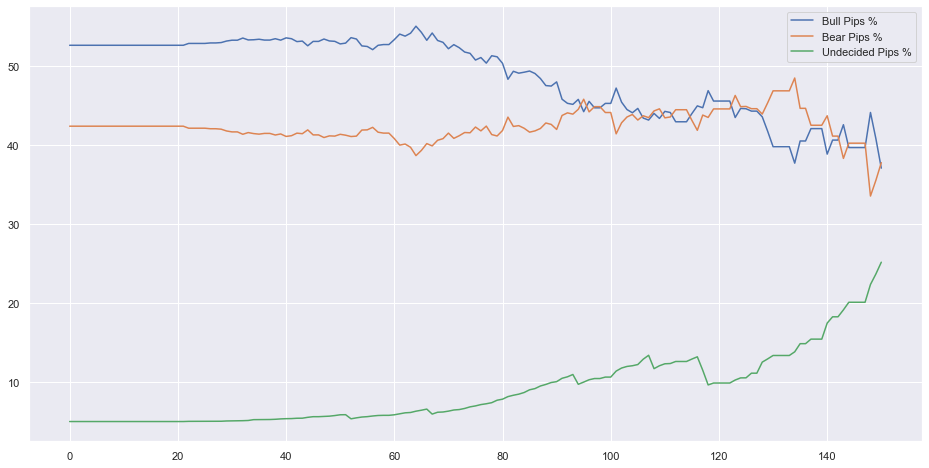

In [123]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_50_50[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 43% and Undecided Pips % Increased with time Bull Pips % tend to decrease with time. At 60 Pips, Bull Pips % and Bear Pips % where at their lowest and heighest Points respectively at about 90 pips they meet and start to range

<AxesSubplot:ylabel='Signals'>

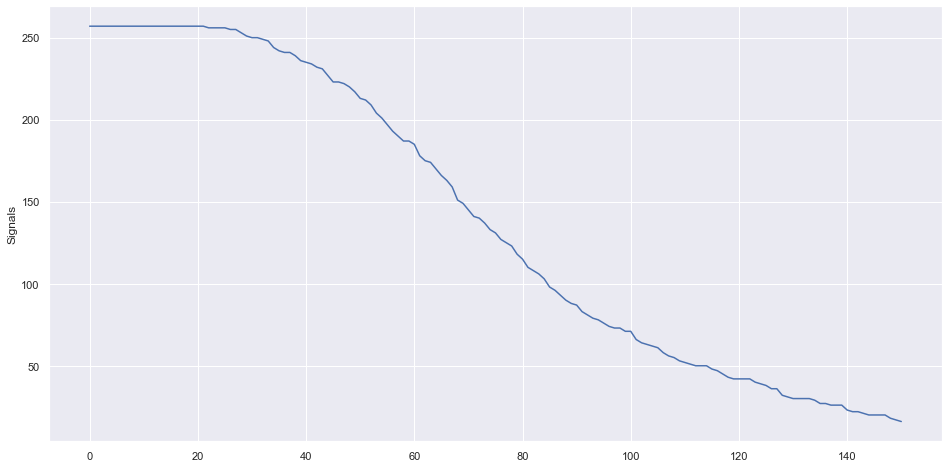

In [124]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_50_50['Signals'], dashes=False)

<AxesSubplot:>

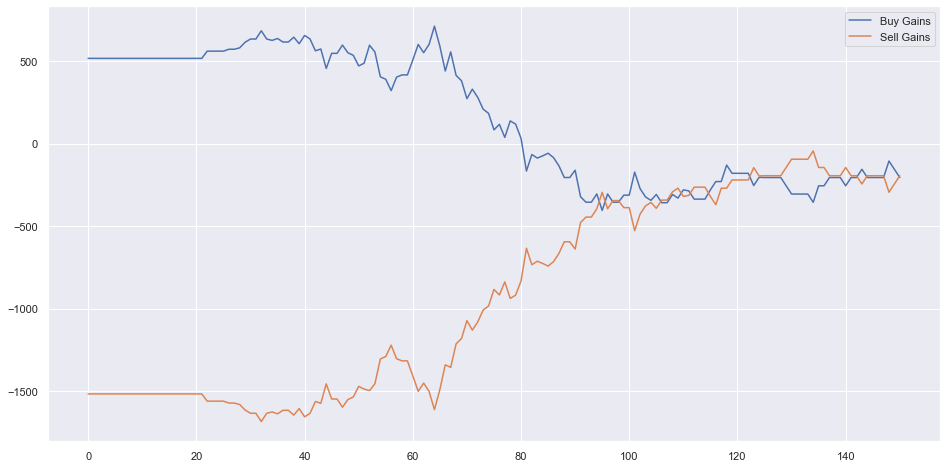

In [125]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_50_50[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

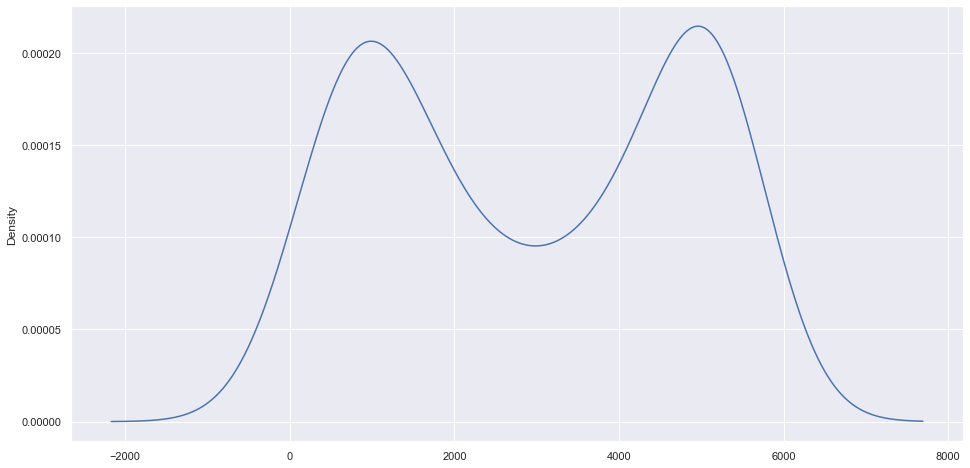

In [126]:
plt.figure(figsize=(16,8))
test_dataframe_hl_50_50['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

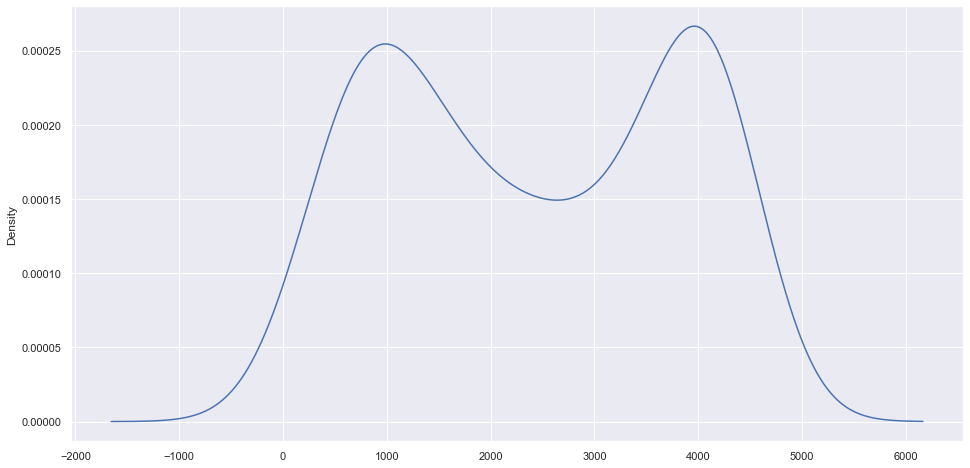

In [127]:
plt.figure(figsize=(16,8))
test_dataframe_hl_50_50['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

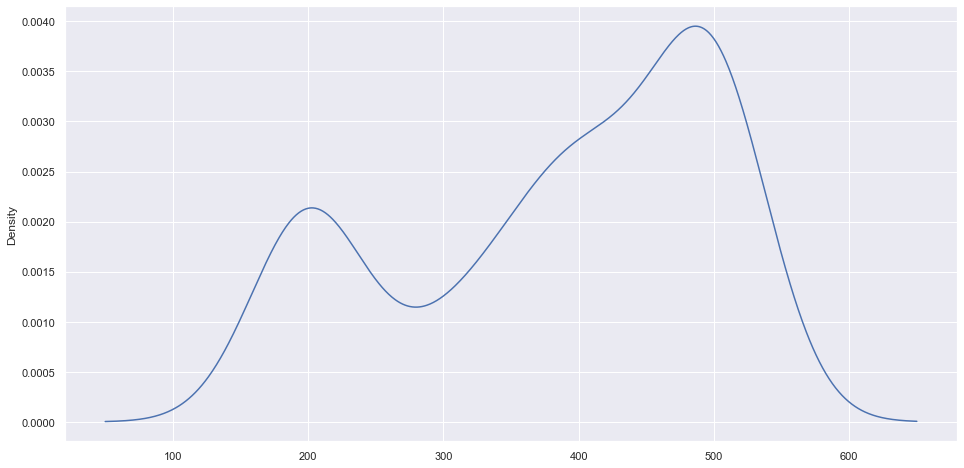

In [128]:
plt.figure(figsize=(16,8))
test_dataframe_hl_50_50['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

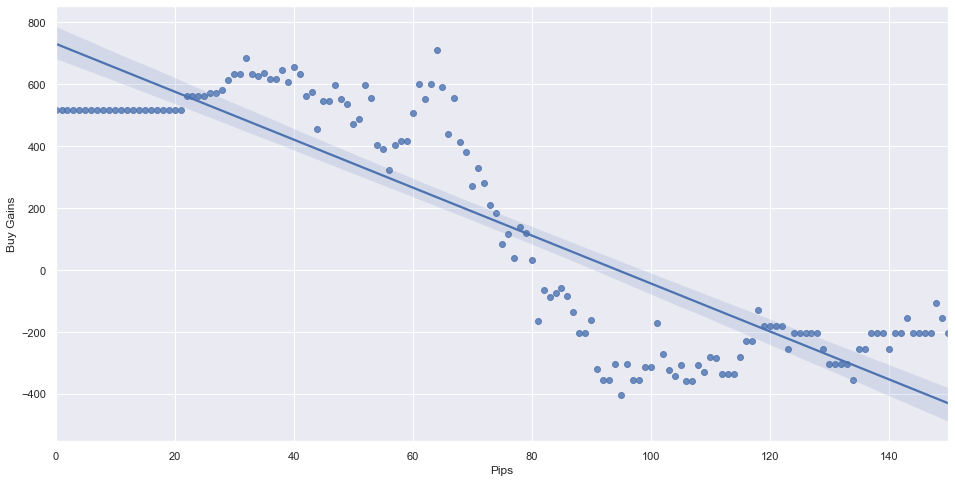

In [129]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_hl_50_50)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

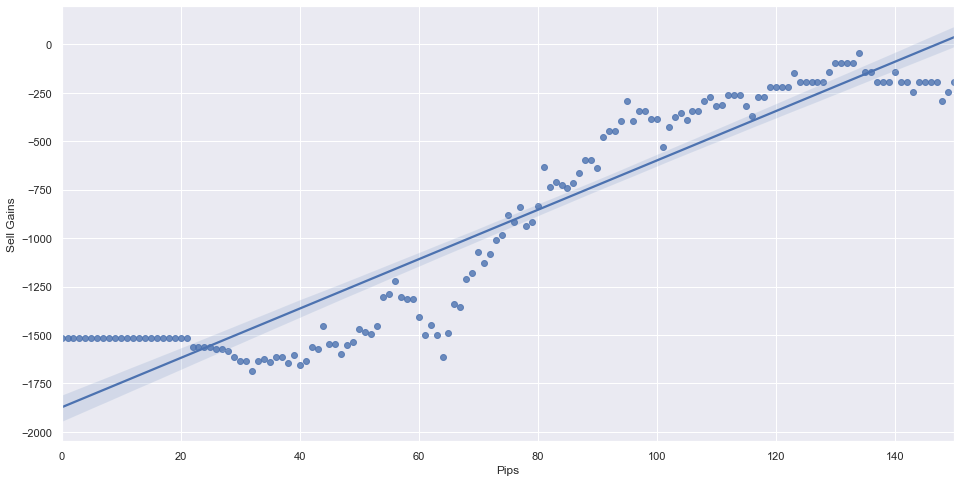

In [130]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_hl_50_50)

### Test for Tp 75 pips and Sl 75 pips <a id="hl_75"></a>

In [131]:
test_dataframe_hl_75_75 = analyze(75, 75, reduced_dataset, 'High Low')
test_dataframe_hl_75_75

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    257.0        1.0    46.0    34.0     84.0     92.0        2405.0   
1       1    257.0        1.0    46.0    34.0     84.0     92.0        2405.0   
2       2    257.0        1.0    46.0    34.0     84.0     92.0        2405.0   
3       3    257.0        1.0    46.0    34.0     84.0     92.0        2405.0   
4       4    257.0        1.0    46.0    34.0     84.0     92.0        2405.0   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146     20.0        1.0     7.0     8.0      2.0      2.0          91.9   
147   147     20.0        1.0     7.0     8.0      2.0      2.0          91.9   
148   148     18.0        1.0     7.0     7.0      2.0      1.0          91.9   
149   149     17.0        1.0     6.0     7.0      2.0      1.0          91.9   
150   150     16.0        1.0     6.0     7.0      1.0      1.0          44.5   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          2303.3     12.0         -8.0             101.7     5855.0   
1          2303.3     12.0         -8.0             101.7     5855.0   
2          2303.3     12.0         -8.0             101.7     5855.0   
3          2303.3     12.0         -8.0             101.7     5855.0   
4          2303.3     12.0         -8.0             101.7     5855.0   
..            ...      ...          ...               ...        ...   
146          57.3     -1.0          0.0              34.6      616.9   
147          57.3     -1.0          0.0              34.6      616.9   
148          49.3      0.0          1.0              42.6      616.9   
149          49.3     -1.0          1.0              42.6      541.9   
150          49.3     -1.0          0.0              -4.8      494.5   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4853.3            75.0    54.296922    45.007558          0.695520   
1       4853.3            75.0    54.296922    45.007558          0.695520   
2       4853.3            75.0    54.296922    45.007558          0.695520   
3       4853.3            75.0    54.296922    45.007558          0.695520   
4       4853.3            75.0    54.296922    45.007558          0.695520   
..         ...             ...          ...          ...               ...   
146      657.3            75.0    45.723392    48.717759          5.558850   
147      657.3            75.0    45.723392    48.717759          5.558850   
148      574.3            75.0    48.720581    45.356184          5.923235   
149      574.3            75.0    45.491941    48.211887          6.296172   
150      574.3            75.0    43.233083    50.209827          6.557090   

     Buy Gains  Sell Gains  
0        926.7     -1076.7  
1        926.7     -1076.7  
2        926.7     -1076.7  
3        926.7     -1076.7  
4        926.7     -1076.7  
..         ...         ...  
146     -115.4       -34.6  
147     -115.4       -34.6  
148      -32.4      -117.6  
149     -107.4       -42.6  
150     -154.8         4.8  

[151 rows x 20 columns]

In [132]:
test_dataframe_hl_75_75.describe()

Pips     Signals  Undecided     Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000      151.0  151.00000  151.000000  151.000000   
mean    75.000000  139.907285        1.0   27.92053   25.105960   42.602649   
std     43.734045   90.472637        0.0   14.77183    8.994926   32.428605   
min      0.000000   16.000000        1.0    6.00000    7.000000    1.000000   
25%     37.500000   50.000000        1.0   13.00000   18.000000    9.000000   
50%     75.000000  131.000000        1.0   28.00000   28.000000   37.000000   
75%    112.500000  240.000000        1.0   44.00000   34.000000   79.500000   
max    150.000000  257.000000        1.0   46.00000   34.000000   84.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    43.278146   1250.543046   1114.562914    2.814570    -0.675497   
std     35.190749    931.747997    864.145126    7.120303     4.291930   
min      1.000000     44.500000     49.300000   -9.000000    -8.000000   
25%      9.000000    260.000000    265.700000   -2.500000    -2.000000   
50%     37.000000   1157.500000   1044.300000    0.000000     0.000000   
75%     81.500000   2295.800000   2030.050000   10.000000     2.000000   
max     92.000000   2405.000000   2303.300000   12.000000     7.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000           151.0   
mean         135.980132  3344.582781  2997.509934            75.0   
std          117.972070  2038.008902  1499.929737             0.0   
min          -42.100000   494.500000   574.300000            75.0   
25%           34.600000  1235.000000  1615.700000            75.0   
50%          101.700000  3257.500000  3144.300000            75.0   
75%          239.300000  5595.800000  4580.050000            75.0   
max          464.300000  5855.000000  4853.300000            75.0   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   151.000000   151.000000        151.000000   151.000000   151.000000  
mean     49.728700    48.401788          1.869512   272.072848  -422.072848  
std       4.855990     3.999764          1.478459   592.390455   592.390455  
min      40.786513    43.738211          0.695520  -669.400000 -1226.400000  
25%      45.217545    45.007558          0.731651  -228.700000 -1076.700000  
50%      50.294899    46.780654          1.157979    38.200000  -188.200000  
75%      54.296922    51.870384          2.563489   926.700000    78.700000  
max      55.312362    56.836835          6.557090  1076.400000   519.400000

<AxesSubplot:>

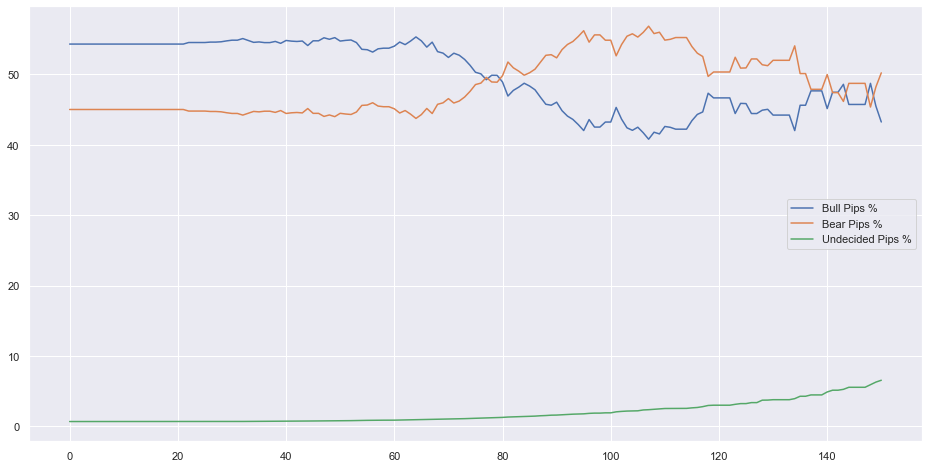

In [133]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_75_75[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 43% and Undecided Pips % Increased with Pips. Bull Pips % tend to decrease with Pips. At about 80 Pips, Bull Pips % and Bear Pips % crosses and Bear Pips start to increase, while Bull pips decrease.

<AxesSubplot:ylabel='Signals'>

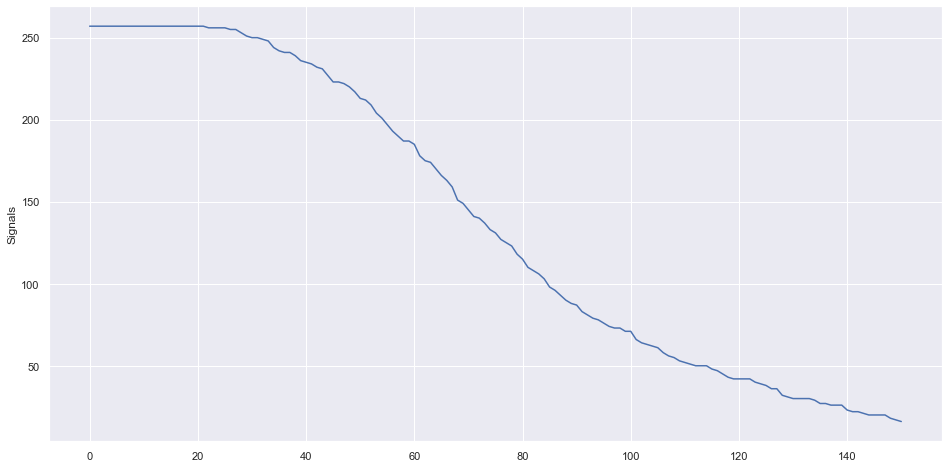

In [134]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_75_75['Signals'])

<AxesSubplot:>

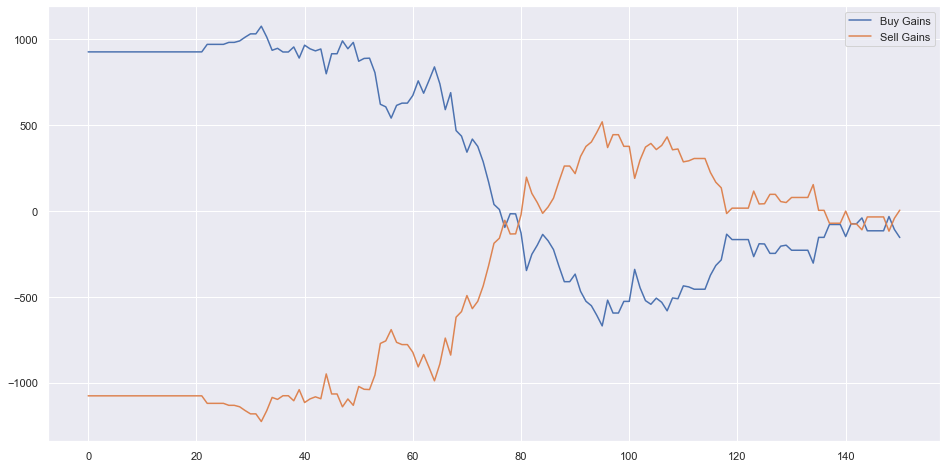

In [135]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_75_75[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

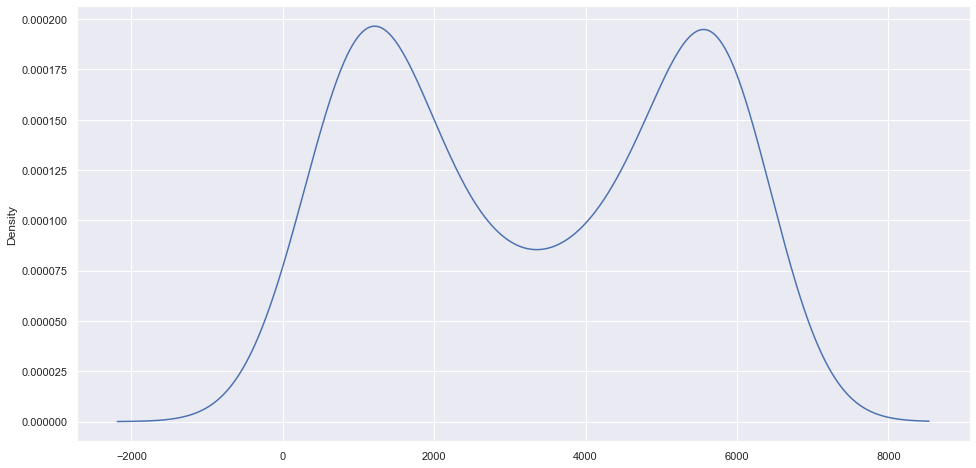

In [136]:
plt.figure(figsize=(16,8))
test_dataframe_hl_75_75['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

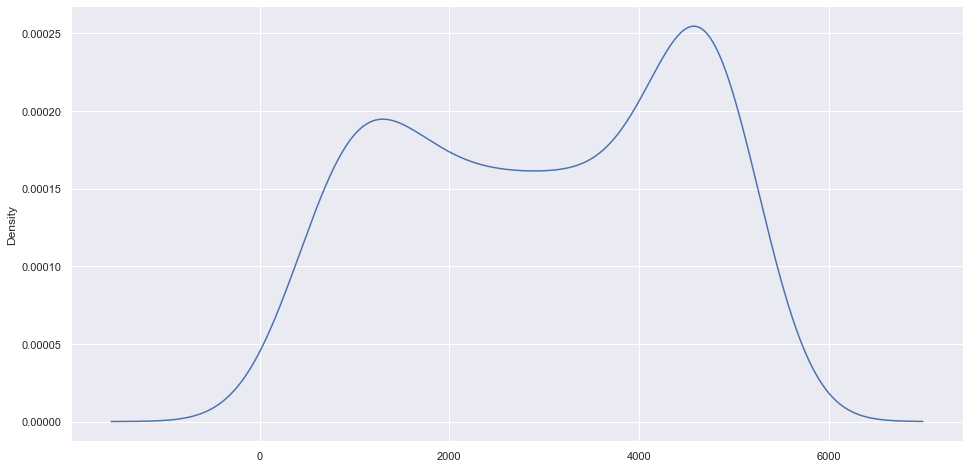

In [137]:
plt.figure(figsize=(16,8))
test_dataframe_hl_75_75['Bear Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

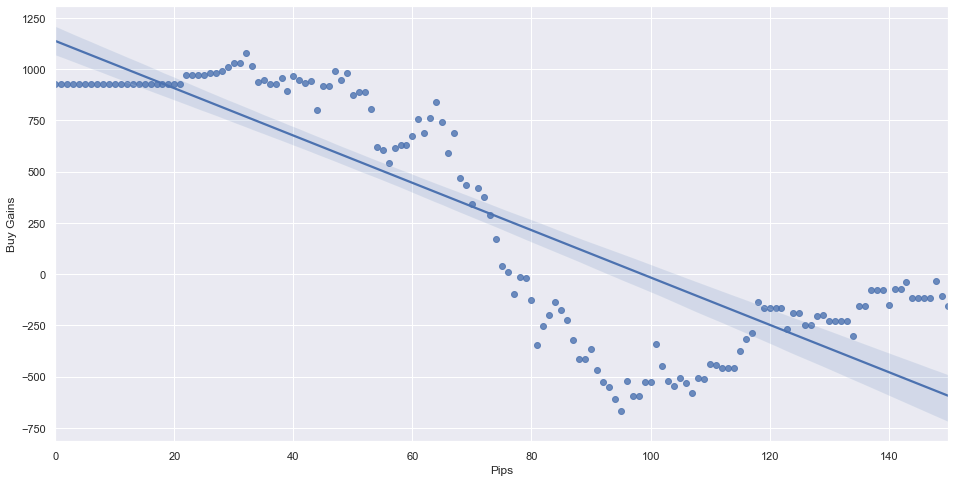

In [138]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_hl_75_75)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

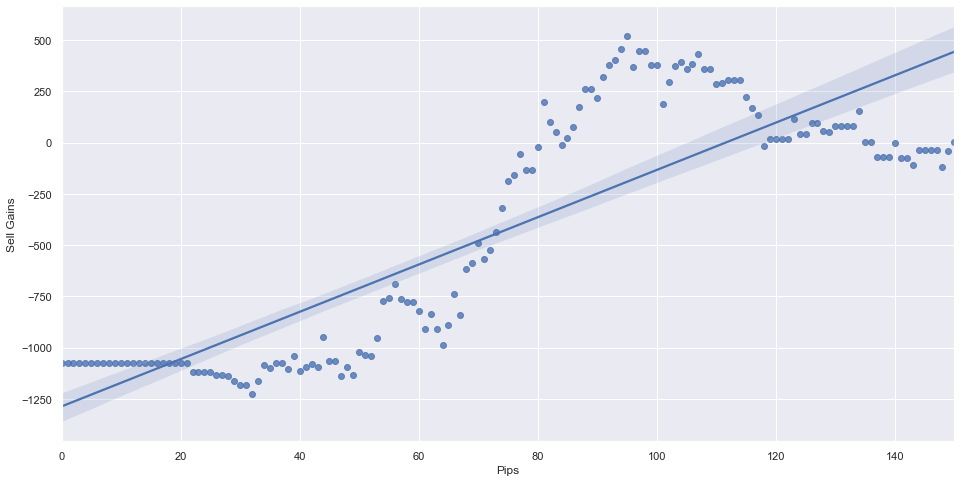

In [139]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_hl_75_75)

### Test for Tp 100 pips and Sl 100 pips <a id="hl_100"></a>

In [140]:
test_dataframe_hl_100_100 = analyze(100, 100, reduced_dataset, 'High Low')
test_dataframe_hl_100_100

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    257.0        0.0    22.0    17.0    110.0    108.0        3960.6   
1       1    257.0        0.0    22.0    17.0    110.0    108.0        3960.6   
2       2    257.0        0.0    22.0    17.0    110.0    108.0        3960.6   
3       3    257.0        0.0    22.0    17.0    110.0    108.0        3960.6   
4       4    257.0        0.0    22.0    17.0    110.0    108.0        3960.6   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146     20.0        0.0     6.0     7.0      3.0      4.0         131.5   
147   147     20.0        0.0     6.0     7.0      3.0      4.0         131.5   
148   148     18.0        0.0     6.0     7.0      3.0      2.0         131.5   
149   149     17.0        0.0     6.0     7.0      2.0      2.0          91.9   
150   150     16.0        0.0     6.0     7.0      1.0      2.0          44.5   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          3283.4      5.0          2.0             677.2     6160.6   
1          3283.4      5.0          2.0             677.2     6160.6   
2          3283.4      5.0          2.0             677.2     6160.6   
3          3283.4      5.0          2.0             677.2     6160.6   
4          3283.4      5.0          2.0             677.2     6160.6   
..            ...      ...          ...               ...        ...   
146         129.4     -1.0         -1.0               2.1      731.5   
147         129.4     -1.0         -1.0               2.1      731.5   
148          79.1     -1.0          1.0              52.4      731.5   
149          79.1     -1.0          0.0              12.8      691.9   
150          79.1     -1.0         -1.0             -34.6      644.5   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4983.4             0.0    55.281766    44.718234               0.0   
1       4983.4             0.0    55.281766    44.718234               0.0   
2       4983.4             0.0    55.281766    44.718234               0.0   
3       4983.4             0.0    55.281766    44.718234               0.0   
4       4983.4             0.0    55.281766    44.718234               0.0   
..         ...             ...          ...          ...               ...   
146      829.4             0.0    46.863989    53.136011               0.0   
147      829.4             0.0    46.863989    53.136011               0.0   
148      779.1             0.0    48.424467    51.575533               0.0   
149      779.1             0.0    47.036030    52.963970               0.0   
150      779.1             0.0    45.272548    54.727452               0.0   

     Buy Gains  Sell Gains  
0       1177.2     -1177.2  
1       1177.2     -1177.2  
2       1177.2     -1177.2  
3       1177.2     -1177.2  
4       1177.2     -1177.2  
..         ...         ...  
146      -97.9        97.9  
147      -97.9        97.9  
148      -47.6        47.6  
149      -87.2        87.2  
150     -134.6       134.6  

[151 rows x 20 columns]

In [141]:
test_dataframe_hl_100_100.describe()

Pips     Signals  Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000      151.0  151.000000  151.000000  151.000000   
mean    75.000000  139.907285        0.0   14.907285   13.794702   56.562914   
std     43.734045   90.472637        0.0    5.909711    3.394737   42.055769   
min      0.000000   16.000000        0.0    6.000000    7.000000    1.000000   
25%     37.500000   50.000000        0.0    9.000000   11.000000   13.000000   
50%     75.000000  131.000000        0.0   16.000000   15.000000   50.000000   
75%    112.500000  240.000000        0.0   21.000000   17.000000  104.500000   
max    150.000000  257.000000        0.0   22.000000   17.000000  110.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    54.642384   2082.322517   1784.832450    1.112583     1.920530   
std     39.520854   1514.777549   1156.747841    3.054053     3.672462   
min      2.000000     44.500000     79.100000   -4.000000    -4.000000   
25%     17.000000    503.700000    696.100000   -2.000000    -1.500000   
50%     50.000000   1906.400000   1805.100000    1.000000     2.000000   
75%     97.500000   3777.000000   3010.150000    4.000000     5.000000   
max    108.000000   3960.600000   3283.400000    5.000000    12.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000           151.0   
mean         297.490066  3573.050993  3164.302649             0.0   
std          380.643161  2103.604900  1477.240161             0.0   
min         -229.300000   644.500000   779.100000             0.0   
25%          -58.000000  1403.700000  1796.100000             0.0   
50%          197.800000  3506.400000  3305.100000             0.0   
75%          677.200000  5877.000000  4710.150000             0.0   
max          826.900000  6160.600000  4983.400000             0.0   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   151.000000   151.000000             151.0   151.000000   151.000000  
mean     50.815143    49.184857               0.0   408.748344  -408.748344  
std       4.696046     4.696046               0.0   676.098006   676.098006  
min      42.365335    43.933080               0.0  -617.700000 -1326.900000  
25%      46.763450    44.718234               0.0  -183.500000 -1177.200000  
50%      51.477648    48.522352               0.0   201.300000  -201.300000  
75%      55.281766    53.236550               0.0  1177.200000   183.500000  
max      56.066920    57.634665               0.0  1326.900000   617.700000

<AxesSubplot:>

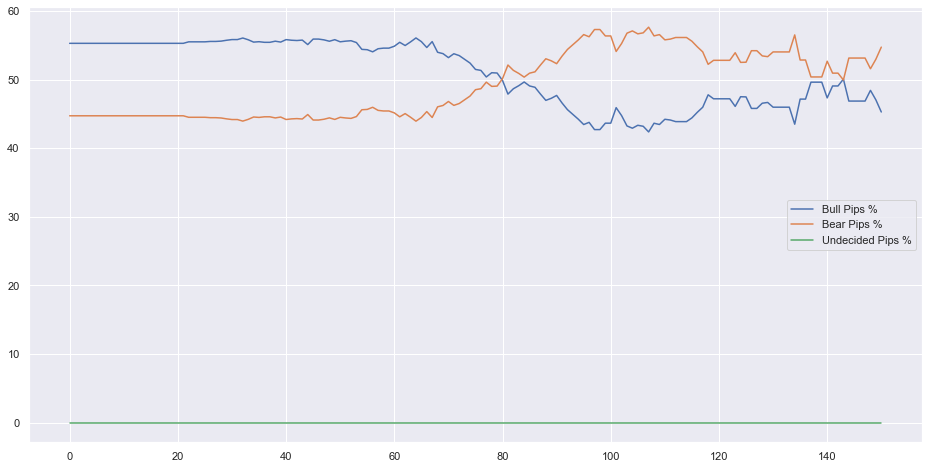

In [142]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_100_100[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 43% and Undecided Pips % Increased with Pips. Bull Pips % tend to decrease with Pips. At about 80 Pips, Bull Pips % and Bear Pips % crosses and Bear Pips start to increase, while Bull pips decrease.

<AxesSubplot:ylabel='Signals'>

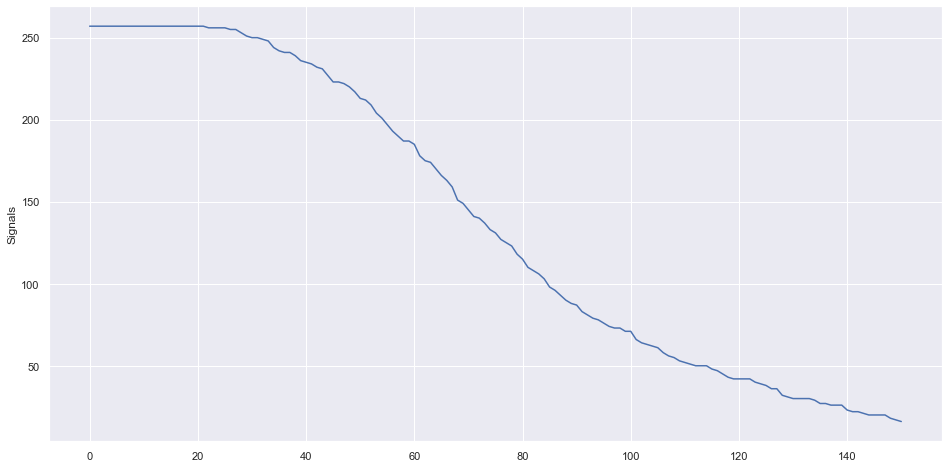

In [143]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_hl_100_100['Signals'], dashes=False)

<AxesSubplot:ylabel='Density'>

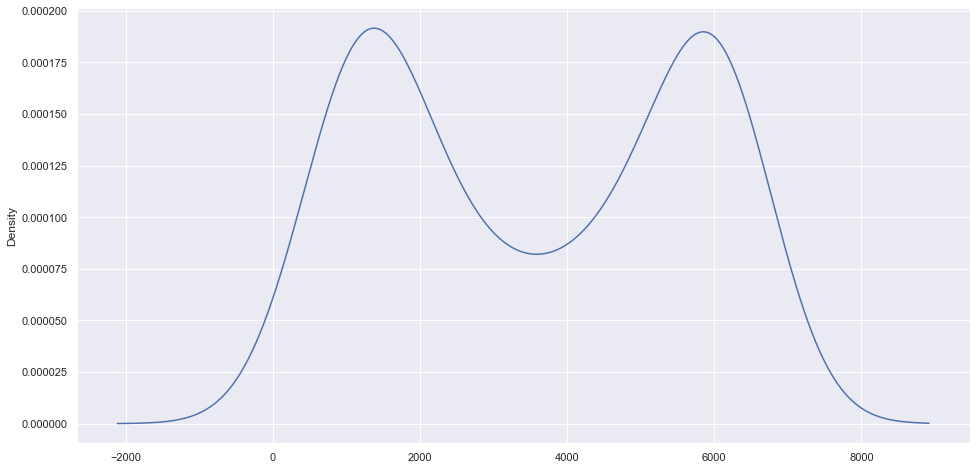

In [144]:
plt.figure(figsize=(16,8))
test_dataframe_hl_100_100['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

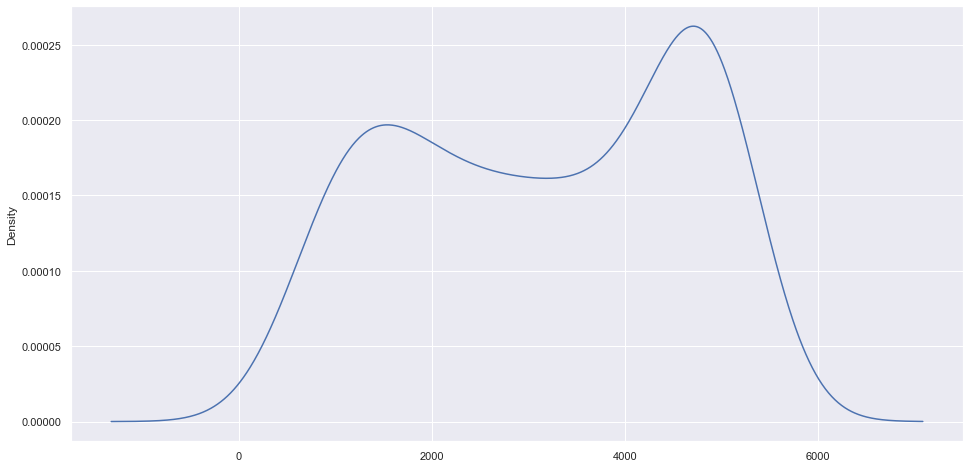

In [145]:
plt.figure(figsize=(16,8))
test_dataframe_hl_100_100['Bear Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

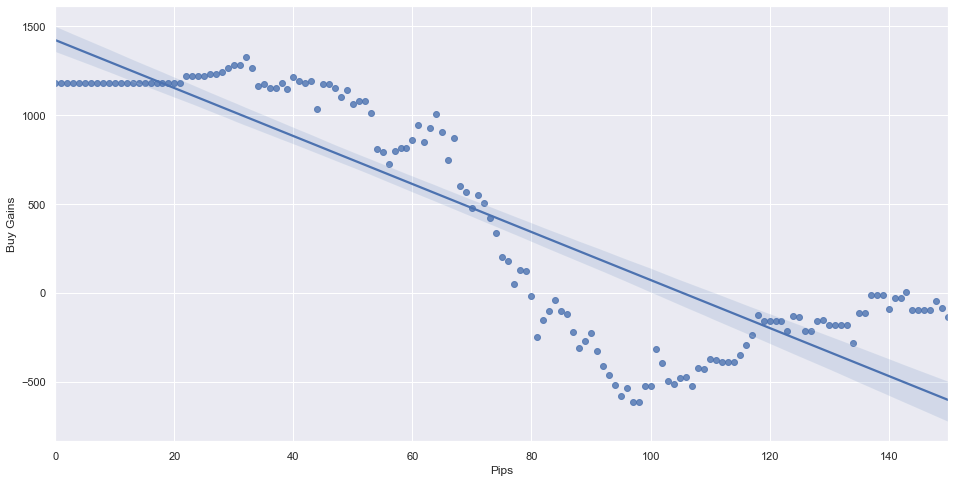

In [146]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_hl_100_100)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

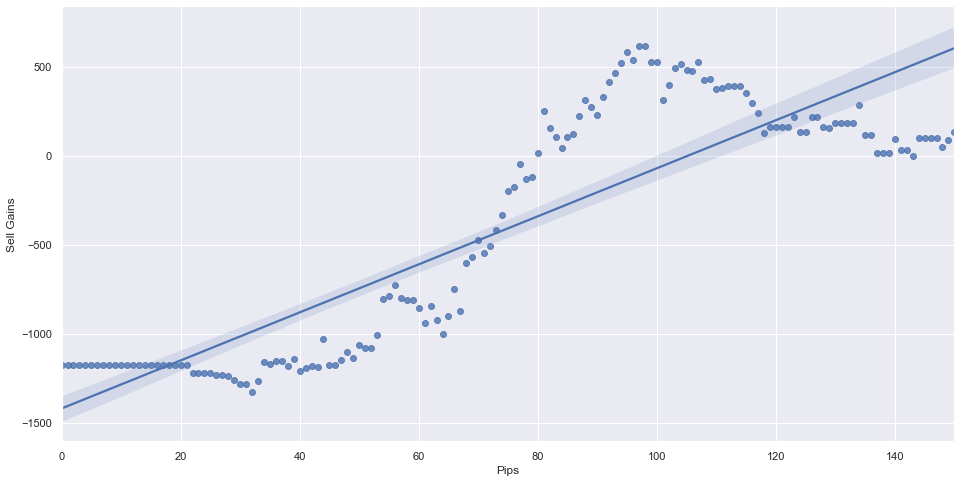

In [147]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_hl_100_100)

## Test For  Up Move <a id="um"></a>

### Test for Tp 50 pips and Sl 50 pips <a id="um_50"></a>

In [148]:
test_dataframe_um_50_50 = analyze(50, 50, reduced_dataset, 'Up Move')
test_dataframe_um_50_50

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    256.0       10.0    87.0    64.0     44.0     51.0         825.8   
1       1    254.0       10.0    87.0    63.0     44.0     50.0         825.8   
2       2    251.0       10.0    87.0    62.0     44.0     48.0         825.8   
3       3    248.0       10.0    87.0    62.0     43.0     46.0         812.5   
4       4    246.0       10.0    86.0    61.0     43.0     46.0         812.5   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      5.0        2.0     1.0     1.0      1.0      0.0          44.5   
147   147      5.0        2.0     1.0     1.0      1.0      0.0          44.5   
148   148      5.0        2.0     1.0     1.0      1.0      0.0          44.5   
149   149      5.0        2.0     1.0     1.0      1.0      0.0          44.5   
150   150      4.0        2.0     1.0     0.0      1.0      0.0          44.5   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          1009.5     23.0         -7.0            -183.7     5175.8   
1           987.8     24.0         -6.0            -162.0     5175.8   
2           955.8     25.0         -4.0            -130.0     5175.8   
3           884.2     25.0         -3.0             -71.7     5162.5   
4           884.2     25.0         -3.0             -71.7     5112.5   
..            ...      ...          ...               ...        ...   
146           0.0      0.0          1.0              44.5       94.5   
147           0.0      0.0          1.0              44.5       94.5   
148           0.0      0.0          1.0              44.5       94.5   
149           0.0      0.0          1.0              44.5       94.5   
150           0.0      1.0          1.0              44.5       94.5   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4209.5           500.0    52.358553    42.583432          5.058015   
1       4137.8           500.0    52.741094    42.163936          5.094970   
2       4055.8           500.0    53.185499    41.676600          5.137901   
3       3984.2           500.0    53.515710    41.301170          5.183120   
4       3934.2           500.0    53.552536    41.210052          5.237412   
..         ...             ...          ...          ...               ...   
146       50.0           100.0    38.650307    20.449898         40.899796   
147       50.0           100.0    38.650307    20.449898         40.899796   
148       50.0           100.0    38.650307    20.449898         40.899796   
149       50.0           100.0    38.650307    20.449898         40.899796   
150        0.0           100.0    48.586118     0.000000         51.413882   

     Buy Gains  Sell Gains  
0        466.3     -1466.3  
1        538.0     -1538.0  
2        620.0     -1620.0  
3        678.3     -1678.3  
4        678.3     -1678.3  
..         ...         ...  
146      -55.5      -144.5  
147      -55.5      -144.5  
148      -55.5      -144.5  
149      -55.5      -144.5  
150       -5.5      -194.5  

[151 rows x 20 columns]

In [149]:
test_dataframe_um_50_50.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   79.317881    5.119205   33.192053   19.463576   10.059603   
std     43.734045   75.335461    2.823537   28.677219   18.199185   12.205044   
min      0.000000    4.000000    2.000000    1.000000    0.000000    1.000000   
25%     37.500000   16.000000    2.000000    8.000000    5.000000    1.000000   
50%     75.000000   47.000000    5.000000   19.000000   13.000000    5.000000   
75%    112.500000  130.000000    8.000000   60.000000   27.000000   15.500000   
max    150.000000  256.000000   10.000000   87.000000   64.000000   44.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    11.483444    208.731126    233.147682   13.728477    -1.423841   
std     14.354955    220.051487    270.527351   11.365992     2.942645   
min      0.000000     44.500000      0.000000    0.000000    -8.000000   
25%      0.000000     44.500000      0.000000    3.000000    -4.000000   
50%      5.000000    127.500000    161.000000    9.000000     0.000000   
75%     19.500000    287.450000    383.150000   25.000000     1.000000   
max     51.000000    825.800000   1009.500000   34.000000     2.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean         -24.416556  1868.333775  1206.326490      255.960265   
std           70.738693  1640.990949  1177.484147      141.176857   
min         -189.300000    94.500000     0.000000      100.000000   
25%          -92.100000   444.500000   250.000000      100.000000   
50%           -8.000000  1077.500000   811.000000      250.000000   
75%           44.500000  3287.450000  1733.150000      400.000000   
max           65.700000  5175.800000  4209.500000      500.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   151.000000   151.000000        151.000000   151.000000   151.000000  
mean     54.719869    32.441865         12.838266   406.047020  -917.967550  
std       5.471051     6.243135          9.155382   382.664207   644.502485  
min      38.650307     0.000000          4.880853   -55.500000 -1996.700000  
25%      52.799294    29.027576          7.088818    44.500000 -1553.250000  
50%      55.880627    33.597340         10.613833   267.100000  -636.100000  
75%      58.730388    37.318260         13.349416   762.900000  -294.500000  
max      63.733977    42.583432         51.413882  1167.200000  -144.500000

<AxesSubplot:>

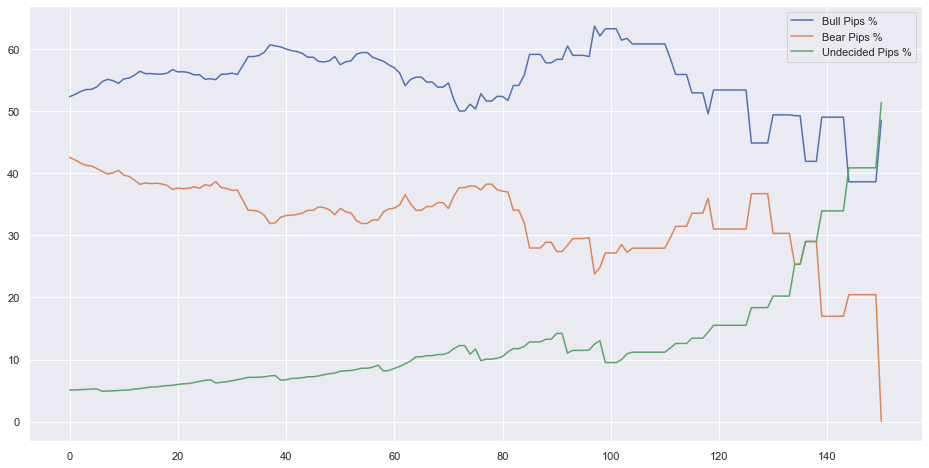

In [150]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_um_50_50[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

<AxesSubplot:ylabel='Signals'>

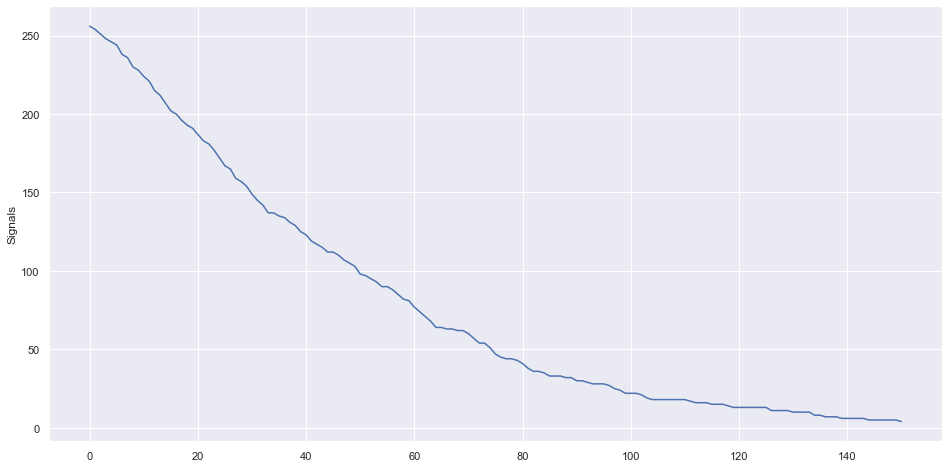

In [151]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_um_50_50['Signals'], dashes=False)

<AxesSubplot:>

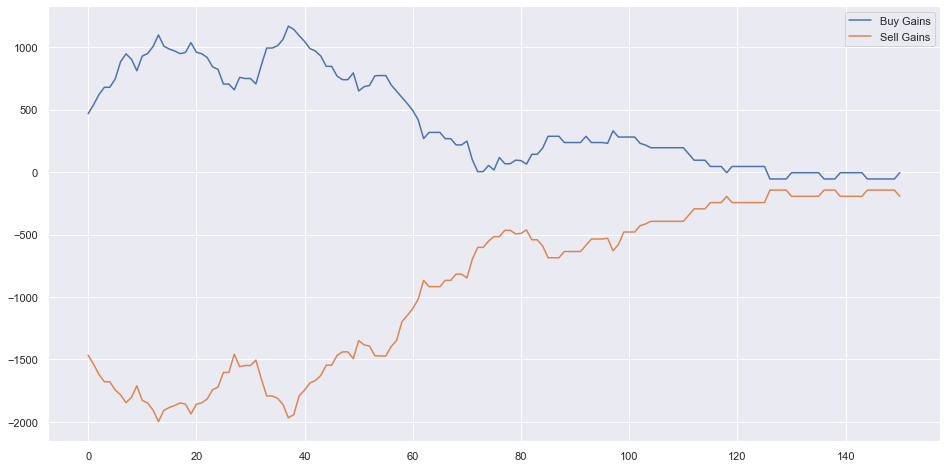

In [152]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_um_50_50[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

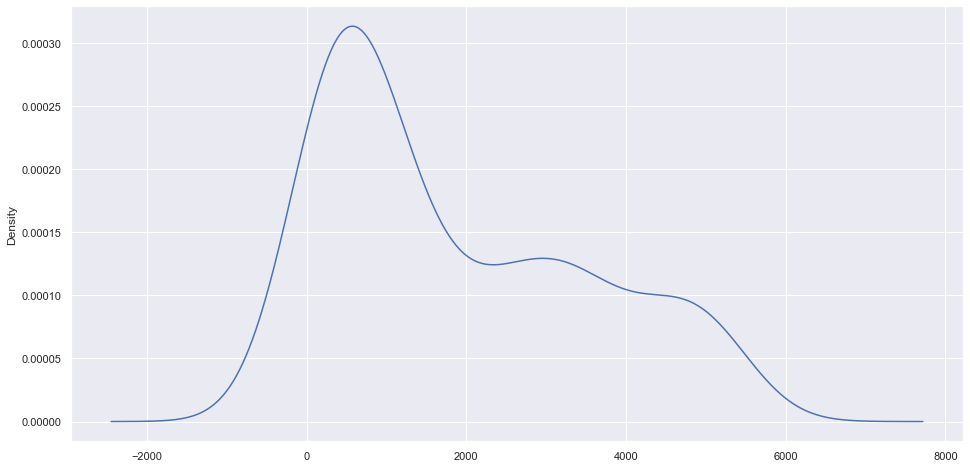

In [153]:
plt.figure(figsize=(16,8))
test_dataframe_um_50_50['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

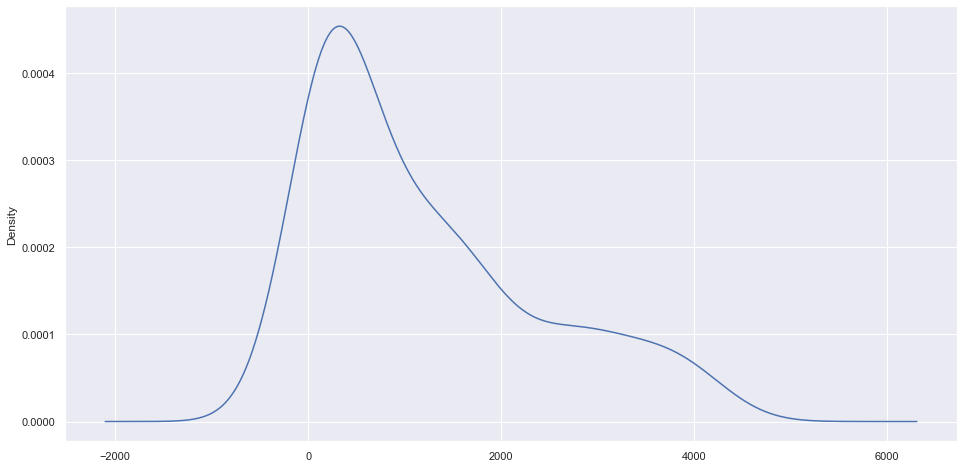

In [154]:
plt.figure(figsize=(16,8))
test_dataframe_um_50_50['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

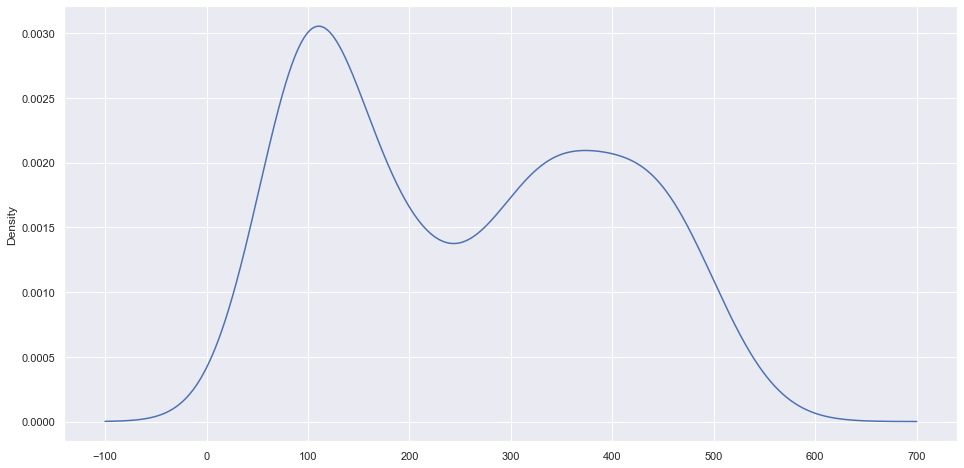

In [155]:
plt.figure(figsize=(16,8))
test_dataframe_um_50_50['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

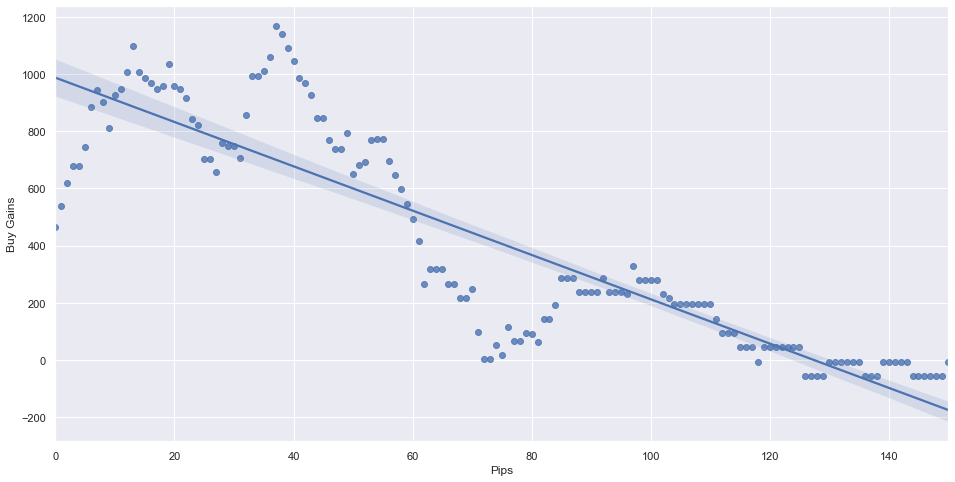

In [156]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_um_50_50)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

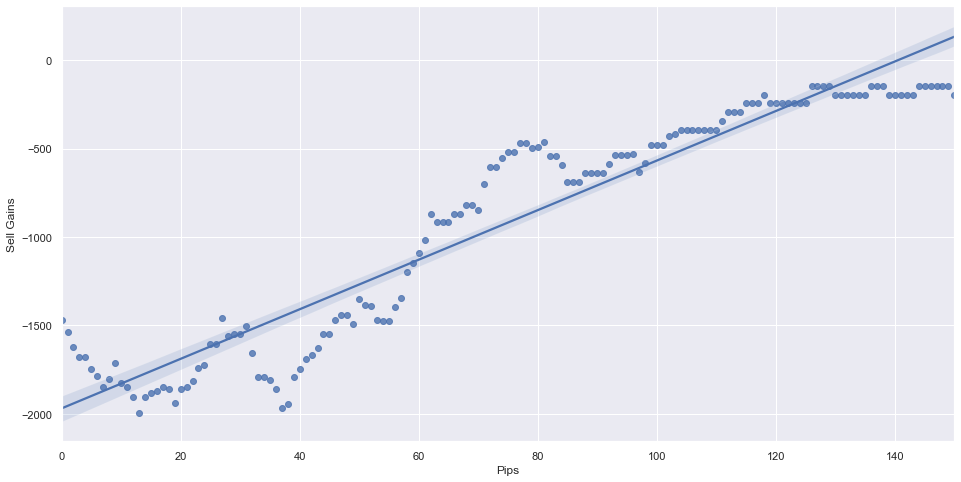

In [157]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_um_50_50)

## Test For Down Move <a id="dm"></a>

### Test for Sl 50 pips and Tp 50 pips  <a id="dm_50"></a>

In [158]:
test_dataframe_dm_50_50 = analyze(50, 50, reduced_dataset, 'Down Move')
test_dataframe_dm_50_50

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    254.0       10.0    86.0    63.0     44.0     51.0         825.8   
1       1    247.0       10.0    84.0    62.0     41.0     50.0         733.1   
2       2    244.0       10.0    82.0    61.0     41.0     50.0         733.1   
3       3    240.0        9.0    80.0    61.0     41.0     49.0         733.1   
4       4    233.0        9.0    79.0    58.0     40.0     47.0         704.4   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      5.0        2.0     2.0     1.0      0.0      0.0           0.0   
147   147      5.0        2.0     2.0     1.0      0.0      0.0           0.0   
148   148      5.0        2.0     2.0     1.0      0.0      0.0           0.0   
149   149      5.0        2.0     2.0     1.0      0.0      0.0           0.0   
150   150      5.0        2.0     2.0     1.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          1009.5     23.0         -7.0            -183.7     5125.8   
1           969.0     22.0         -9.0            -235.9     4933.1   
2           969.0     21.0         -9.0            -235.9     4833.1   
3           933.3     19.0         -8.0            -200.2     4733.1   
4           921.6     21.0         -7.0            -217.2     4654.4   
..            ...      ...          ...               ...        ...   
146           0.0      1.0          0.0               0.0      100.0   
147           0.0      1.0          0.0               0.0      100.0   
148           0.0      1.0          0.0               0.0      100.0   
149           0.0      1.0          0.0               0.0      100.0   
150           0.0      1.0          0.0               0.0      100.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4159.5           500.0    52.382656    42.507639          5.109705   
1       4069.0           500.0    51.915892    42.822113          5.261995   
2       4019.0           500.0    51.679302    42.974305          5.346393   
3       3983.3           450.0    51.635320    43.455446          4.909234   
4       3821.6           450.0    52.144298    42.814251          5.041452   
..         ...             ...          ...          ...               ...   
146       50.0           100.0    40.000000    20.000000         40.000000   
147       50.0           100.0    40.000000    20.000000         40.000000   
148       50.0           100.0    40.000000    20.000000         40.000000   
149       50.0           100.0    40.000000    20.000000         40.000000   
150       50.0           100.0    40.000000    20.000000         40.000000   

     Buy Gains  Sell Gains  
0        466.3     -1466.3  
1        364.1     -1364.1  
2        314.1     -1314.1  
3        299.8     -1199.8  
4        382.8     -1282.8  
..         ...         ...  
146      -50.0      -150.0  
147      -50.0      -150.0  
148      -50.0      -150.0  
149      -50.0      -150.0  
150      -50.0      -150.0  

[151 rows x 20 columns]

In [159]:
test_dataframe_dm_50_50.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   64.000000    3.562914   18.847682   21.264901   10.483444   
std     43.734045   68.730294    2.237785   23.010360   17.411759   13.311576   
min      0.000000    5.000000    2.000000    2.000000    1.000000    0.000000   
25%     37.500000   13.000000    2.000000    3.000000    8.000000    0.000000   
50%     75.000000   33.000000    2.000000    8.000000   18.000000    2.000000   
75%    112.500000   98.000000    5.000000   28.000000   30.500000   19.000000   
max    150.000000  254.000000   10.000000   86.000000   63.000000   44.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean     9.841060    201.033775    186.783444   -2.417219     0.642384   
std     13.502638    243.642507    257.762005    8.313329     2.439520   
min      0.000000      0.000000      0.000000  -14.000000    -9.000000   
25%      0.000000      0.000000      0.000000   -7.000000     0.000000   
50%      3.000000     25.600000     51.000000   -4.000000     0.000000   
75%     15.500000    397.700000    285.350000    0.000000     2.000000   
max     51.000000    825.800000   1009.500000   23.000000     5.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean          14.250331  1143.417881  1250.028477      178.145695   
std           64.803695  1387.250086  1119.109121      111.889255   
min         -235.900000   100.000000    50.000000      100.000000   
25%            0.000000   150.000000   400.000000      100.000000   
50%            0.000000   425.600000   951.000000      100.000000   
75%           58.000000  1797.700000  1810.350000      250.000000   
max          149.600000  5125.800000  4159.500000      500.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains   Sell Gains  
count   151.000000   151.000000        151.000000  151.000000   151.000000  
mean     36.013724    50.359427         13.626849 -284.756291   -71.535099  
std       9.863092    12.263015         11.050018  307.644857   472.672148  
min      20.000000    20.000000          4.620767 -841.900000 -1466.300000  
25%      27.813503    43.006849          5.774790 -516.400000  -150.000000  
50%      33.333333    50.859095          8.194706 -340.300000    50.000000  
75%      46.126525    61.238898         15.384615 -100.000000   252.300000  
max      52.894444    65.716192         40.000000  478.000000   518.100000

<AxesSubplot:>

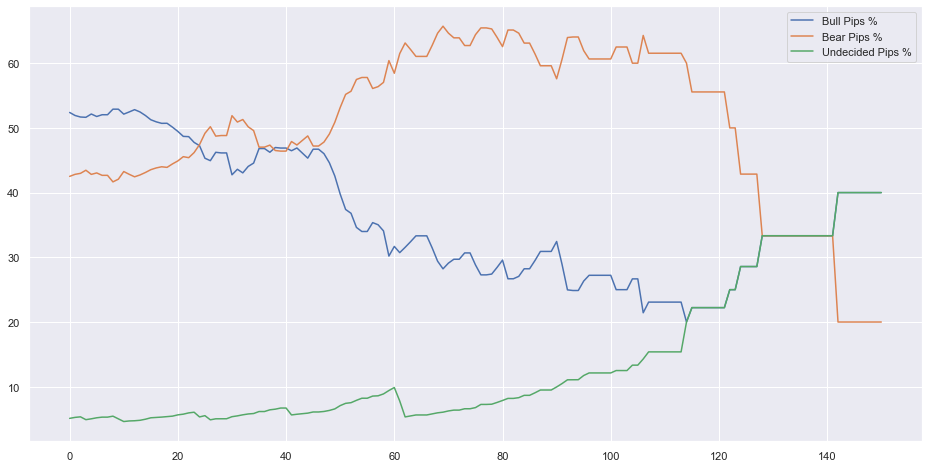

In [160]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_dm_50_50[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 43% and Undecided Pips % Increased with Pips. Bull Pips % tend to decrease with Pips. The best time to make a trade with this data is 60 to 100 Pips.

<AxesSubplot:ylabel='Signals'>

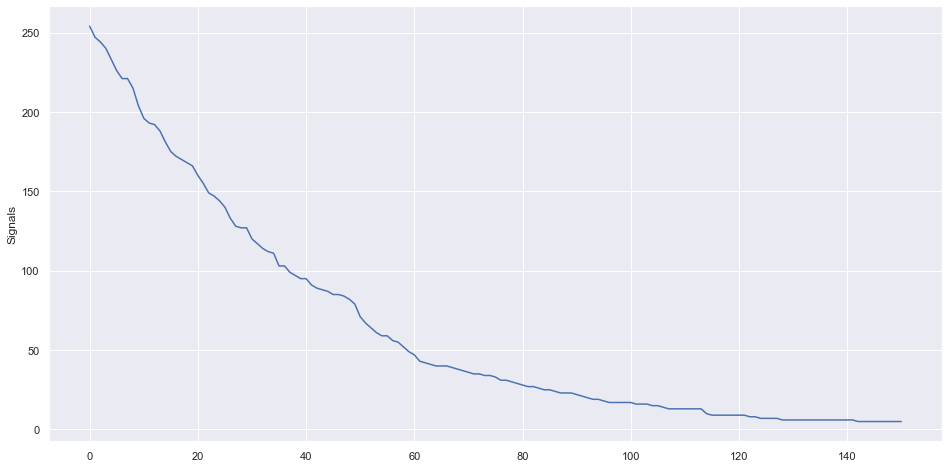

In [161]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_dm_50_50['Signals'], dashes=False)

<AxesSubplot:>

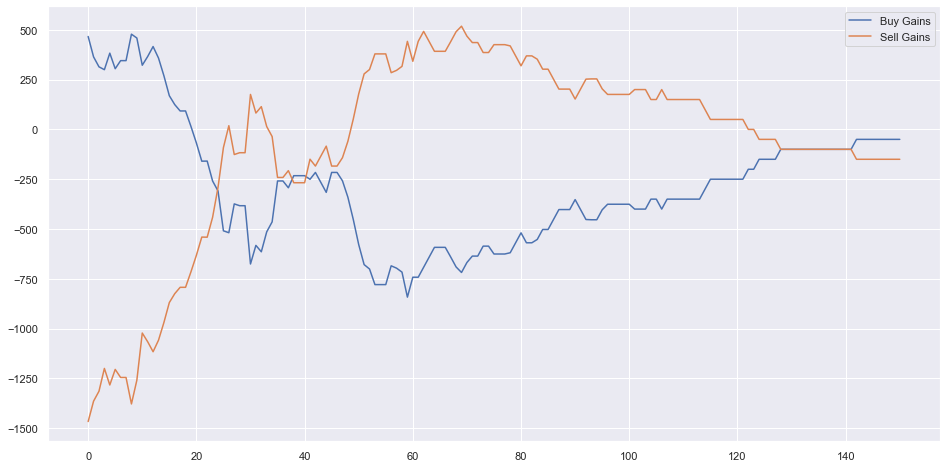

In [162]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_dm_50_50[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

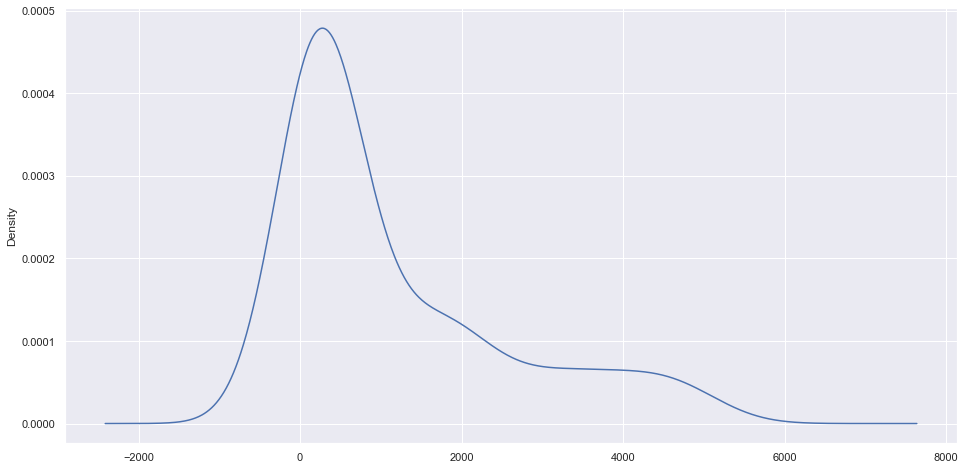

In [163]:
plt.figure(figsize=(16,8))
test_dataframe_dm_50_50['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

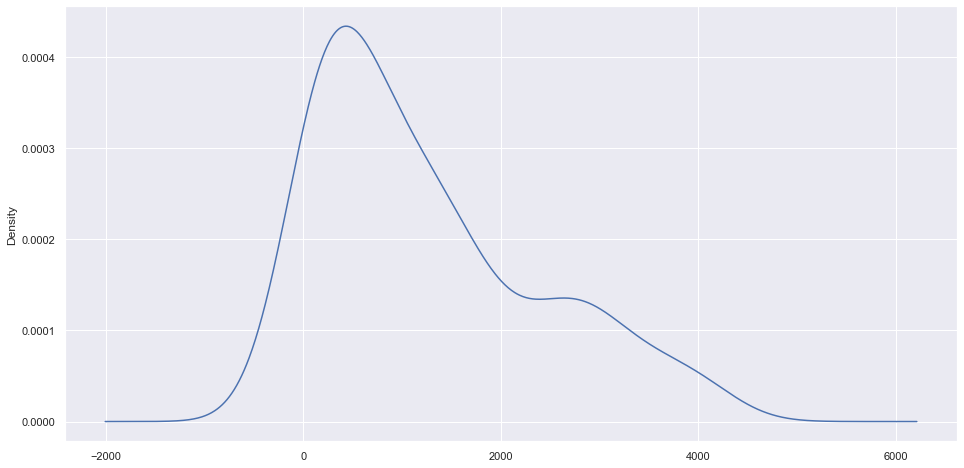

In [164]:
plt.figure(figsize=(16,8))
test_dataframe_dm_50_50['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

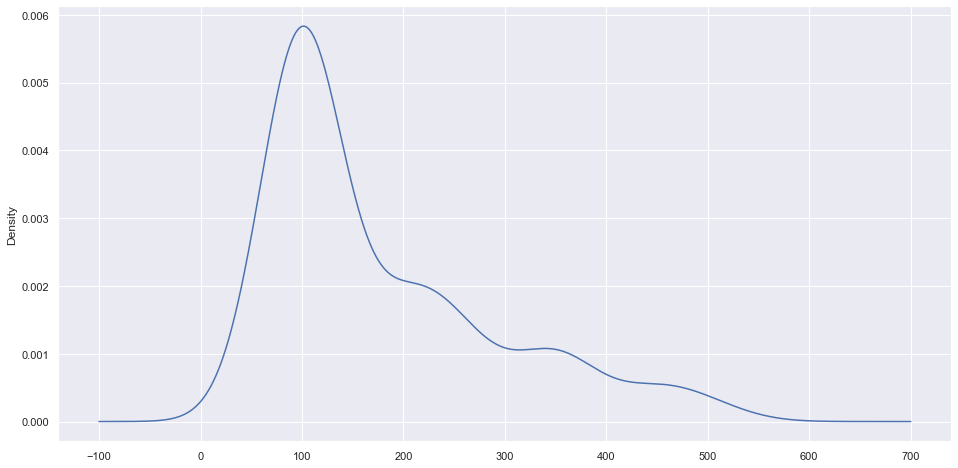

In [165]:
plt.figure(figsize=(16,8))
test_dataframe_dm_50_50['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

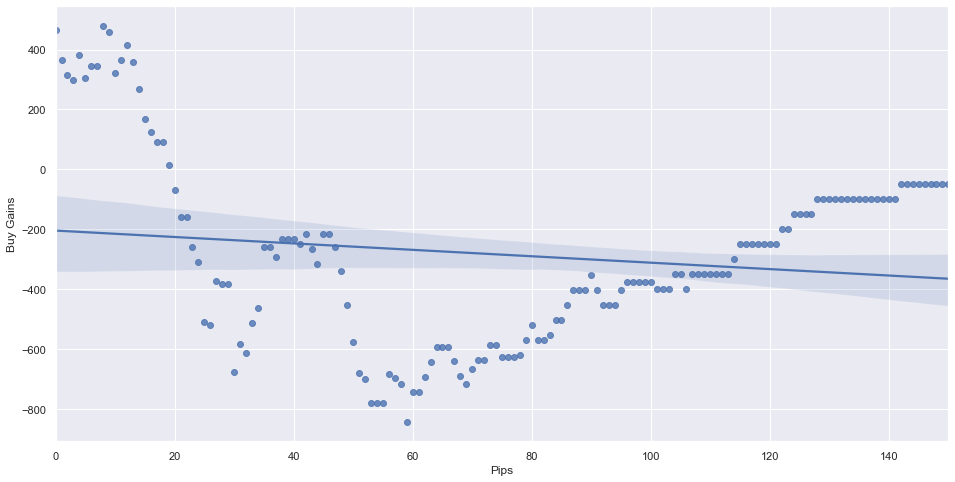

In [166]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_dm_50_50)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

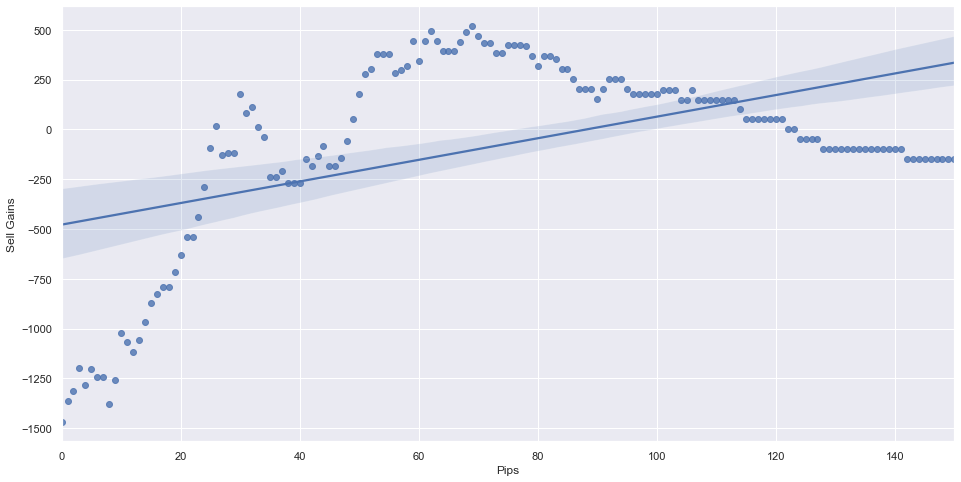

In [167]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_dm_50_50)

### Test for Sl of 75 Pips and Tp of 75 Pips

In [168]:
test_dataframe_dm_75_75 = analyze(75, 75, reduced_dataset, 'Down Move')
test_dataframe_dm_75_75

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    254.0        1.0    45.0    34.0     83.0     91.0        2372.8   
1       1    247.0        1.0    44.0    33.0     79.0     90.0        2223.9   
2       2    244.0        1.0    43.0    33.0     78.0     89.0        2216.7   
3       3    240.0        1.0    42.0    33.0     76.0     88.0        2098.0   
4       4    233.0        1.0    42.0    32.0     74.0     84.0        2037.9   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      5.0        0.0     2.0     3.0      0.0      0.0           0.0   
147   147      5.0        0.0     2.0     3.0      0.0      0.0           0.0   
148   148      5.0        0.0     2.0     3.0      0.0      0.0           0.0   
149   149      5.0        0.0     2.0     3.0      0.0      0.0           0.0   
150   150      5.0        0.0     2.0     3.0      0.0      0.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          2295.7     11.0         -8.0              77.1     5747.8   
1          2255.2     11.0        -11.0             -31.3     5523.9   
2          2219.0     10.0        -11.0              -2.3     5441.7   
3          2183.3      9.0        -12.0             -85.3     5248.0   
4          2135.0     10.0        -10.0             -97.1     5187.9   
..            ...      ...          ...               ...        ...   
146           0.0     -1.0          0.0               0.0      150.0   
147           0.0     -1.0          0.0               0.0      150.0   
148           0.0     -1.0          0.0               0.0      150.0   
149           0.0     -1.0          0.0               0.0      150.0   
150           0.0     -1.0          0.0               0.0      150.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4845.7            75.0    53.876365    45.420631          0.703004   
1       4730.2            75.0    53.479006    45.794890          0.726104   
2       4694.0            75.0    53.294093    45.971383          0.734524   
3       4658.3            75.0    52.578321    46.670273          0.751405   
4       4535.0            75.0    52.949101    46.285429          0.765470   
..         ...             ...          ...          ...               ...   
146      225.0             0.0    40.000000    60.000000          0.000000   
147      225.0             0.0    40.000000    60.000000          0.000000   
148      225.0             0.0    40.000000    60.000000          0.000000   
149      225.0             0.0    40.000000    60.000000          0.000000   
150      225.0             0.0    40.000000    60.000000          0.000000   

     Buy Gains  Sell Gains  
0        827.1      -977.1  
1        718.7      -868.7  
2        672.7      -822.7  
3        514.7      -664.7  
4        577.9      -727.9  
..         ...         ...  
146      -75.0        75.0  
147      -75.0        75.0  
148      -75.0        75.0  
149      -75.0        75.0  
150      -75.0        75.0  

[151 rows x 20 columns]

In [169]:
test_dataframe_dm_75_75.describe()

Pips     Signals   Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean    75.000000   64.000000    0.066225   11.509934   15.198675   16.774834   
std     43.734045   68.730294    0.249503   12.695862    8.840075   22.812035   
min      0.000000    5.000000    0.000000    2.000000    3.000000    0.000000   
25%     37.500000   13.000000    0.000000    3.000000    9.000000    0.000000   
50%     75.000000   33.000000    0.000000    5.000000   14.000000    4.000000   
75%    112.500000   98.000000    0.000000   18.000000   21.000000   27.000000   
max    150.000000  254.000000    1.000000   45.000000   34.000000   83.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    20.450331    439.266225    505.853642   -3.688742    -3.675497   
std     24.873195    622.632173    628.552135    5.694659     3.414771   
min      0.000000      0.000000      0.000000  -11.000000   -14.000000   
25%      1.000000      0.000000     49.300000   -8.000000    -6.000000   
50%     10.000000     85.100000    229.700000   -4.000000    -3.000000   
75%     32.000000    655.000000    762.900000   -2.000000    -1.000000   
max     91.000000   2372.800000   2295.700000   11.000000     0.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000      151.000000   
mean         -66.587417  1302.511258  1645.754305        4.966887   
std           72.902789  1572.244634  1271.072487       18.712711   
min         -357.600000   150.000000   225.000000        0.000000   
25%         -103.050000   225.000000   724.300000        0.000000   
50%          -52.300000   460.100000  1279.700000        0.000000   
75%           -8.250000  2005.000000  2337.900000        0.000000   
max           77.100000  5747.800000  4845.700000       75.000000   

       Bull Pips %  Bear Pips %  Undecided Pips %   Buy Gains  Sell Gains  
count   151.000000   151.000000        151.000000  151.000000  151.000000  
mean     35.126249    64.822577          0.051174 -348.209934  338.276159  
std      11.178488    11.263065          0.193118  444.989964  467.766532  
min      20.363834    45.420631          0.000000 -986.900000 -977.100000  
25%      24.223173    54.059936          0.000000 -678.600000  150.000000  
50%      33.333333    66.666667          0.000000 -424.300000  424.300000  
75%      45.940064    75.776827          0.000000 -150.000000  678.600000  
max      54.355174    79.636166          0.851634  827.100000  986.900000

<AxesSubplot:>

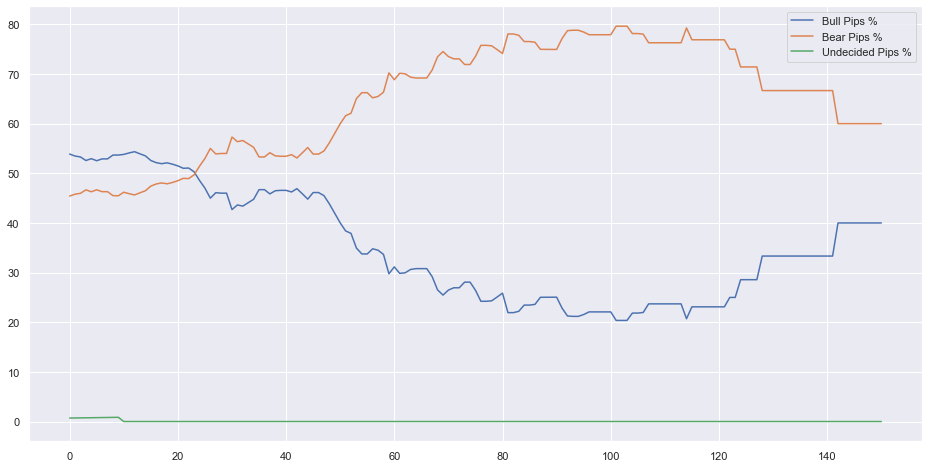

In [170]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_dm_75_75[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

<AxesSubplot:ylabel='Signals'>

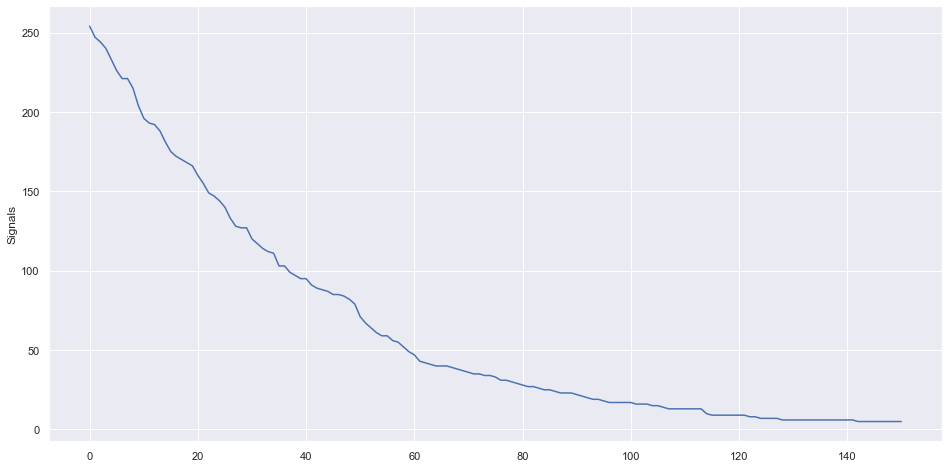

In [171]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_dm_75_75['Signals'], dashes=False)

<AxesSubplot:>

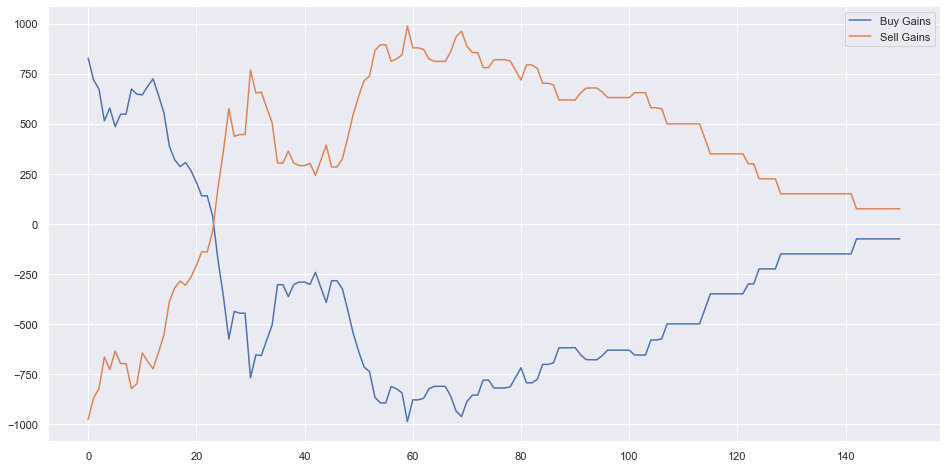

In [172]:
plt.figure(figsize=(16,8))
sns.lineplot(data=test_dataframe_dm_75_75[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

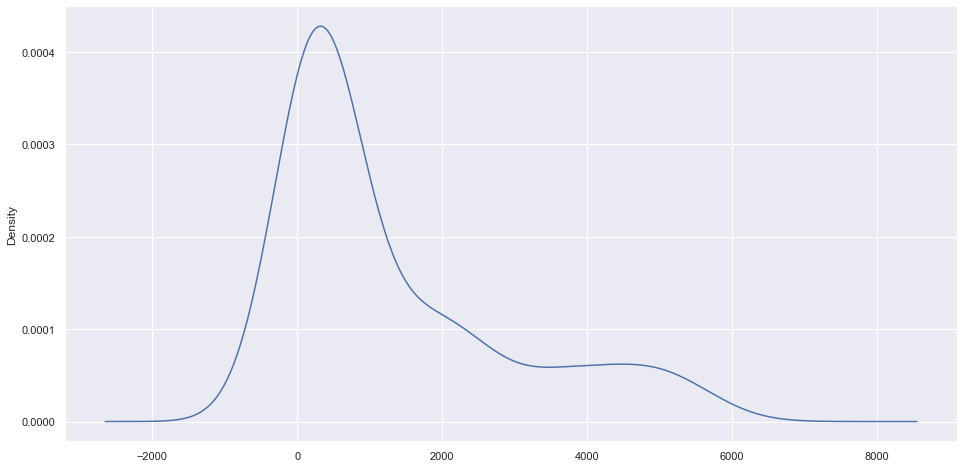

In [173]:
plt.figure(figsize=(16,8))
test_dataframe_dm_75_75['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

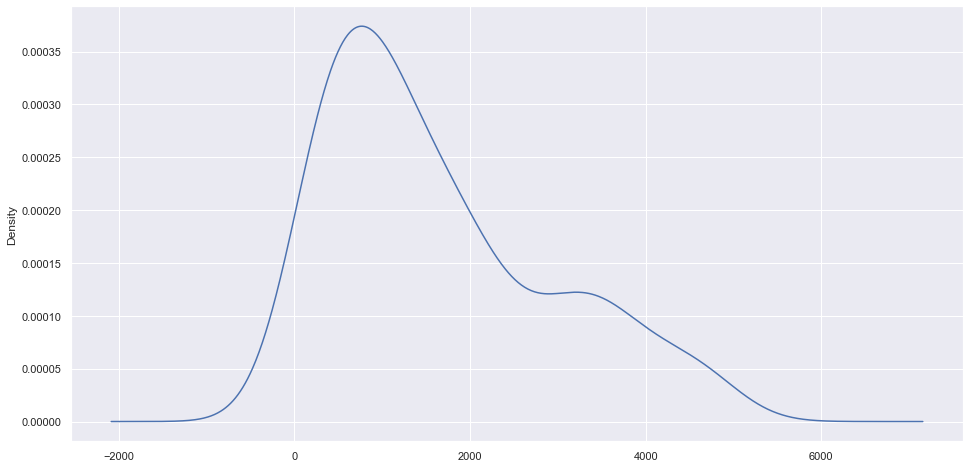

In [174]:
plt.figure(figsize=(16,8))
test_dataframe_dm_75_75['Bear Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

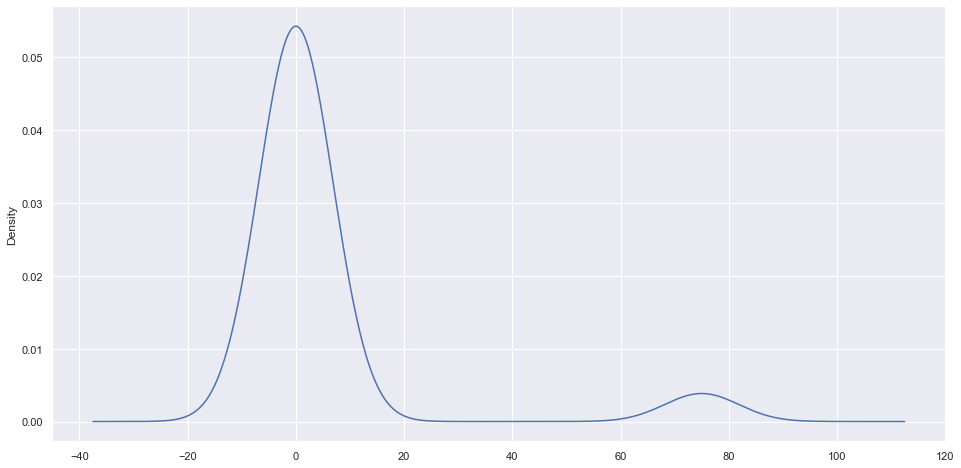

In [175]:
plt.figure(figsize=(16,8))
test_dataframe_dm_75_75['Undecided Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

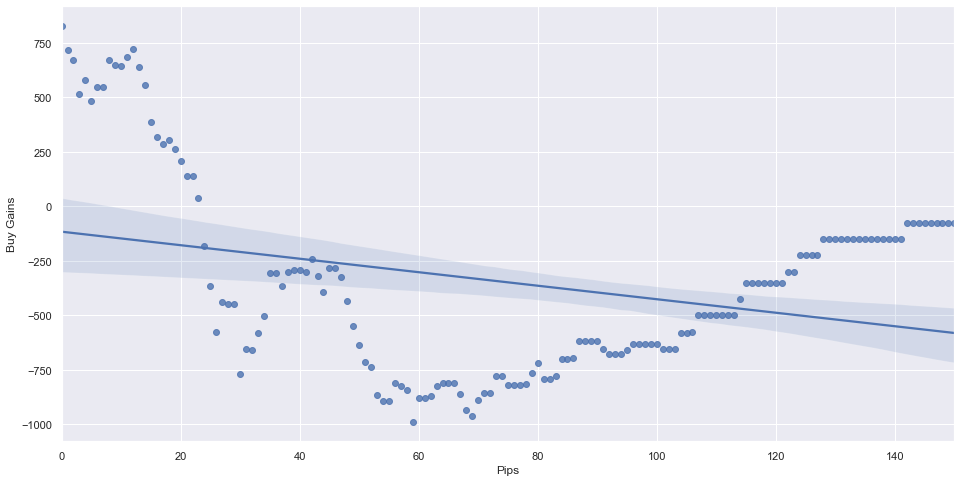

In [176]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_dm_75_75)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

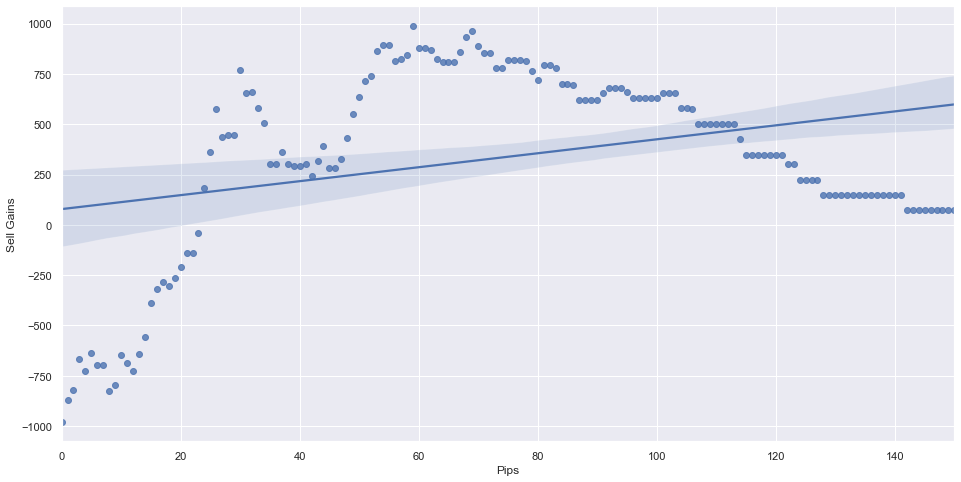

In [177]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_dm_75_75)

### Test for Sl of 100 pips and Tp of 100 pips

In [178]:
test_dataframe_dm_100_100 = analyze(100, 100, reduced_dataset, 'Down Move')
test_dataframe_dm_100_100

Pips  Signals  Undecided  Hit Tp  Hit Sl  Bullish  Bearish  Bullish Pips  \
0       0    254.0        0.0    21.0    17.0    109.0    107.0        3928.4   
1       1    247.0        0.0    20.0    17.0    105.0    105.0        3779.5   
2       2    244.0        0.0    19.0    17.0    104.0    104.0        3772.3   
3       3    240.0        0.0    19.0    17.0    101.0    103.0        3574.1   
4       4    233.0        0.0    19.0    16.0     99.0     99.0        3514.0   
..    ...      ...        ...     ...     ...      ...      ...           ...   
146   146      5.0        0.0     1.0     3.0      0.0      1.0           0.0   
147   147      5.0        0.0     1.0     3.0      0.0      1.0           0.0   
148   148      5.0        0.0     1.0     3.0      0.0      1.0           0.0   
149   149      5.0        0.0     1.0     3.0      0.0      1.0           0.0   
150   150      5.0        0.0     1.0     3.0      0.0      1.0           0.0   

     Bearish Pips  Tp - Sl  Bull - Bear  Bull - Bear Pips  Bull Pips  \
0          3275.8      4.0          2.0             652.6     6028.4   
1          3154.5      3.0          0.0             625.0     5779.5   
2          3118.3      2.0          0.0             654.0     5672.3   
3          3082.6      2.0         -2.0             491.5     5474.1   
4          3034.3      3.0          0.0             479.7     5414.0   
..            ...      ...          ...               ...        ...   
146          29.8     -2.0         -1.0             -29.8      100.0   
147          29.8     -2.0         -1.0             -29.8      100.0   
148          29.8     -2.0         -1.0             -29.8      100.0   
149          29.8     -2.0         -1.0             -29.8      100.0   
150          29.8     -2.0         -1.0             -29.8      100.0   

     Bear Pips  Undecided Pips  Bull Pips %  Bear Pips %  Undecided Pips %  \
0       4975.8             0.0    54.782719    45.217281               0.0   
1       4854.5             0.0    54.349257    45.650743               0.0   
2       4818.3             0.0    54.070311    45.929689               0.0   
3       4782.6             0.0    53.370967    46.629033               0.0   
4       4634.3             0.0    53.879761    46.120239               0.0   
..         ...             ...          ...          ...               ...   
146      329.8             0.0    23.266636    76.733364               0.0   
147      329.8             0.0    23.266636    76.733364               0.0   
148      329.8             0.0    23.266636    76.733364               0.0   
149      329.8             0.0    23.266636    76.733364               0.0   
150      329.8             0.0    23.266636    76.733364               0.0   

     Buy Gains  Sell Gains  
0       1052.6     -1052.6  
1        925.0      -925.0  
2        854.0      -854.0  
3        691.5      -691.5  
4        779.7      -779.7  
..         ...         ...  
146     -229.8       229.8  
147     -229.8       229.8  
148     -229.8       229.8  
149     -229.8       229.8  
150     -229.8       229.8  

[151 rows x 20 columns]

In [179]:
test_dataframe_dm_100_100.describe()

Pips     Signals  Undecided      Hit Tp      Hit Sl     Bullish  \
count  151.000000  151.000000      151.0  151.000000  151.000000  151.000000   
mean    75.000000   64.000000        0.0    5.258278    8.437086   22.768212   
std     43.734045   68.730294        0.0    5.685612    3.746245   30.825194   
min      0.000000    5.000000        0.0    1.000000    3.000000    0.000000   
25%     37.500000   13.000000        0.0    2.000000    6.000000    0.000000   
50%     75.000000   33.000000        0.0    3.000000    9.000000    5.000000   
75%    112.500000   98.000000        0.0    7.000000   11.000000   39.000000   
max    150.000000  254.000000        0.0   21.000000   17.000000  109.000000   

          Bearish  Bullish Pips  Bearish Pips     Tp - Sl  Bull - Bear  \
count  151.000000    151.000000    151.000000  151.000000   151.000000   
mean    27.536424    814.000662    905.101325   -3.178808    -4.768212   
std     29.050938   1103.036483    893.843139    2.997968     4.412775   
min      1.000000      0.000000     29.800000   -6.000000   -13.000000   
25%      5.000000      0.000000    252.700000   -6.000000    -8.000000   
50%     16.000000    171.700000    547.800000   -4.000000    -4.000000   
75%     41.000000   1405.700000   1293.700000   -2.000000    -2.000000   
max    107.000000   3928.400000   3275.800000    5.000000     6.000000   

       Bull - Bear Pips    Bull Pips    Bear Pips  Undecided Pips  \
count        151.000000   151.000000   151.000000           151.0   
mean         -91.100662  1339.828477  1748.809934             0.0   
std          261.688754  1665.405954  1250.010292             0.0   
min         -506.300000   100.000000   329.800000             0.0   
25%         -270.600000   200.000000   852.700000             0.0   
50%         -141.100000   471.700000  1447.800000             0.0   
75%           30.800000  2105.700000  2393.700000             0.0   
max          654.000000  6028.400000  4975.800000             0.0   

       Bull Pips %  Bear Pips %  Undecided Pips %    Buy Gains   Sell Gains  
count   151.000000   151.000000             151.0   151.000000   151.000000  
mean     31.165602    68.834398               0.0  -408.981457   408.981457  
std      14.156950    14.156950               0.0   546.721556   546.721556  
min      12.651822    44.703586               0.0 -1106.300000 -1052.600000  
25%      18.998765    54.051727               0.0  -857.450000   251.450000  
50%      24.014657    75.985343               0.0  -490.400000   490.400000  
75%      45.948273    81.001235               0.0  -251.450000   857.450000  
max      55.296414    87.348178               0.0  1052.600000  1106.300000

<AxesSubplot:>

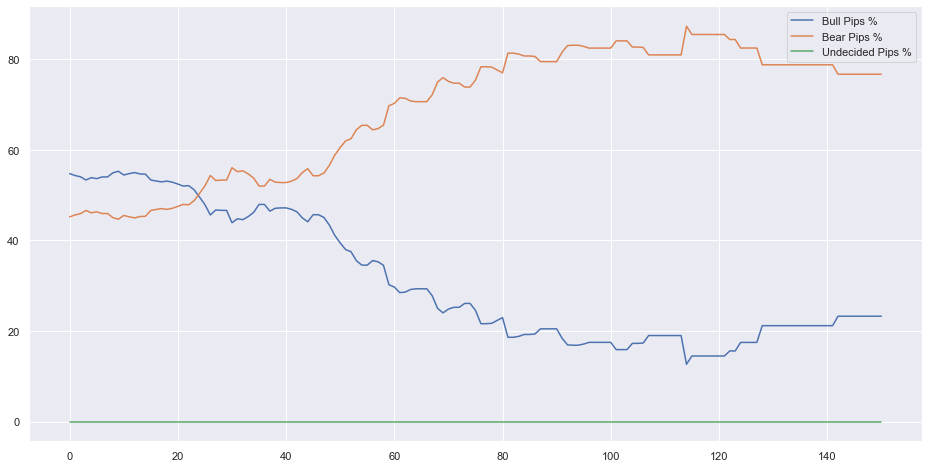

In [180]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_dm_100_100[['Bull Pips %', 'Bear Pips %', 'Undecided Pips %']], dashes=False)

From the plot above the Bull Pips %, started at 53%, Bear Pips % started at 43% and Undecided Pips % Increased with Pips. Bull Pips % tend to decrease with Pips. The best time to make a trade with this data is 60 to 100 Pips.

<AxesSubplot:ylabel='Signals'>

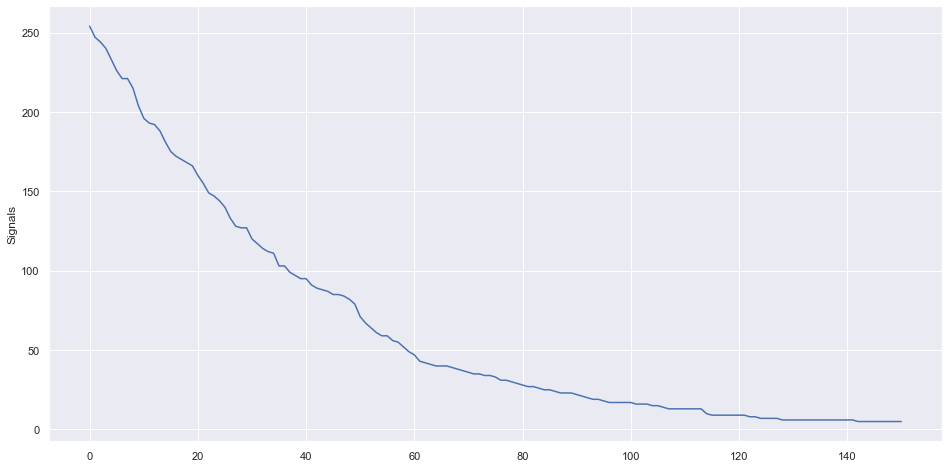

In [181]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_dm_100_100['Signals'], dashes=False)

<AxesSubplot:>

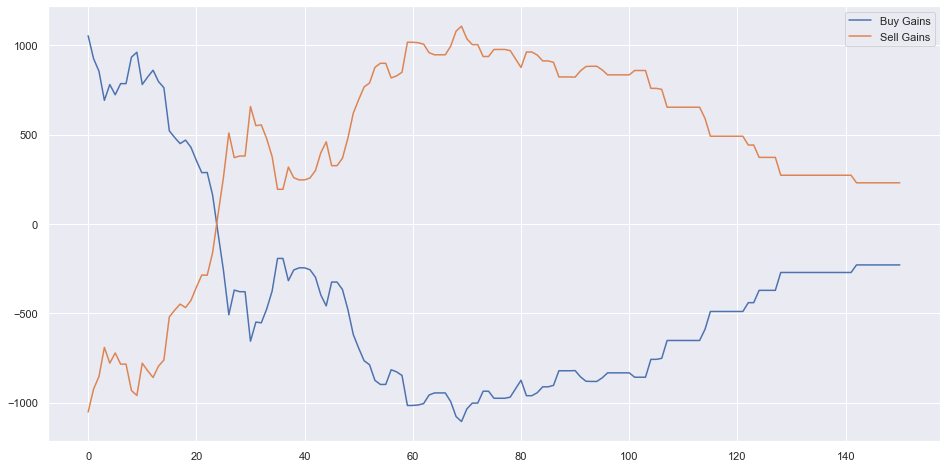

In [182]:
plt.figure(figsize=(16,8))
sns.lineplot(data = test_dataframe_dm_100_100[['Buy Gains', 'Sell Gains']], dashes=False)

<AxesSubplot:ylabel='Density'>

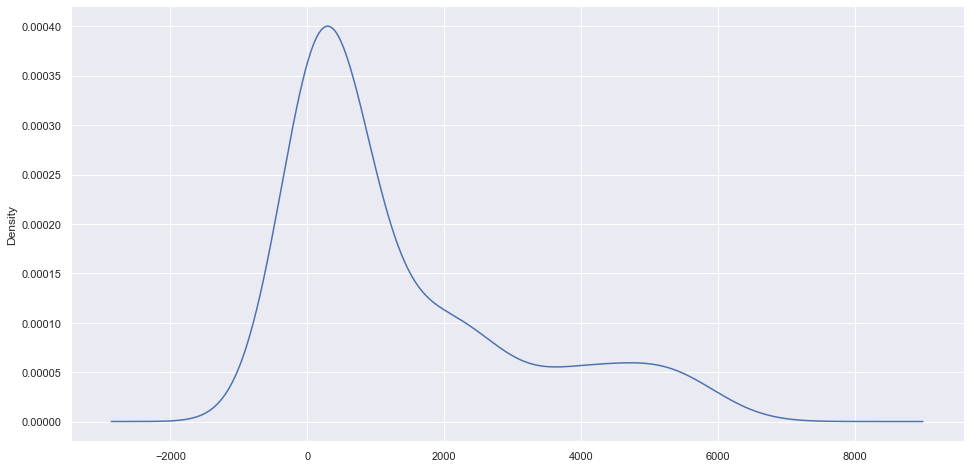

In [183]:
plt.figure(figsize=(16,8))
test_dataframe_dm_100_100['Bull Pips'].plot.kde()

<AxesSubplot:ylabel='Density'>

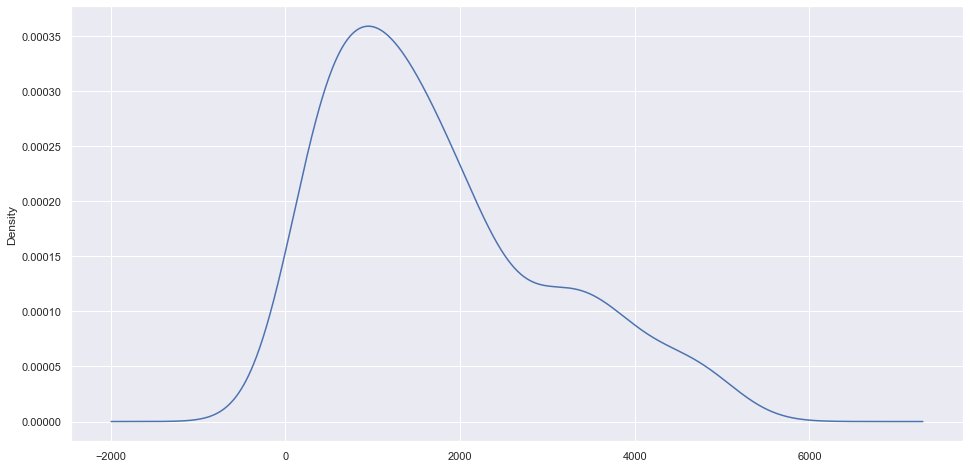

In [184]:
plt.figure(figsize=(16,8))
test_dataframe_dm_100_100['Bear Pips'].plot.kde()

<AxesSubplot:xlabel='Pips', ylabel='Buy Gains'>

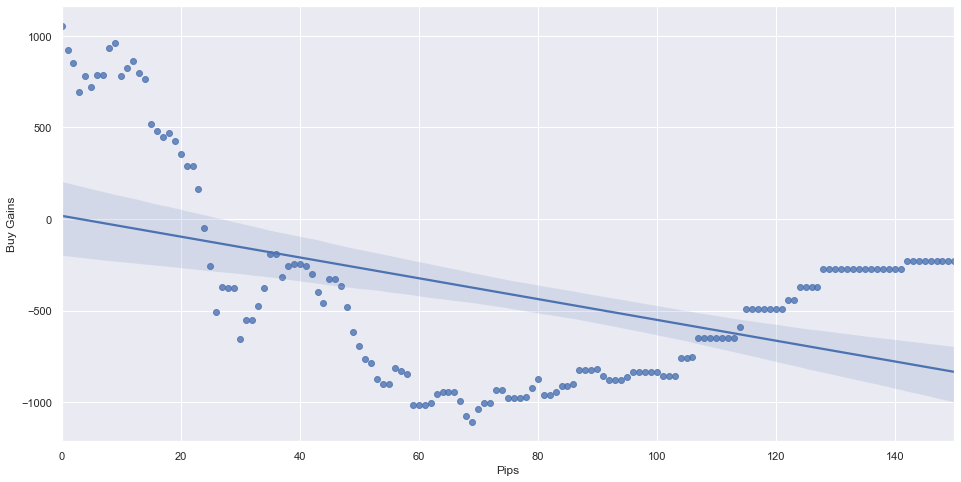

In [185]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Buy Gains', x = 'Pips', data=test_dataframe_dm_100_100)

<AxesSubplot:xlabel='Pips', ylabel='Sell Gains'>

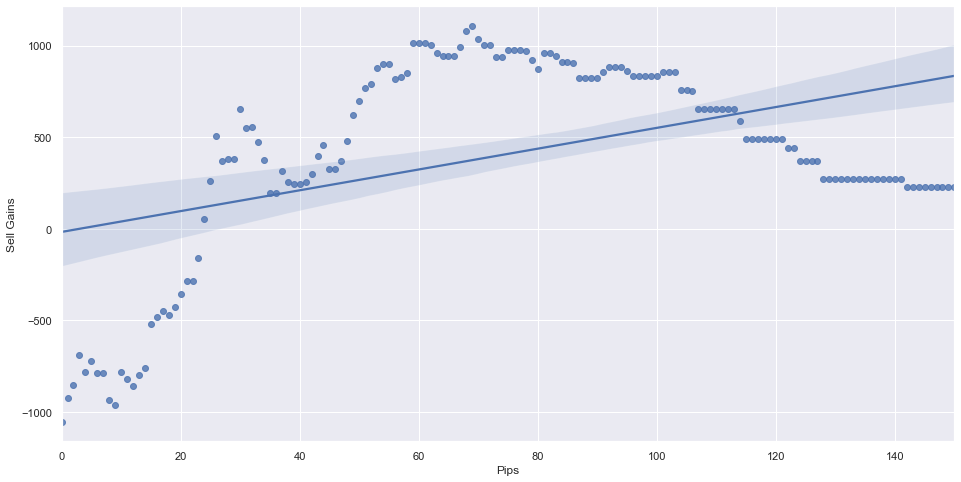

In [186]:
plt.figure(figsize=(16,8))
sns.regplot(y = 'Sell Gains', x = 'Pips', data=test_dataframe_dm_100_100)

## Conclusion